## Import statements

In [91]:
import numpy as np                                # For data management
import pandas as pd                               # For data management

import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization

from sklearn.preprocessing import LabelEncoder
from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
from sklearn.cluster import KMeans                # To instantiate, train and use model
from kmodes.kmodes import KModes
from sklearn import metrics

# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns                             
import matplotlib.pyplot as plt   
import scipy.sparse as sp
import os
from sklearn import preprocessing
from keras.utils import to_categorical

from spektral.data import Dataset, Loader, Graph, SingleLoader, DisjointLoader
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras.layers import Dense
import keras.metrics
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf


## Data Load

In [92]:
raw_dataset = pd.read_csv('/Users/mariaussano/Desktop/City-characteristics.csv')
#raw_dataset.keys()

In [93]:
column =['USCensusID', 'City', 'CII.RES', 'US_census_region','Avg_population', 'Number of employees accommodation sector',
       'Number of employees administrative sector',
       'Number of employees education sector',
       'Number of employees finance sector',
       'Number of  employees health sector',
       'Number of employees information sector',
       'Number of employees manufacturing sector',
       'Number of employees otherservices',
       'Number of employees professional sector',
       'Number of employees realestate sector',
       'Number of employees retail sector',
       'Number of establishments accommodation sector',
       'Number of establishments administrative sector',
       'Number of establishments education sector',
       'Number of establishments finance sector',
       'Number of employees other services',
       'Number of establishments information sector',
       'Number of establishments manufacturing sector',
       'Number of establishments otherservices',
       'Number of establishments professional sector',
       'Number of establishments realestate sector',
       'Number of establishments retail sector', 'Family income 2010',
       'GDP per capita 2016', 'Total housing units',
       'Percent single-family houses', 'Percent medium density houses',
       'Percent high density houses',
       'Percent housing units built 1990 or later',
       'Percent housing units built between 1950-1989',
       'Percent housing units built before 1950',
       'Percent housing units built earlier to 1990', 'Median rooms',
       'Percent impervious area', 'Area open NLCD',
       'Area low development NLCD', 'Area medium development NLCD',
       'Area high development NLCD', 'Service area sq.meters']

In [94]:
dataframe=pd.DataFrame(raw_dataset.loc[:,column])

In [95]:
dataframe.head()

USCensusID                          City  CII.RES US_census_region  \
0  1600000US4801000           Abilene city, Texas    0.727            South   
1  1600000US4500550    Aiken city, South Carolina      NaN            South   
2  1600000US3501780   Alamogordo city, New Mexico    0.205             West   
3  1600000US3502000  Albuquerque city, New Mexico    0.380             West   
4  1600000US4202184    Altoona city, Pennsylvania    0.454        Northeast   

   Avg_population  Number of employees accommodation sector  \
0          123729                                      7500   
1           29406                                      3030   
2           32986                                      1750   
3          614980                                     29238   
4           54369                                      2176   

   Number of employees administrative sector  \
0                                       1750   
1                                       7500   
2                                        245   
3                                      19582   
4                                       1149   

   Number of employees education sector  Number of employees finance sector  \
0                                   145                                2599   
1                                    14                                 708   
2                                    10                                 294   
3                                  1268                               11279   
4                                    95                                 996   

   Number of  employees health sector  ...  \
0                               17250  ...   
1                                4505  ...   
2                                2090  ...   
3                               46890  ...   
4                                5724  ...   

   Percent housing units built between 1950-1989  \
0                                           63.3   
1                                           49.6   
2                                           69.3   
3                                           57.6   
4                                           37.1   

   Percent housing units built before 1950  \
0                                     14.7   
1                                      7.1   
2                                      4.5   
3                                      7.2   
4                                     58.7   

   Percent housing units built earlier to 1990  Median rooms  \
0                                         78.0           5.3   
1                                         56.7           6.0   
2                                         73.8           5.4   
3                                         64.8           5.3   
4                                         95.8           6.1   

   Percent impervious area  Area open NLCD  Area low development NLCD  \
0                     16.4         13874.8                    10720.6   
1                      9.0          7626.2                     6274.4   
2                     14.4          1792.0                     3050.2   
3                     26.9         11553.2                    32002.9   
4                     18.9          4855.7                     6346.8   

   Area medium development NLCD  Area high development NLCD  \
0                        6208.8                      3755.7   
1                        1805.4                       573.7   
2                         965.0                       208.4   
3                       24592.5                      5344.4   
4                        3384.4                      1673.1   

   Service area sq.meters  
0               290335000  
1               194774000  
2                56002000  
3               489188000  
4               131990000  

[5 rows x 44 columns]

## DATA EXPLOATION --> CORRELATION

<AxesSubplot:>

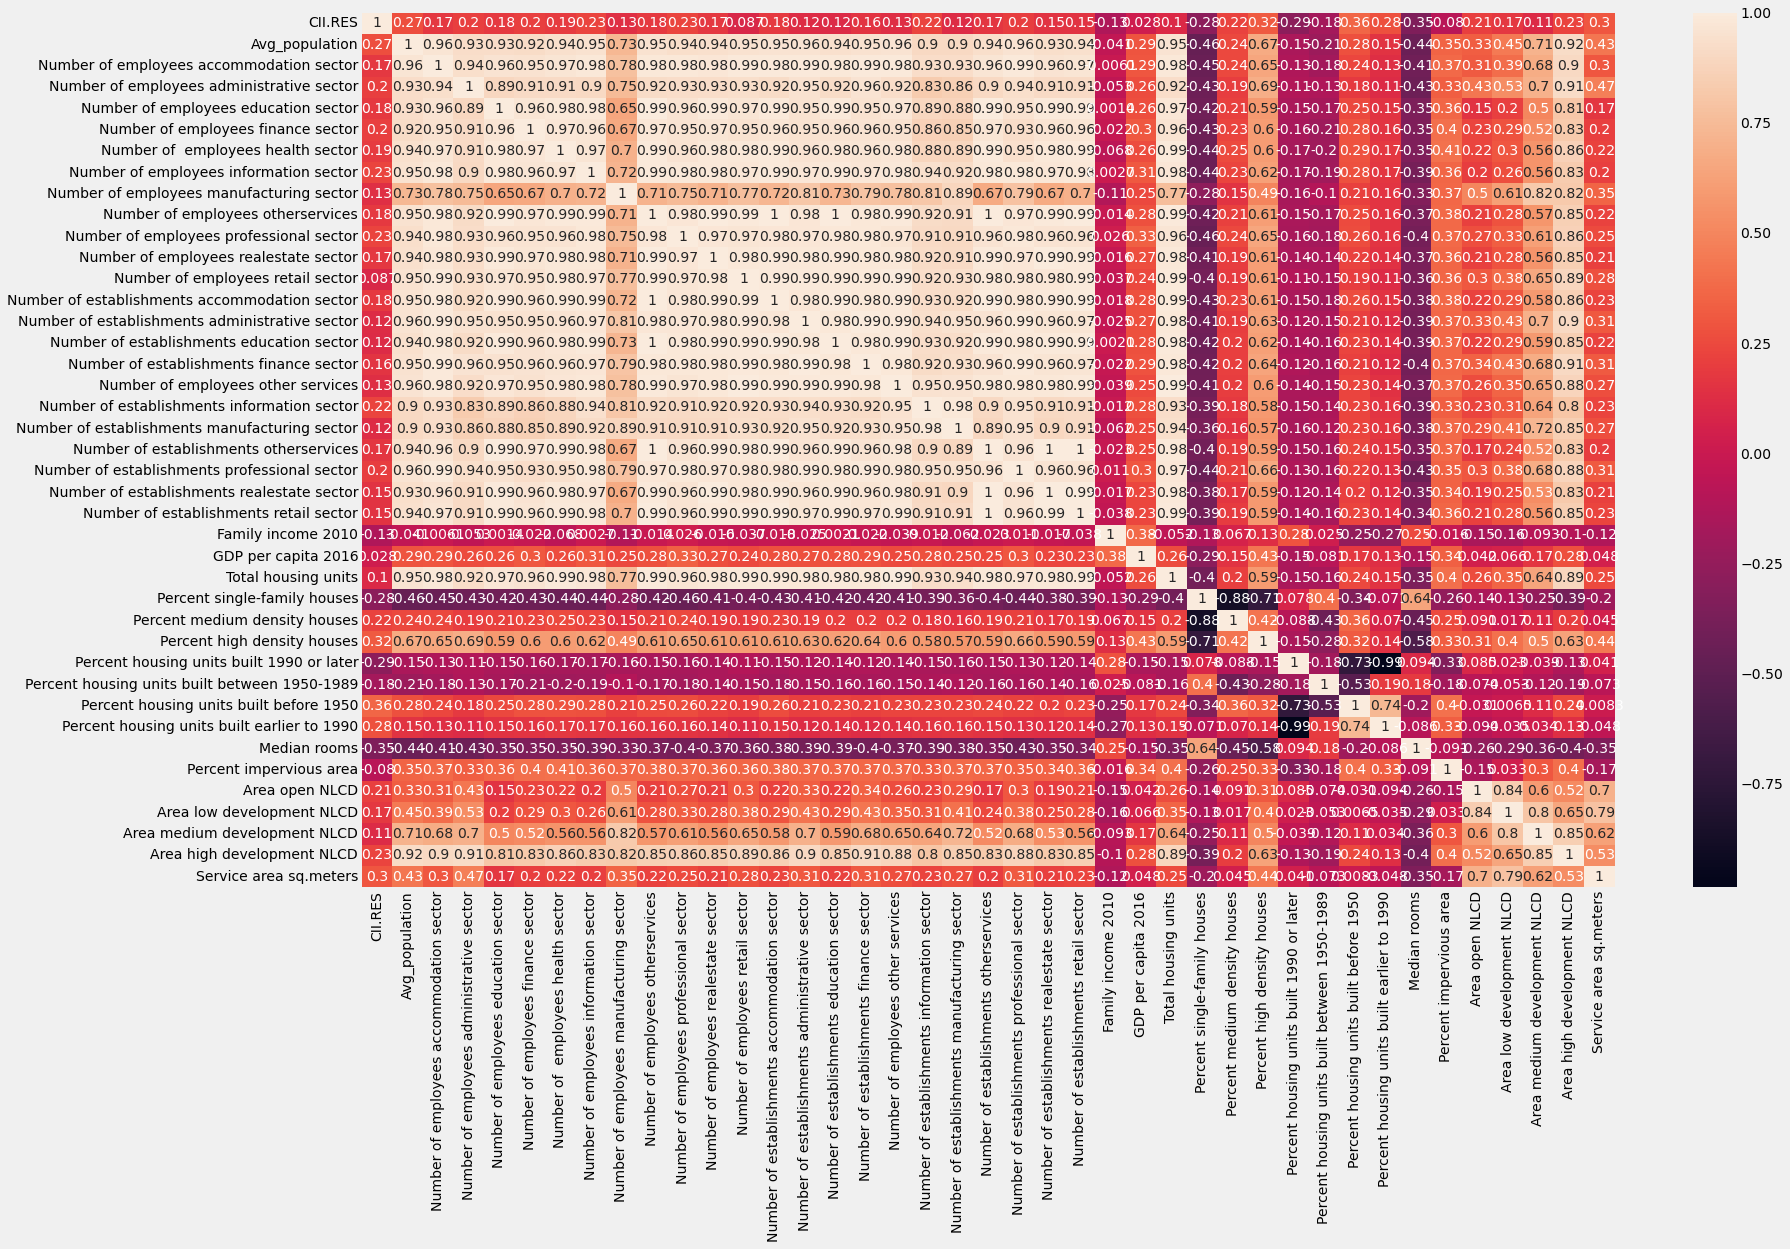

In [96]:
corr=dataframe.corr() ##build correlation matrix
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot=True)

In [97]:
##streamline corr_matrix based on diagonality property
corr.values[np.tril_indices_from(corr.values)] = np.nan 
#corr

## FEATURE SELECTION (filter method)

In [98]:
##dropping out features with correation index higher that 0.97
to_drop = [column for column in corr.columns if any(corr[column] >= 0.95)]
#print(to_drop)

In [99]:
#Now we are droping the columns which are in the 'to_drop' list from the dataframe
df = dataframe.drop(columns=to_drop)

<AxesSubplot:>

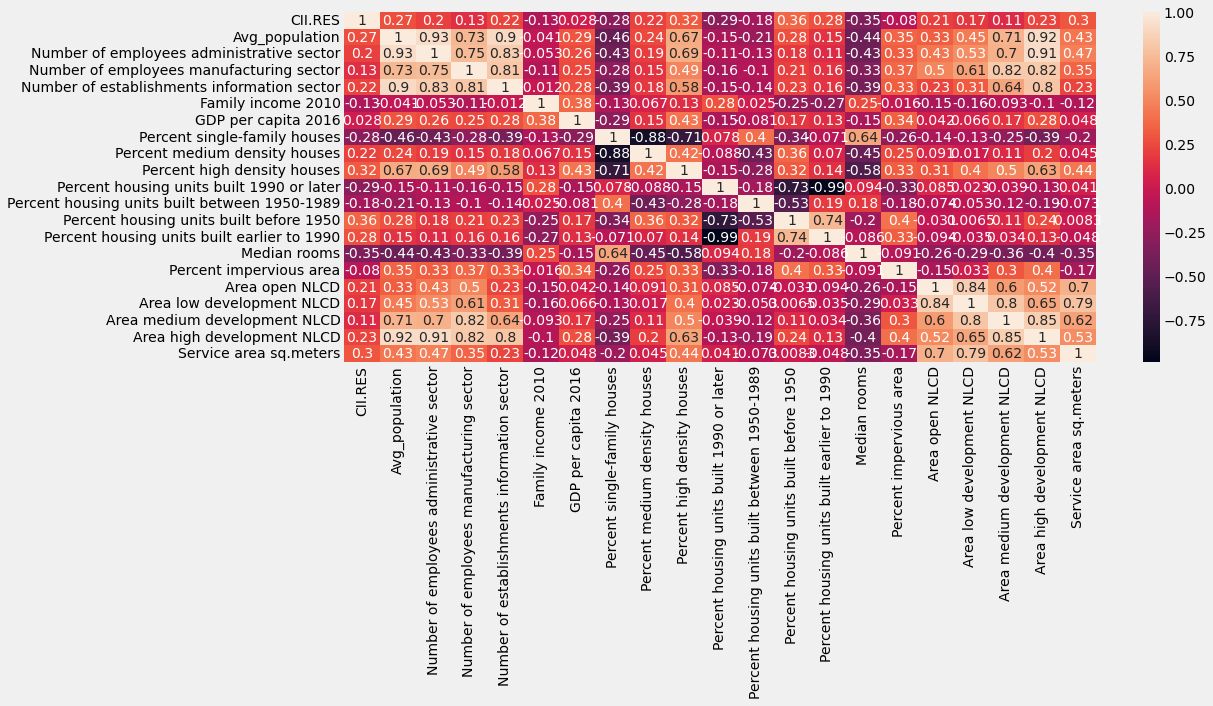

In [100]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot=True)

In [101]:
#drop_out highly inverse correlated features
to_drop1 = [column for column in corr.columns if any(corr[column] <= -0.87)]
#print(to_drop1)

In [102]:
#Now we are droping the columns belonging to 'to_drop1' from the dataframe
dataf= df.drop(columns=to_drop1)

In [103]:
#dataf.head()

<AxesSubplot:>

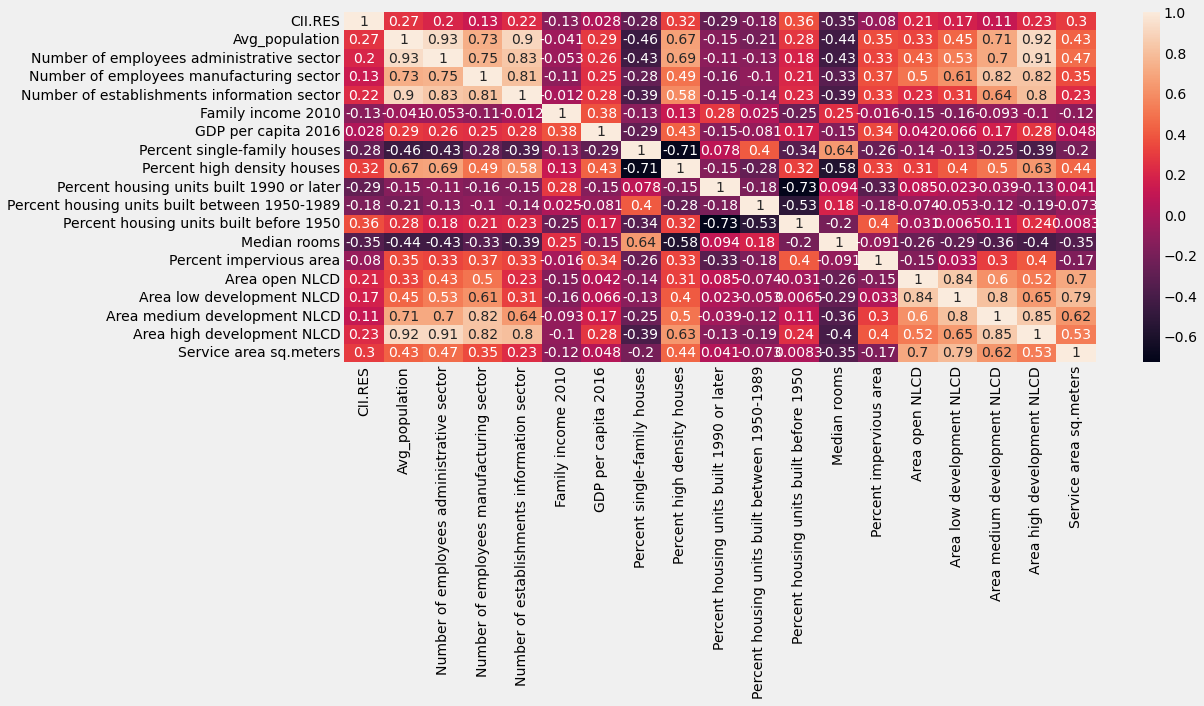

In [104]:
plt.figure(figsize = (15,6))
sns.heatmap(dataf.corr(), annot=True)

In [105]:
dataframe=dataf

In [106]:
#sns.pairplot(dataframe)
#plt.show()

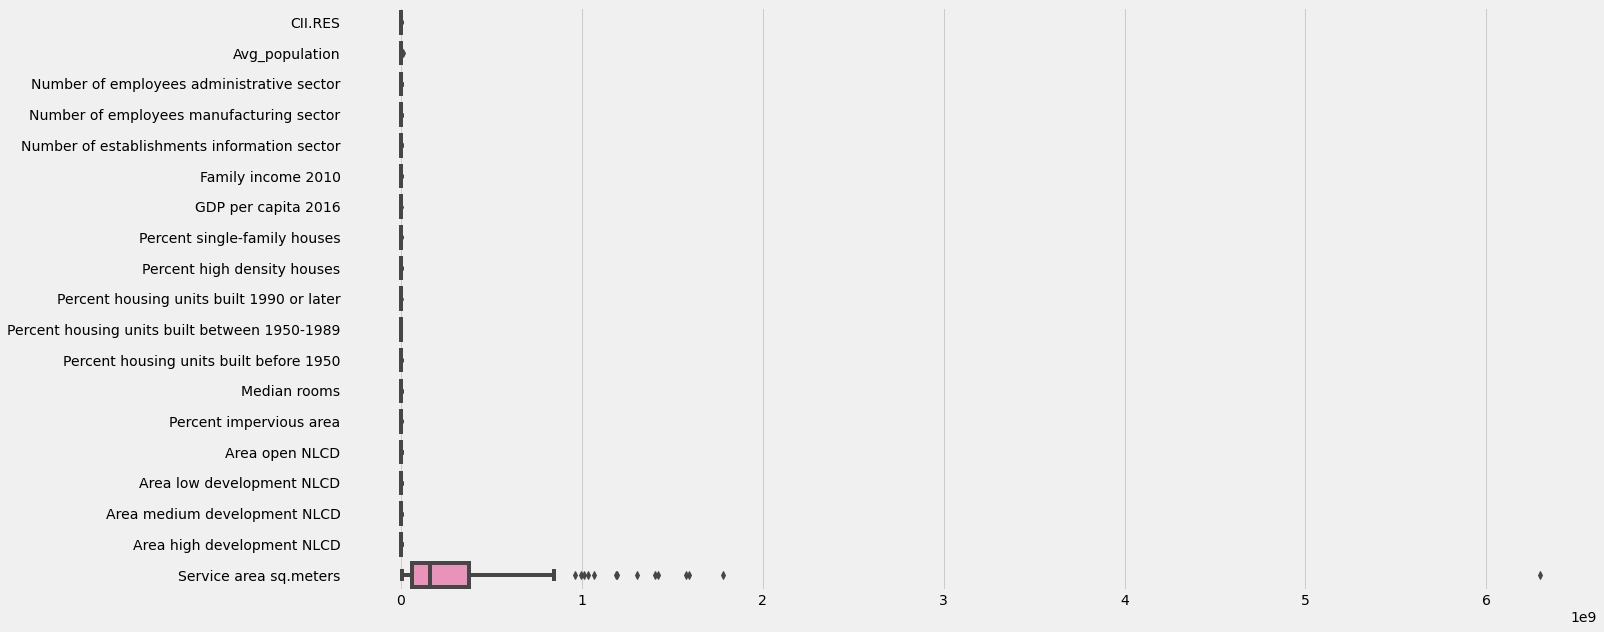

In [107]:
plt.figure(figsize = (20,10))
sns.boxplot(data = dataframe, orient = "h")
plt.show()

In [108]:
#dataframe['City'] = dataframe['City'].astype('category')

In [109]:
dataframe.head(-1)

USCensusID                          City  CII.RES US_census_region  \
0    1600000US4801000           Abilene city, Texas    0.727            South   
1    1600000US4500550    Aiken city, South Carolina      NaN            South   
2    1600000US3501780   Alamogordo city, New Mexico    0.205             West   
3    1600000US3502000  Albuquerque city, New Mexico    0.380             West   
4    1600000US4202184    Altoona city, Pennsylvania    0.454        Northeast   
..                ...                           ...      ...              ...   
120  1600000US5374060    Vancouver city, Washington    0.365             West   
121  1600000US4980090             Vernal city, Utah    0.600             West   
122  1600000US3678608      Watertown city, New York    1.052        Northeast   
123  1600000US4879000     Wichita Falls city, Texas    1.002            South   
124  1600000US2079000          Wichita city, Kansas    0.774          Midwest   

     Avg_population  Number of employees administrative sector  \
0            123729                                       1750   
1             29406                                       7500   
2             32986                                        245   
3            614980                                      19582   
4             54369                                       1149   
..              ...                                        ...   
120          234369                                       6883   
121            9755                                        153   
122           26711                                        899   
123          140000                                       1750   
124          453621                                      11801   

     Number of employees manufacturing sector  \
0                                        1991   
1                                        1506   
2                                         118   
3                                       10810   
4                                        1006   
..                                        ...   
120                                      6379   
121                                       248   
122                                       818   
123                                      3045   
124                                     25801   

     Number of establishments information sector  Family income 2010  \
0                                             52             51012.0   
1                                             17             75212.0   
2                                             10             49297.0   
3                                            276             59191.0   
4                                             23             48750.0   
..                                           ...                 ...   
120                                           82             56658.0   
121                                            7             57092.0   
122                                           23             46718.0   
123                                           46             50819.0   
124                                          181             57963.0   

     GDP per capita 2016  ...  Percent housing units built 1990 or later  \
0                37553.0  ...                                       21.9   
1                52750.0  ...                                       44.8   
2                57892.0  ...                                       31.2   
3                42723.0  ...                                       34.1   
4                37482.0  ...                                        5.4   
..                   ...  ...                                        ...   
120              62715.0  ...                                       40.4   
121              48111.0  ...                                       34.7   
122              46412.0  ...                                        6.7   
123              41032.0  ...  

## STANDARDIZATION
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset.
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

<AxesSubplot:>

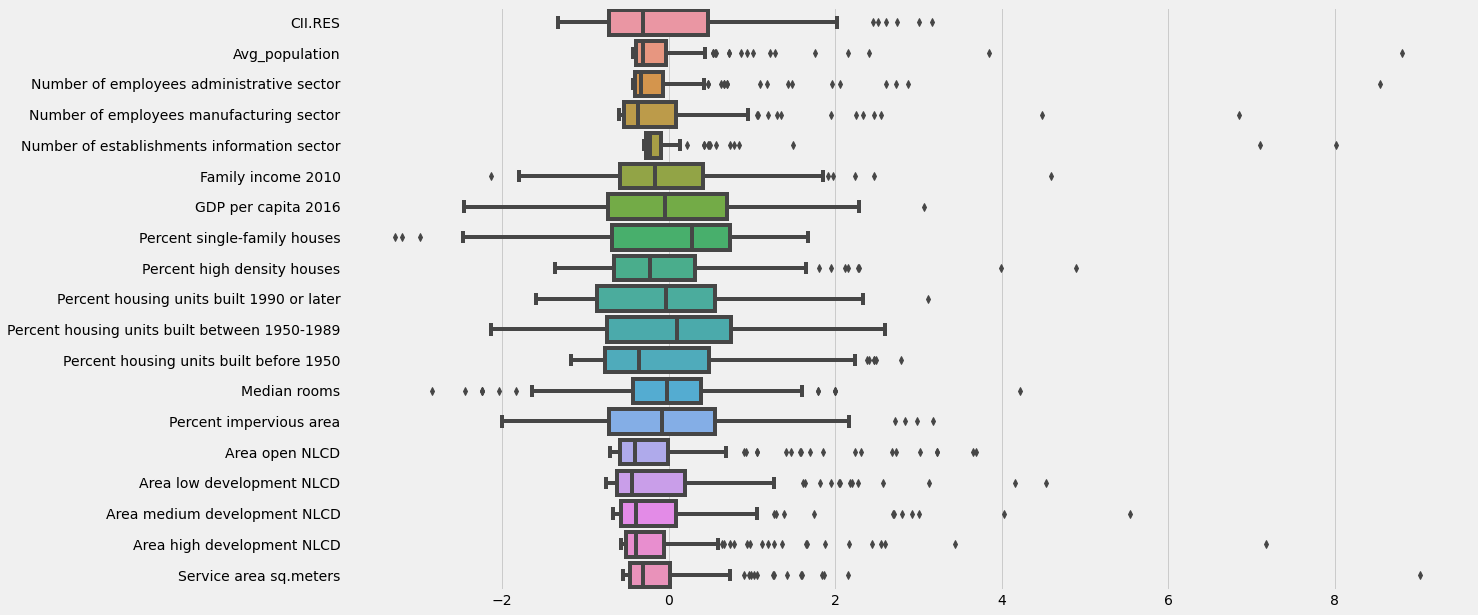

In [110]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(dataframe.drop(columns=['City','USCensusID','US_census_region']))
scaled_dataframe = pd.DataFrame(scaled_array,columns=(dataframe.drop(columns=['City','USCensusID','US_census_region']).columns))
plt.figure(figsize = (18,10))
sns.boxplot(data = scaled_dataframe, orient = "h")
#plt.show()

In [111]:
scaled_dataframe["city"]=dataframe["City"]

In [112]:
for i,value in enumerate(scaled_dataframe.loc[:,'city']):
    scaled_dataframe.loc[i,'city']=(scaled_dataframe.loc[i,'city']).replace('city','')
    scaled_dataframe.loc[i,'city']=(scaled_dataframe.loc[i,'city']).replace(' ,',',')
    #print(scaled_dataframe.loc[i,'city'])

scaled_dataframe

CII.RES  Avg_population  Number of employees administrative sector  \
0   -0.183764       -0.293859                                  -0.375074   
1         NaN       -0.398546                                  -0.193143   
2   -1.178355       -0.394572                                  -0.422693   
3   -0.844920        0.251369                                   0.189136   
4   -0.703924       -0.370840                                  -0.394090   
..        ...             ...                                        ...   
121 -0.425743       -0.420356                                  -0.425604   
122  0.435474       -0.401537                                  -0.402000   
123  0.340206       -0.275800                                  -0.375074   
124 -0.094213        0.072280                                  -0.057058   
125  0.521214       -0.183749                                  -0.106954   

     Number of employees manufacturing sector  \
0                                   -0.452138   
1                                   -0.487875   
2                                   -0.590149   
3                                    0.197685   
4                                   -0.524717   
..                                        ...   
121                                 -0.580570   
122                                 -0.538570   
123                                 -0.374475   
124                                  1.302287   
125                                  0.014358   

     Number of establishments information sector  Family income 2010  \
0                                      -0.222468           -0.575403   
1                                      -0.269298            1.382882   
2                                      -0.278664           -0.714182   
3                                       0.077243            0.086449   
4                                      -0.261270           -0.758446   
..                                           ...                 ...   
121                                    -0.282678           -0.083404   
122                                    -0.261270           -0.922877   
123                                    -0.230496           -0.591020   
124                                    -0.049867           -0.012922   
125                                    -0.178315           -0.385077   

     GDP per capita 2016  Percent single-family houses  \
0              -1.077127                      0.854280   
1               0.183675                      0.928766   
2               0.610275                      0.847509   
3              -0.648204                      0.407368   
4              -1.083017                      1.070965   
..                   ...                           ...   
121            -0.201195                     -0.439058   
122            -0.342150                     -0.973999   
123            -0.788496                      0.867823   
124            -0.327963                      0.813652   
125            -1.097204                      0.366739   

     Percent high density houses  Percent housing units built 1990 or later  \
0                      -0.775015                                  -0.379570   
1                      -0.919099                                   1.242585   
2                      -1.272760                                   0.279209   
3                      -0.120087                                   0.484635   
4                      -0.709522                                  -1.548372   
..                           ...                                        ...   
121                    -0.906000                                   0.527137   
122                     0.037095                                  -1.456285   
123                    -0.761916                                  -0.528327   
124                    -0.434453                                  -0.145810   
125                    -0.552339                                   0.1729

In [113]:
for i,value in enumerate(dataframe.loc[:,'City']):
    dataframe.loc[i,'City']=(dataframe.loc[i,'City']).replace('city','')
    dataframe.loc[i,'City']=(dataframe.loc[i,'City']).replace(' ,',',')

In [114]:
dataframe

USCensusID                           City  CII.RES  \
0    1600000US4801000                 Abilene, Texas    0.727   
1    1600000US4500550          Aiken, South Carolina      NaN   
2    1600000US3501780         Alamogordo, New Mexico    0.205   
3    1600000US3502000        Albuquerque, New Mexico    0.380   
4    1600000US4202184          Altoona, Pennsylvania    0.454   
..                ...                            ...      ...   
121  1600000US4980090                   Vernal, Utah    0.600   
122  1600000US3678608            Watertown, New York    1.052   
123  1600000US4879000           Wichita Falls, Texas    1.002   
124  1600000US2079000                Wichita, Kansas    0.774   
125  1600000US3775000  Winston-Salem, North Carolina    1.097   

    US_census_region  Avg_population  \
0              South          123729   
1              South           29406   
2               West           32986   
3               West          614980   
4          Northeast           54369   
..               ...             ...   
121             West            9755   
122        Northeast           26711   
123            South          140000   
124          Midwest          453621   
125            South          222938   

     Number of employees administrative sector  \
0                                         1750   
1                                         7500   
2                                          245   
3                                        19582   
4                                         1149   
..                                         ...   
121                                        153   
122                                        899   
123                                       1750   
124                                      11801   
125                                      10224   

     Number of employees manufacturing sector  \
0                                        1991   
1                                        1506   
2                                         118   
3                                       10810   
4                                        1006   
..                                        ...   
121                                       248   
122                                       818   
123                                      3045   
124                                     25801   
125                                      8322   

     Number of establishments information sector  Family income 2010  \
0                                             52             51012.0   
1                                             17             75212.0   
2                                             10             49297.0   
3                                            276             59191.0   
4                                             23             48750.0   
..                                           ...                 ...   
121                                            7             57092.0   
122                                           23             46718.0   
123                                           46             50819.0   
124                                          181             57963.0   
125                                           85             53364.0   

     GDP per capita 2016  ...  Percent housing units built 1990 or later  \
0                37553.0  ...                                       21.9   
1                52750.0  ...                                       44.8   
2                57892.0  ...                                       31.2   
3                42723.0  ...                                       34.1   
4                37482.0  ...                                        5.4   
..                   ...  ...                                        ...   
121              48111.0  ...                                       34.7   
122              46412.0  ...                                        6.7   
123       

In [115]:
scaled_dataframe.set_index("city", inplace = True)

In [116]:
scaled_dataframe

CII.RES  Avg_population  \
city                                                      
Abilene, Texas                -0.183764       -0.293859   
Aiken, South Carolina               NaN       -0.398546   
Alamogordo, New Mexico        -1.178355       -0.394572   
Albuquerque, New Mexico       -0.844920        0.251369   
Altoona, Pennsylvania         -0.703924       -0.370840   
...                                 ...             ...   
Vernal, Utah                  -0.425743       -0.420356   
Watertown, New York            0.435474       -0.401537   
Wichita Falls, Texas           0.340206       -0.275800   
Wichita, Kansas               -0.094213        0.072280   
Winston-Salem, North Carolina  0.521214       -0.183749   

                               Number of employees administrative sector  \
city                                                                       
Abilene, Texas                                                 -0.375074   
Aiken, South Carolina                                          -0.193143   
Alamogordo, New Mexico                                         -0.422693   
Albuquerque, New Mexico                                         0.189136   
Altoona, Pennsylvania                                          -0.394090   
...                                                                  ...   
Vernal, Utah                                                   -0.425604   
Watertown, New York                                            -0.402000   
Wichita Falls, Texas                                           -0.375074   
Wichita, Kansas                                                -0.057058   
Winston-Salem, North Carolina                                  -0.106954   

                               Number of employees manufacturing sector  \
city                                                                      
Abilene, Texas                                                -0.452138   
Aiken, South Carolina                                         -0.487875   
Alamogordo, New Mexico                                        -0.590149   
Albuquerque, New Mexico                                        0.197685   
Altoona, Pennsylvania                                         -0.524717   
...                                                                 ...   
Vernal, Utah                                                  -0.580570   
Watertown, New York                                           -0.538570   
Wichita Falls, Texas                                          -0.374475   
Wichita, Kansas                                                1.302287   
Winston-Salem, North Carolina                                  0.014358   

                               Number of establishments information sector  \
city                                                                         
Abilene, Texas                                                   -0.222468   
Aiken, South Carolina                                            -0.269298   
Alamogordo, New Mexico                                           -0.278664   
Albuquerque, New Mexico                                           0.077243   
Altoona, Pennsylvania                                            -0.261270   
...                                                                    ...   
Vernal, Utah                                                     -0.282678   
Watertown, New York                                              -0.261270   
Wichita Falls, Texas                                             -0.230496   
Wichita, Kansas                                                  -0.049867   
Winston-Salem, North Carolina                                    -0.178315   

                               Family income 2010  GDP per capita 2016  \
city                                                                     
Abilene, Texas                          -0.575403            -1.077127   
Aiken, South Carolina                    1.382882             

In [117]:
dataframe=dataframe.rename(columns={"City": "city"})
dataframe.set_index("city", inplace = True)

In [118]:
dataframe

USCensusID  CII.RES US_census_region  \
city                                                                        
Abilene, Texas                 1600000US4801000    0.727            South   
Aiken, South Carolina          1600000US4500550      NaN            South   
Alamogordo, New Mexico         1600000US3501780    0.205             West   
Albuquerque, New Mexico        1600000US3502000    0.380             West   
Altoona, Pennsylvania          1600000US4202184    0.454        Northeast   
...                                         ...      ...              ...   
Vernal, Utah                   1600000US4980090    0.600             West   
Watertown, New York            1600000US3678608    1.052        Northeast   
Wichita Falls, Texas           1600000US4879000    1.002            South   
Wichita, Kansas                1600000US2079000    0.774          Midwest   
Winston-Salem, North Carolina  1600000US3775000    1.097            South   

                               Avg_population  \
city                                            
Abilene, Texas                         123729   
Aiken, South Carolina                   29406   
Alamogordo, New Mexico                  32986   
Albuquerque, New Mexico                614980   
Altoona, Pennsylvania                   54369   
...                                       ...   
Vernal, Utah                             9755   
Watertown, New York                     26711   
Wichita Falls, Texas                   140000   
Wichita, Kansas                        453621   
Winston-Salem, North Carolina          222938   

                               Number of employees administrative sector  \
city                                                                       
Abilene, Texas                                                      1750   
Aiken, South Carolina                                               7500   
Alamogordo, New Mexico                                               245   
Albuquerque, New Mexico                                            19582   
Altoona, Pennsylvania                                               1149   
...                                                                  ...   
Vernal, Utah                                                         153   
Watertown, New York                                                  899   
Wichita Falls, Texas                                                1750   
Wichita, Kansas                                                    11801   
Winston-Salem, North Carolina                                      10224   

                               Number of employees manufacturing sector  \
city                                                                      
Abilene, Texas                                                     1991   
Aiken, South Carolina                                              1506   
Alamogordo, New Mexico                                              118   
Albuquerque, New Mexico                                           10810   
Altoona, Pennsylvania                                              1006   
...                                                                 ...   
Vernal, Utah                                                        248   
Watertown, New York                                                 818   
Wichita Falls, Texas                                               3045   
Wichita, Kansas                                                   25801   
Winston-Salem, North Carolina                                      8322   

                               Number of establishments information sector  \
city                                                                         
Abilene, Texas                                                          52   
Aiken, South Carolina                                                   17   
Alamogordo, New Mexico                                                  10   
Albuquerque, New Mexico                   

## OPTIMAL k_cluster CHOICE

## elbow method

In [119]:
#change inf to NaN
pd.set_option('use_inf_as_na',True)
#remove NaN
scaled_dataframe.dropna(inplace=True)
dataframe.dropna(inplace=True)

In [120]:
scaled_dataframe

CII.RES  Avg_population  \
city                                                      
Abilene, Texas                -0.183764       -0.293859   
Alamogordo, New Mexico        -1.178355       -0.394572   
Albuquerque, New Mexico       -0.844920        0.251369   
Altoona, Pennsylvania         -0.703924       -0.370840   
Amarillo, Texas               -0.324760       -0.212839   
...                                 ...             ...   
Vernal, Utah                  -0.425743       -0.420356   
Watertown, New York            0.435474       -0.401537   
Wichita Falls, Texas           0.340206       -0.275800   
Wichita, Kansas               -0.094213        0.072280   
Winston-Salem, North Carolina  0.521214       -0.183749   

                               Number of employees administrative sector  \
city                                                                       
Abilene, Texas                                                 -0.375074   
Alamogordo, New Mexico                                         -0.422693   
Albuquerque, New Mexico                                         0.189136   
Altoona, Pennsylvania                                          -0.394090   
Amarillo, Texas                                                -0.193143   
...                                                                  ...   
Vernal, Utah                                                   -0.425604   
Watertown, New York                                            -0.402000   
Wichita Falls, Texas                                           -0.375074   
Wichita, Kansas                                                -0.057058   
Winston-Salem, North Carolina                                  -0.106954   

                               Number of employees manufacturing sector  \
city                                                                      
Abilene, Texas                                                -0.452138   
Alamogordo, New Mexico                                        -0.590149   
Albuquerque, New Mexico                                        0.197685   
Altoona, Pennsylvania                                         -0.524717   
Amarillo, Texas                                                0.304748   
...                                                                 ...   
Vernal, Utah                                                  -0.580570   
Watertown, New York                                           -0.538570   
Wichita Falls, Texas                                          -0.374475   
Wichita, Kansas                                                1.302287   
Winston-Salem, North Carolina                                  0.014358   

                               Number of establishments information sector  \
city                                                                         
Abilene, Texas                                                   -0.222468   
Alamogordo, New Mexico                                           -0.278664   
Albuquerque, New Mexico                                           0.077243   
Altoona, Pennsylvania                                            -0.261270   
Amarillo, Texas                                                  -0.202399   
...                                                                    ...   
Vernal, Utah                                                     -0.282678   
Watertown, New York                                              -0.261270   
Wichita Falls, Texas                                             -0.230496   
Wichita, Kansas                                                  -0.049867   
Winston-Salem, North Carolina                                    -0.178315   

                               Family income 2010  GDP per capita 2016  \
city                                                                     
Abilene, Texas                          -0.575403            -1.077127   
Alamogordo, New Mexico                  -0.714182             

In [121]:
dataframe

USCensusID  CII.RES US_census_region  \
city                                                                        
Abilene, Texas                 1600000US4801000    0.727            South   
Alamogordo, New Mexico         1600000US3501780    0.205             West   
Albuquerque, New Mexico        1600000US3502000    0.380             West   
Altoona, Pennsylvania          1600000US4202184    0.454        Northeast   
Amarillo, Texas                1600000US4803000    0.653            South   
...                                         ...      ...              ...   
Vernal, Utah                   1600000US4980090    0.600             West   
Watertown, New York            1600000US3678608    1.052        Northeast   
Wichita Falls, Texas           1600000US4879000    1.002            South   
Wichita, Kansas                1600000US2079000    0.774          Midwest   
Winston-Salem, North Carolina  1600000US3775000    1.097            South   

                               Avg_population  \
city                                            
Abilene, Texas                         123729   
Alamogordo, New Mexico                  32986   
Albuquerque, New Mexico                614980   
Altoona, Pennsylvania                   54369   
Amarillo, Texas                        196728   
...                                       ...   
Vernal, Utah                             9755   
Watertown, New York                     26711   
Wichita Falls, Texas                   140000   
Wichita, Kansas                        453621   
Winston-Salem, North Carolina          222938   

                               Number of employees administrative sector  \
city                                                                       
Abilene, Texas                                                      1750   
Alamogordo, New Mexico                                               245   
Albuquerque, New Mexico                                            19582   
Altoona, Pennsylvania                                               1149   
Amarillo, Texas                                                     7500   
...                                                                  ...   
Vernal, Utah                                                         153   
Watertown, New York                                                  899   
Wichita Falls, Texas                                                1750   
Wichita, Kansas                                                    11801   
Winston-Salem, North Carolina                                      10224   

                               Number of employees manufacturing sector  \
city                                                                      
Abilene, Texas                                                     1991   
Alamogordo, New Mexico                                              118   
Albuquerque, New Mexico                                           10810   
Altoona, Pennsylvania                                              1006   
Amarillo, Texas                                                   12263   
...                                                                 ...   
Vernal, Utah                                                        248   
Watertown, New York                                                 818   
Wichita Falls, Texas                                               3045   
Wichita, Kansas                                                   25801   
Winston-Salem, North Carolina                                      8322   

                               Number of establishments information sector  \
city                                                                         
Abilene, Texas                                                          52   
Alamogordo, New Mexico                                                  10   
Albuquerque, New Mexico                                                276   
Altoona, Pennsylvania                     

In [122]:
inertia = []
K = range(1,80)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X=scaled_dataframe)
    inertia.append(km.inertia_)

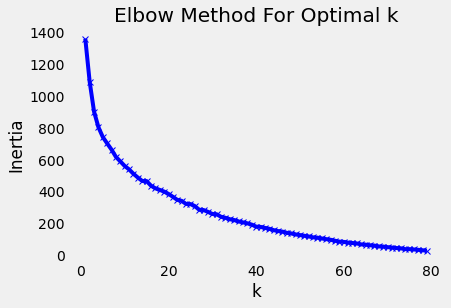

In [123]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

(0.0, 10.0, 200.0, 1500.0)

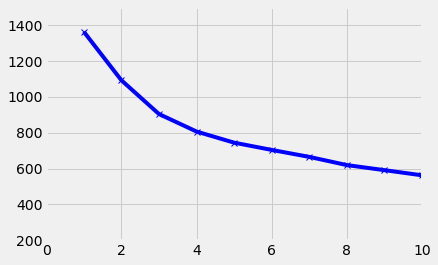

In [124]:
plt.plot(K, inertia, 'bx-')
plt.axis([0,10,200,1500])

## K=4 PARTITION CLUSTERING

In [125]:
kmeans_model = KMeans(n_clusters = 4)
km=kmeans_model.fit(scaled_dataframe)
centroids = kmeans_model.cluster_centers_

kmeans_model.cluster_centers_.shape
#scaled_dataframe["cluster"] = kmeans_model.labels_
#scaled_dataframe

(4, 19)

## 2- Silhouette Test Method

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

**Silhouette score**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
- 1 Means clusters are well apart from each other and clearly distinguished.
- 0 Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- 1 Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
where
a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.

In [126]:
from sklearn.metrics import silhouette_score
%matplotlib inline

In [127]:
#scaled_dataframe=scaled_dataframe.drop(columns="cluster")

In [128]:
label=kmeans_model.predict(scaled_dataframe)

## Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.



In [129]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [3,4,5,7,11,23,36]
silhouette_avg_n_clusters = []

For n_clusters = 3 The average silhouette_score is : 0.2440351741746914
For n_clusters = 4 The average silhouette_score is : 0.15105453286988713
For n_clusters = 5 The average silhouette_score is : 0.1504803729518014
For n_clusters = 7 The average silhouette_score is : 0.156308329039533
For n_clusters = 11 The average silhouette_score is : 0.15196408484880095
For n_clusters = 23 The average silhouette_score is : 0.1082585101235111
For n_clusters = 36 The average silhouette_score is : 0.11567146883334727


Text(0, 0.5, 'silhouette score')

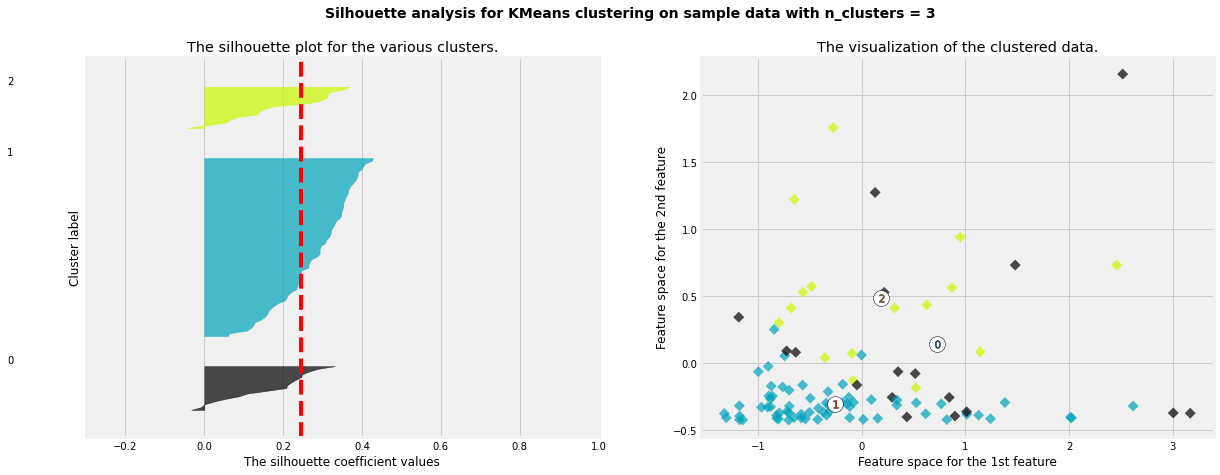

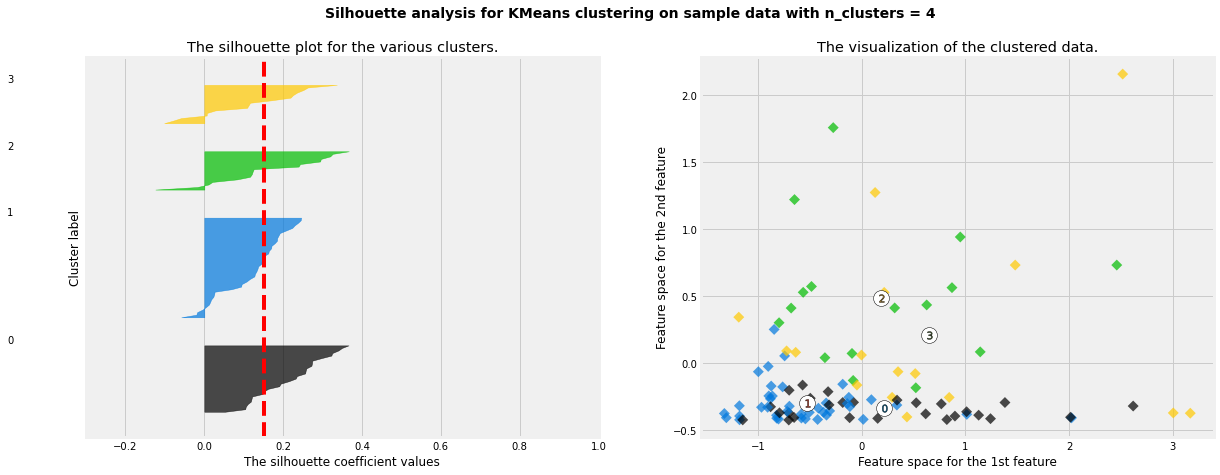

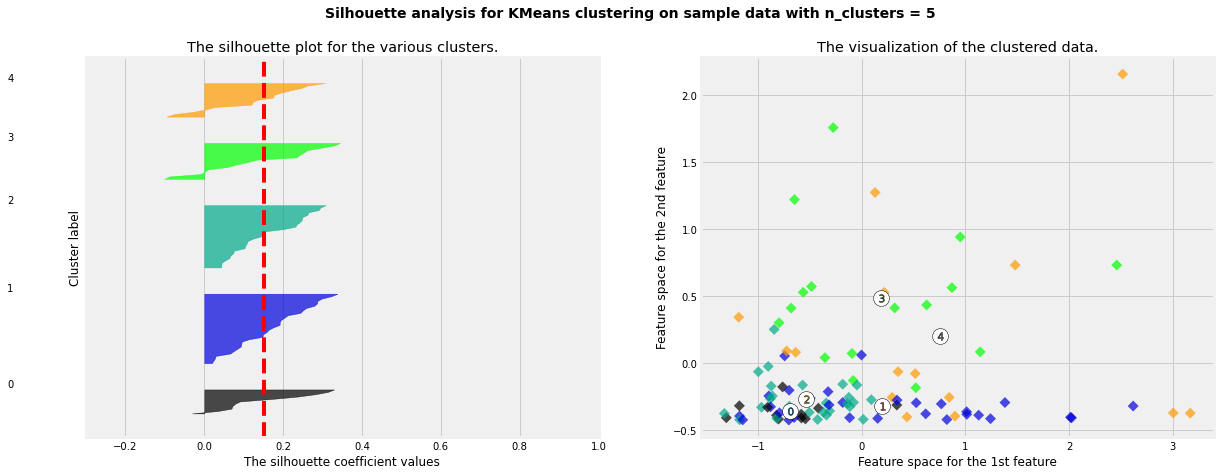

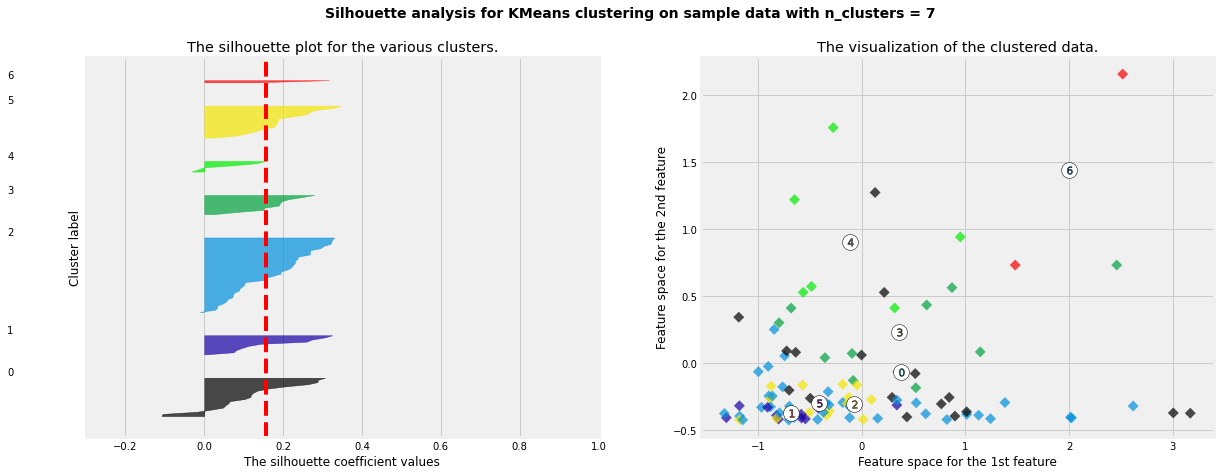

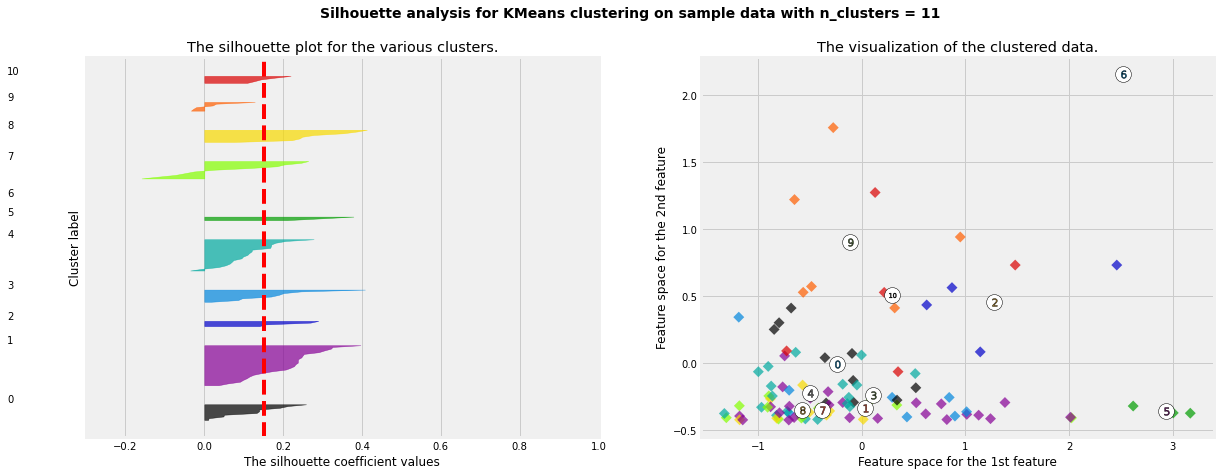

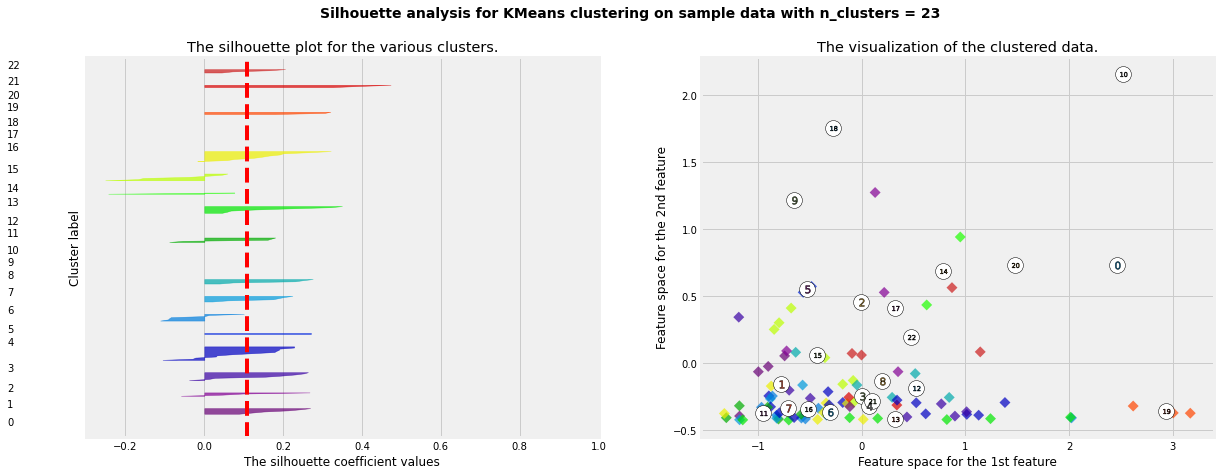

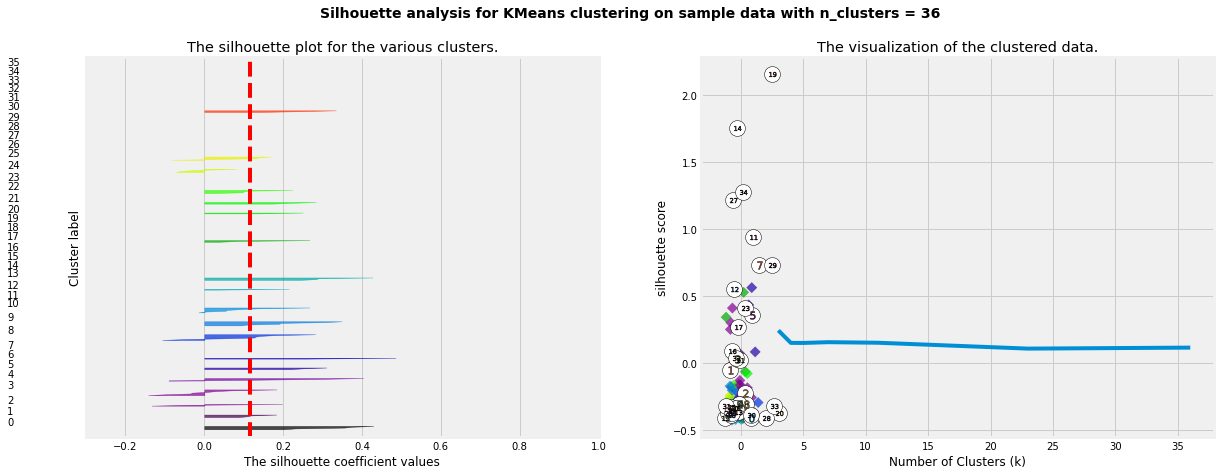

In [130]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_dataframe) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_dataframe)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_dataframe, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_dataframe, cluster_labels)

    sample_silhouette_values
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.5, y_lower + 1 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_dataframe.iloc[:, 0], scaled_dataframe.iloc[:, 1], marker='D', s=60, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=250, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=60, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

#plt.show()

style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
#plt.show()

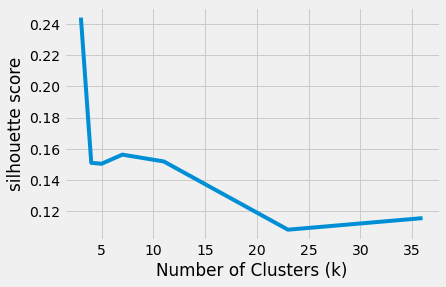

In [131]:
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.axis('auto')
plt.show()

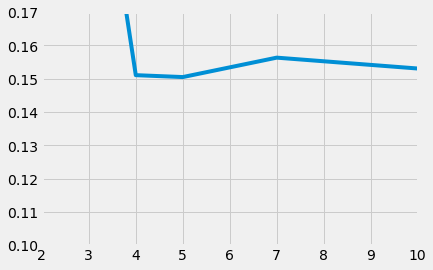

In [132]:
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.axis([2,10,0.1,0.17])
plt.show()

## PIE CHART

In [133]:
# For illustration, you can see which sentence is in which cluster
print(kmeans_model.labels_)  


[2 2 0 2 2 0 0 2 0 1 3 0 0 0 0 3 0 0 0 1 2 1 0 1 2 3 0 1 2 0 0 2 1 2 2 3 2
 0 1 2 2 1 2 3 2 2 2 2 1 3 1 0 3 0 1 3 0 2 0 3 1 0 3 1 0 0 2 2 2 2 3 2 0 3
 0 2 2 3 2 3 0 2 0 2 0 0 2 2 0 3 1 0 0 0 0 3 2 1 1]


In [134]:
dataframe['cluster']=kmeans_model.labels_

In [135]:
dataframe

USCensusID  CII.RES US_census_region  \
city                                                                        
Abilene, Texas                 1600000US4801000    0.727            South   
Alamogordo, New Mexico         1600000US3501780    0.205             West   
Albuquerque, New Mexico        1600000US3502000    0.380             West   
Altoona, Pennsylvania          1600000US4202184    0.454        Northeast   
Amarillo, Texas                1600000US4803000    0.653            South   
...                                         ...      ...              ...   
Vernal, Utah                   1600000US4980090    0.600             West   
Watertown, New York            1600000US3678608    1.052        Northeast   
Wichita Falls, Texas           1600000US4879000    1.002            South   
Wichita, Kansas                1600000US2079000    0.774          Midwest   
Winston-Salem, North Carolina  1600000US3775000    1.097            South   

                               Avg_population  \
city                                            
Abilene, Texas                         123729   
Alamogordo, New Mexico                  32986   
Albuquerque, New Mexico                614980   
Altoona, Pennsylvania                   54369   
Amarillo, Texas                        196728   
...                                       ...   
Vernal, Utah                             9755   
Watertown, New York                     26711   
Wichita Falls, Texas                   140000   
Wichita, Kansas                        453621   
Winston-Salem, North Carolina          222938   

                               Number of employees administrative sector  \
city                                                                       
Abilene, Texas                                                      1750   
Alamogordo, New Mexico                                               245   
Albuquerque, New Mexico                                            19582   
Altoona, Pennsylvania                                               1149   
Amarillo, Texas                                                     7500   
...                                                                  ...   
Vernal, Utah                                                         153   
Watertown, New York                                                  899   
Wichita Falls, Texas                                                1750   
Wichita, Kansas                                                    11801   
Winston-Salem, North Carolina                                      10224   

                               Number of employees manufacturing sector  \
city                                                                      
Abilene, Texas                                                     1991   
Alamogordo, New Mexico                                              118   
Albuquerque, New Mexico                                           10810   
Altoona, Pennsylvania                                              1006   
Amarillo, Texas                                                   12263   
...                                                                 ...   
Vernal, Utah                                                        248   
Watertown, New York                                                 818   
Wichita Falls, Texas                                               3045   
Wichita, Kansas                                                   25801   
Winston-Salem, North Carolina                                      8322   

                               Number of establishments information sector  \
city                                                                         
Abilene, Texas                                                          52   
Alamogordo, New Mexico                                                  10   
Albuquerque, New Mexico                                                276   
Altoona, Pennsylvania                     

In [136]:
# Here we get the proportions
nb_samples = [sum(kmeans_model.labels_ == j) for j in range(0,4)]

In [137]:
# On the next line the order is RANDOM. I do NOT know which cluster represents what.
# The first label should represent samples in cluster 0, and so on
labels = '1','2','3','4'
colors = ['gold','red','lightblue','green']  # Same size as labels

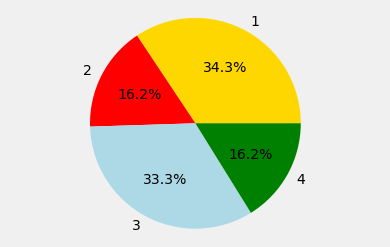

In [138]:
# Pie chart
plt.pie(nb_samples, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
np.random.seed(42)

In [139]:
dataframe.head()

USCensusID  CII.RES US_census_region  \
city                                                                  
Abilene, Texas           1600000US4801000    0.727            South   
Alamogordo, New Mexico   1600000US3501780    0.205             West   
Albuquerque, New Mexico  1600000US3502000    0.380             West   
Altoona, Pennsylvania    1600000US4202184    0.454        Northeast   
Amarillo, Texas          1600000US4803000    0.653            South   

                         Avg_population  \
city                                      
Abilene, Texas                   123729   
Alamogordo, New Mexico            32986   
Albuquerque, New Mexico          614980   
Altoona, Pennsylvania             54369   
Amarillo, Texas                  196728   

                         Number of employees administrative sector  \
city                                                                 
Abilene, Texas                                                1750   
Alamogordo, New Mexico                                         245   
Albuquerque, New Mexico                                      19582   
Altoona, Pennsylvania                                         1149   
Amarillo, Texas                                               7500   

                         Number of employees manufacturing sector  \
city                                                                
Abilene, Texas                                               1991   
Alamogordo, New Mexico                                        118   
Albuquerque, New Mexico                                     10810   
Altoona, Pennsylvania                                        1006   
Amarillo, Texas                                             12263   

                         Number of establishments information sector  \
city                                                                   
Abilene, Texas                                                    52   
Alamogordo, New Mexico                                            10   
Albuquerque, New Mexico                                          276   
Altoona, Pennsylvania                                             23   
Amarillo, Texas                                                   67   

                         Family income 2010  GDP per capita 2016  \
city                                                               
Abilene, Texas                      51012.0              37553.0   
Alamogordo, New Mexico              49297.0              57892.0   
Albuquerque, New Mexico             59191.0              42723.0   
Altoona, Pennsylvania               48750.0              37482.0   
Amarillo, Texas                     55067.0              45788.0   

                         Percent single-family houses  ...  \
city                                                   ...   
Abilene, Texas                                   69.1  ...   
Alamogordo, New Mexico                           69.0  ...   
Albuquerque, New Mexico                          62.5  ...   
Altoona, Pennsylvania                            72.3  ...   
Amarillo, Texas                                  71.7  ...   

                         Percent housing units built between 1950-1989  \
city                                                                     
Abilene, Texas                                                    63.3   
Alamogordo, New Mexico                                            69.3   
Albuquerque, New Mexico                                           57.6   
Altoona, Pennsylvania                                             37.1   
Amarillo, Texas                                                   62.3   

                         Percent housing units built before 1950  \
city                                                               
Abilene, Texas                                              14.7   
Alamogordo, New Mexico                                       4.5   
Albuquerque, New Mexico                         

In [140]:
df1=pd.read_csv('/Users/mariaussano/Desktop/uwdclassification.txt')
df1

Unnamed: 0                           city  CII.RES      RES_mean  \
0             0                 Abilene, Texas    0.727  2.630369e+08   
1             1         Alamogordo, New Mexico    0.205  8.806434e+07   
2             2        Albuquerque, New Mexico    0.380  1.657469e+09   
3             3          Altoona, Pennsylvania    0.454  9.167244e+07   
4             4                Amarillo, Texas    0.653  1.640924e+09   
..          ...                            ...      ...           ...   
98           98                   Vernal, Utah    0.600  3.559075e+07   
99           99            Watertown, New York    1.052  3.947045e+07   
100         100           Wichita Falls, Texas    1.002  2.112745e+08   
101         101                Wichita, Kansas    0.774  7.663446e+08   
102         102  Winston-Salem, North Carolina    1.097  4.471524e+08   

         CII_mean      TOT_mean  uwd_category  
0    1.921995e+08  4.552364e+08             0  
1    1.805562e+07  1.061200e+08             0  
2    6.283802e+08  2.285849e+09             0  
3    4.178493e+07  1.334574e+08             0  
4    1.074557e+09  2.715480e+09             3  
..            ...           ...           ...  
98   2.136578e+07  5.695653e+07             0  
99   4.210921e+07  8.157967e+07             2  
100  2.146086e+08  4.258831e+08             2  
101  5.958780e+08  1.362223e+09             0  
102  4.904380e+08  9.375904e+08             2  

[103 rows x 7 columns]

In [141]:
df1.drop(columns=['Unnamed: 0'], inplace=True)

In [142]:
df1.set_index('city',inplace=True)

In [143]:
df1

CII.RES      RES_mean      CII_mean  \
city                                                                 
Abilene, Texas                   0.727  2.630369e+08  1.921995e+08   
Alamogordo, New Mexico           0.205  8.806434e+07  1.805562e+07   
Albuquerque, New Mexico          0.380  1.657469e+09  6.283802e+08   
Altoona, Pennsylvania            0.454  9.167244e+07  4.178493e+07   
Amarillo, Texas                  0.653  1.640924e+09  1.074557e+09   
...                                ...           ...           ...   
Vernal, Utah                     0.600  3.559075e+07  2.136578e+07   
Watertown, New York              1.052  3.947045e+07  4.210921e+07   
Wichita Falls, Texas             1.002  2.112745e+08  2.146086e+08   
Wichita, Kansas                  0.774  7.663446e+08  5.958780e+08   
Winston-Salem, North Carolina    1.097  4.471524e+08  4.904380e+08   

                                   TOT_mean  uwd_category  
city                                                       
Abilene, Texas                 4.552364e+08             0  
Alamogordo, New Mexico         1.061200e+08             0  
Albuquerque, New Mexico        2.285849e+09             0  
Altoona, Pennsylvania          1.334574e+08             0  
Amarillo, Texas                2.715480e+09             3  
...                                     ...           ...  
Vernal, Utah                   5.695653e+07             0  
Watertown, New York            8.157967e+07             2  
Wichita Falls, Texas           4.258831e+08             2  
Wichita, Kansas                1.362223e+09             0  
Winston-Salem, North Carolina  9.375904e+08             2  

[103 rows x 5 columns]

In [144]:
#df1.rename(columns={'CII.RES':'CII/RES'}, inplace=True)

In [145]:
for i,value in enumerate(df1.index):
   value=(value).replace('city','')
   value=(value).replace(' ,',',')
   
df1

CII.RES      RES_mean      CII_mean  \
city                                                                 
Abilene, Texas                   0.727  2.630369e+08  1.921995e+08   
Alamogordo, New Mexico           0.205  8.806434e+07  1.805562e+07   
Albuquerque, New Mexico          0.380  1.657469e+09  6.283802e+08   
Altoona, Pennsylvania            0.454  9.167244e+07  4.178493e+07   
Amarillo, Texas                  0.653  1.640924e+09  1.074557e+09   
...                                ...           ...           ...   
Vernal, Utah                     0.600  3.559075e+07  2.136578e+07   
Watertown, New York              1.052  3.947045e+07  4.210921e+07   
Wichita Falls, Texas             1.002  2.112745e+08  2.146086e+08   
Wichita, Kansas                  0.774  7.663446e+08  5.958780e+08   
Winston-Salem, North Carolina    1.097  4.471524e+08  4.904380e+08   

                                   TOT_mean  uwd_category  
city                                                       
Abilene, Texas                 4.552364e+08             0  
Alamogordo, New Mexico         1.061200e+08             0  
Albuquerque, New Mexico        2.285849e+09             0  
Altoona, Pennsylvania          1.334574e+08             0  
Amarillo, Texas                2.715480e+09             3  
...                                     ...           ...  
Vernal, Utah                   5.695653e+07             0  
Watertown, New York            8.157967e+07             2  
Wichita Falls, Texas           4.258831e+08             2  
Wichita, Kansas                1.362223e+09             0  
Winston-Salem, North Carolina  9.375904e+08             2  

[103 rows x 5 columns]

In [146]:
df1.index[1]==dataframe.index[1]

True

In [147]:
ddf=pd.concat([df1,dataframe],axis=1, join="inner")

In [148]:
ddf.loc[['Abilene, Texas','Alamogordo, New Mexico','Watertown, New York'],:]

CII.RES      RES_mean      CII_mean      TOT_mean  \
city                                                                        
Abilene, Texas            0.727  2.630369e+08  1.921995e+08  4.552364e+08   
Alamogordo, New Mexico    0.205  8.806434e+07  1.805562e+07  1.061200e+08   
Watertown, New York       1.052  3.947045e+07  4.210921e+07  8.157967e+07   

                        uwd_category        USCensusID  CII.RES  \
city                                                              
Abilene, Texas                     0  1600000US4801000    0.727   
Alamogordo, New Mexico             0  1600000US3501780    0.205   
Watertown, New York                2  1600000US3678608    1.052   

                       US_census_region  Avg_population  \
city                                                      
Abilene, Texas                    South          123729   
Alamogordo, New Mexico             West           32986   
Watertown, New York           Northeast           26711   

                        Number of employees administrative sector  ...  \
city                                                               ...   
Abilene, Texas                                               1750  ...   
Alamogordo, New Mexico                                        245  ...   
Watertown, New York                                           899  ...   

                        Percent housing units built between 1950-1989  \
city                                                                    
Abilene, Texas                                                   63.3   
Alamogordo, New Mexico                                           69.3   
Watertown, New York                                              33.9   

                        Percent housing units built before 1950  Median rooms  \
city                                                                            
Abilene, Texas                                             14.7           5.3   
Alamogordo, New Mexico                                      4.5           5.4   
Watertown, New York                                        58.4           5.3   

                        Percent impervious area  Area open NLCD  \
city                                                              
Abilene, Texas                             16.4         13874.8   
Alamogordo, New Mexico                     14.4          1792.0   
Watertown, New York                        32.4           897.1   

                        Area low development NLCD  \
city                                                
Abilene, Texas                            10720.6   
Alamogordo, New Mexico                     3050.2   
Watertown, New York                        1387.7   

                        Area medium development NLCD  \
city                                                   
Abilene, Texas                                6208.8   
Alamogordo, New Mexico                         965.0   
Watertown, New York                           1509.9   

                        Area high development NLCD  Service area sq.meters  \
city                                                                         
Abilene, Texas                              3755.7               290335000   
Alamogordo, New Mexico                       208.4                56002000   
Watertown, New York                          490.1                24313500   

                        cluster  
city                             
Abilene, Texas                2  
Alamogordo, New Mexico        2  
Watertown, New York           3  

[3 rows x 27 columns]

In [149]:
ddf=ddf.drop(columns='CII.RES')

In [150]:
ddf.head()

RES_mean      CII_mean      TOT_mean  \
city                                                                
Abilene, Texas           2.630369e+08  1.921995e+08  4.552364e+08   
Alamogordo, New Mexico   8.806434e+07  1.805562e+07  1.061200e+08   
Albuquerque, New Mexico  1.657469e+09  6.283802e+08  2.285849e+09   
Altoona, Pennsylvania    9.167244e+07  4.178493e+07  1.334574e+08   
Amarillo, Texas          1.640924e+09  1.074557e+09  2.715480e+09   

                         uwd_category        USCensusID US_census_region  \
city                                                                       
Abilene, Texas                      0  1600000US4801000            South   
Alamogordo, New Mexico              0  1600000US3501780             West   
Albuquerque, New Mexico             0  1600000US3502000             West   
Altoona, Pennsylvania               0  1600000US4202184        Northeast   
Amarillo, Texas                     3  1600000US4803000            South   

                         Avg_population  \
city                                      
Abilene, Texas                   123729   
Alamogordo, New Mexico            32986   
Albuquerque, New Mexico          614980   
Altoona, Pennsylvania             54369   
Amarillo, Texas                  196728   

                         Number of employees administrative sector  \
city                                                                 
Abilene, Texas                                                1750   
Alamogordo, New Mexico                                         245   
Albuquerque, New Mexico                                      19582   
Altoona, Pennsylvania                                         1149   
Amarillo, Texas                                               7500   

                         Number of employees manufacturing sector  \
city                                                                
Abilene, Texas                                               1991   
Alamogordo, New Mexico                                        118   
Albuquerque, New Mexico                                     10810   
Altoona, Pennsylvania                                        1006   
Amarillo, Texas                                             12263   

                         Number of establishments information sector  ...  \
city                                                                  ...   
Abilene, Texas                                                    52  ...   
Alamogordo, New Mexico                                            10  ...   
Albuquerque, New Mexico                                          276  ...   
Altoona, Pennsylvania                                             23  ...   
Amarillo, Texas                                                   67  ...   

                         Percent housing units built between 1950-1989  \
city                                                                     
Abilene, Texas                                                    63.3   
Alamogordo, New Mexico                                            69.3   
Albuquerque, New Mexico                                           57.6   
Altoona, Pennsylvania                                             37.1   
Amarillo, Texas                                                   62.3   

                         Percent housing units built before 1950  \
city                                                               
Abilene, Texas                                              14.7   
Alamogordo, New Mexico                                       4.5   
Albuquerque, New Mexico                                      7.2   
Altoona, Pennsylvania                                       58.7   
Amarillo, Texas                                             14.9   

                         Median rooms  Percent impervious area  \
city                                                             
Abilene, Texas                    5.3                     16.4   
A

In [151]:
ddf['CII.RES']=dataframe['CII.RES']

In [152]:
ddf.head()

RES_mean      CII_mean      TOT_mean  \
city                                                                
Abilene, Texas           2.630369e+08  1.921995e+08  4.552364e+08   
Alamogordo, New Mexico   8.806434e+07  1.805562e+07  1.061200e+08   
Albuquerque, New Mexico  1.657469e+09  6.283802e+08  2.285849e+09   
Altoona, Pennsylvania    9.167244e+07  4.178493e+07  1.334574e+08   
Amarillo, Texas          1.640924e+09  1.074557e+09  2.715480e+09   

                         uwd_category        USCensusID US_census_region  \
city                                                                       
Abilene, Texas                      0  1600000US4801000            South   
Alamogordo, New Mexico              0  1600000US3501780             West   
Albuquerque, New Mexico             0  1600000US3502000             West   
Altoona, Pennsylvania               0  1600000US4202184        Northeast   
Amarillo, Texas                     3  1600000US4803000            South   

                         Avg_population  \
city                                      
Abilene, Texas                   123729   
Alamogordo, New Mexico            32986   
Albuquerque, New Mexico          614980   
Altoona, Pennsylvania             54369   
Amarillo, Texas                  196728   

                         Number of employees administrative sector  \
city                                                                 
Abilene, Texas                                                1750   
Alamogordo, New Mexico                                         245   
Albuquerque, New Mexico                                      19582   
Altoona, Pennsylvania                                         1149   
Amarillo, Texas                                               7500   

                         Number of employees manufacturing sector  \
city                                                                
Abilene, Texas                                               1991   
Alamogordo, New Mexico                                        118   
Albuquerque, New Mexico                                     10810   
Altoona, Pennsylvania                                        1006   
Amarillo, Texas                                             12263   

                         Number of establishments information sector  ...  \
city                                                                  ...   
Abilene, Texas                                                    52  ...   
Alamogordo, New Mexico                                            10  ...   
Albuquerque, New Mexico                                          276  ...   
Altoona, Pennsylvania                                             23  ...   
Amarillo, Texas                                                   67  ...   

                         Percent housing units built before 1950  \
city                                                               
Abilene, Texas                                              14.7   
Alamogordo, New Mexico                                       4.5   
Albuquerque, New Mexico                                      7.2   
Altoona, Pennsylvania                                       58.7   
Amarillo, Texas                                             14.9   

                         Median rooms  Percent impervious area  \
city                                                             
Abilene, Texas                    5.3                     16.4   
Alamogordo, New Mexico            5.4                     14.4   
Albuquerque, New Mexico           5.3                     26.9   
Altoona, Pennsylvania             6.1                     18.9   
Amarillo, Texas                   5.1                     25.2   

                         Area open NLCD  Area low development NLCD  \
city                                                                 
Abilene, Texas                  13874.8                    10720.6   
Alamogordo, New Mexico           1792.0      

In [153]:
scaled=scaled_dataframe

In [154]:
scaled_dataframe=ddf

In [155]:
scaled_dataframe.head(-1)

RES_mean      CII_mean      TOT_mean  \
city                                                                
Abilene, Texas           2.630369e+08  1.921995e+08  4.552364e+08   
Alamogordo, New Mexico   8.806434e+07  1.805562e+07  1.061200e+08   
Albuquerque, New Mexico  1.657469e+09  6.283802e+08  2.285849e+09   
Altoona, Pennsylvania    9.167244e+07  4.178493e+07  1.334574e+08   
Amarillo, Texas          1.640924e+09  1.074557e+09  2.715480e+09   
...                               ...           ...           ...   
Vancouver, Washington    5.238164e+08  1.912341e+08  7.150505e+08   
Vernal, Utah             3.559075e+07  2.136578e+07  5.695653e+07   
Watertown, New York      3.947045e+07  4.210921e+07  8.157967e+07   
Wichita Falls, Texas     2.112745e+08  2.146086e+08  4.258831e+08   
Wichita, Kansas          7.663446e+08  5.958780e+08  1.362223e+09   

                         uwd_category        USCensusID US_census_region  \
city                                                                       
Abilene, Texas                      0  1600000US4801000            South   
Alamogordo, New Mexico              0  1600000US3501780             West   
Albuquerque, New Mexico             0  1600000US3502000             West   
Altoona, Pennsylvania               0  1600000US4202184        Northeast   
Amarillo, Texas                     3  1600000US4803000            South   
...                               ...               ...              ...   
Vancouver, Washington               0  1600000US5374060             West   
Vernal, Utah                        0  1600000US4980090             West   
Watertown, New York                 2  1600000US3678608        Northeast   
Wichita Falls, Texas                2  1600000US4879000            South   
Wichita, Kansas                     0  1600000US2079000          Midwest   

                         Avg_population  \
city                                      
Abilene, Texas                   123729   
Alamogordo, New Mexico            32986   
Albuquerque, New Mexico          614980   
Altoona, Pennsylvania             54369   
Amarillo, Texas                  196728   
...                                 ...   
Vancouver, Washington            234369   
Vernal, Utah                       9755   
Watertown, New York               26711   
Wichita Falls, Texas             140000   
Wichita, Kansas                  453621   

                         Number of employees administrative sector  \
city                                                                 
Abilene, Texas                                                1750   
Alamogordo, New Mexico                                         245   
Albuquerque, New Mexico                                      19582   
Altoona, Pennsylvania                                         1149   
Amarillo, Texas                                               7500   
...                                                            ...   
Vancouver, Washington                                         6883   
Vernal, Utah                                                   153   
Watertown, New York                                            899   
Wichita Falls, Texas                                          1750   
Wichita, Kansas                                              11801   

                         Number of employees manufacturing sector  \
city                                                                
Abilene, Texas                                               1991   
Alamogordo, New Mexico                                        118   
Albuquerque, New Mexico                                     10810   
Altoona, Pennsylvania                                        1006   
Amarillo, Texas                                             12263   
...                                                           ...   
Vancouver, Washington                                        6379   
Vernal, Utah                                      

## GCNN function def


In [223]:
def build_graph(c):
    labels = []
    nodes = []
    X = []
    for i,data in enumerate(c.index): 
        labels.append(c.loc[i,'TOT_mean'])
        X.append(c.iloc[i,2:])
        nodes.append(c.loc[i,'city'])

    X = np.array(X,dtype=float)  
    N = X.shape[0] #the number of nodes 
    F = X.shape[1] #the size of node features #1
    print('X shape: ', X.shape)        

    print('\nNumber of nodes (N): ', N)
    print('\nNumber of features (F) of each node: ', F)
    print('\nCategories: ', sorted(set(labels)))
    print('labels:', labels)

    num_classes = len(set(labels))
    print('\nNumber of classes: ', num_classes)
    
    V=[]
    a = np.zeros((N, N))
    for i in range(N):
        for j in range(1,N+1):
            #print('self.cluster.loc[',i,',',j,']',self.cluster.iloc[i,j])
            if(c.iloc[i,j]<=2):
                a[i,j-1]=1
                #V.append(c.iloc[i,j])
            #print ('a[',i,',',j-2,']:', a[i,j-2] )     
        #print('a:', a)           
    a = np.maximum(a, a.T).astype(int) #.T do the transpose
    a = sp.csr_matrix(a)                   
    print('Shape of A: ', a.shape)
    print('\nAdjacency Matrix (a):\n', a)
    
    # Preprocessing operation
    a = GCNConv.preprocess(a).astype('f4')
    print('X:',X)
    
    #r,v= a.nonzero()
    #e = sp.csr_matrix((V,(r,v))) 
    #ee=e.toarray()
    
    return labels,nodes,X,N,F,a


In [224]:
class CustomModel(keras.Model):
    def test_step(self, data):
        # Unpack the data
        x, y = data
        # Compute predictions
        y_pred = self(x, training=False)
        # Updates the metrics tracking the loss
        self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        # Update the metrics.
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics} 

In [225]:
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100           # Number of training epochs
es_patience = 10        # Patience for early stopping


# Model definition
X_in = Input(shape=(f2, ))
fltr_in = Input((n2, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])
dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(16,
                         activation='softmax',
                         use_bias=False)([dropout_2, fltr_in])
#dropout_3 = Dropout(dropout)(graph_conv_2)
#dense = Dense(16,activation='softmax',use_bias=False)(dropout_3)

# Build model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2, name='GCNN3')
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae',tf.keras.metrics.RootMeanSquaredError()],
              weighted_metrics=[])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora')
callback_GCN = [tbCallBack_GCN]

Model: "GCNN3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 dropout_2 (Dropout)            (None, 34)           0           ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 gcn_conv_2 (GCNConv)           (None, 16)           544         ['dropout_2[0][0]',              
                                                                  'input_4[0][0]']            

In [226]:
# Utility function to create folders and callbacks for training
# parameters-> monitor, mode
from datetime import datetime

def create_folders_and_callbacks(model_name,now):
    exps_dir = os.path.join('Model_Training_24/02')
    if not os.path.exists(exps_dir):
        os.makedirs(exps_dir)


    exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
    if not os.path.exists(exp_dir):
        os.makedirs(exp_dir)
      
    callbacks = []

    # Model checkpoint
    # ----------------
    ckpt_dir = os.path.join(exp_dir, 'ckpts')
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), verbose=1,
                                                     save_weights_only=True, # True to save only weights
                                                     save_best_only=True
                                                    ) # True to save only the best epoch 
    callbacks.append(ckpt_callback)

    # Visualize Learning on Tensorboard
    # ---------------------------------
    tb_dir = os.path.join(exp_dir, 'tb_logs')
    if not os.path.exists(tb_dir):
        os.makedirs(tb_dir)
      
    # By default shows losses and metrics for both training and validation
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
    callbacks.append(tb_callback)

    # Early Stopping
    # --------------
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=es_patience, restore_best_weights=True)
    reducelr_callback=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=7, factor=0.5, min_lr=1e-5)
    callbacks.append(es_callback)
    callbacks.append(reducelr_callback)
   

    return callbacks

In [227]:
now = datetime.now().strftime('%b%d_%H-%M-%S')
handmade_callbacks = create_folders_and_callbacks(model_name='model1',now=now)

## Intraclustering distances and graph edges computations



## CLUSTER 1

In [156]:
cluster1=pd.DataFrame(scaled_dataframe[label==0])
cluster1

RES_mean      CII_mean      TOT_mean  \
city                                                                  
Albuquerque, New Mexico    1.657469e+09  6.283802e+08  2.285849e+09   
Annapolis, Maryland        7.087352e+07  2.786241e+07  9.873593e+07   
Arlington, Texas           1.133747e+09  4.061407e+08  1.539888e+09   
Aurora, Colorado           8.644079e+08  2.594749e+08  1.123883e+09   
Belgrade, Montana          2.552727e+07  5.248771e+06  3.077604e+07   
Bend, Oregon               2.209542e+08  1.252285e+08  3.461827e+08   
Bloomington, Indiana       1.495030e+08  1.147876e+08  2.642905e+08   
Bloomington, Minnesota     2.049129e+08  1.245589e+08  3.294718e+08   
Boulder City, Nevada       9.892249e+07  1.870329e+08  2.859554e+08   
Bowie, Maryland            3.693483e+07  5.139407e+06  4.207424e+07   
Bozeman, Montana           8.913462e+07  5.798448e+07  1.471191e+08   
Clovis, California         4.989500e+08  1.023382e+08  6.012882e+08   
Durham, North Carolina     4.082809e+08  2.971467e+08  7.054277e+08   
Flagstaff, Arizona         1.144096e+08  7.561998e+07  1.900296e+08   
Fort Collins, Colorado     3.042208e+08  2.661086e+08  5.703295e+08   
Green River, Wyoming       4.270585e+07  1.718253e+07  5.988838e+07   
Madison, Wisconsin         4.100420e+08  3.272474e+08  7.372894e+08   
Marietta, Georgia          1.328847e+08  8.385131e+07  2.167360e+08   
Minot, North Dakota        8.492791e+07  3.850415e+07  1.234321e+08   
Montrose, Colorado         6.795068e+07  2.669124e+07  9.464192e+07   
Peoria, Arizona            5.180937e+08  1.868110e+08  7.049047e+08   
Pierre, South Dakota       3.099920e+07  1.668804e+07  4.768724e+07   
Pikeville, Kentucky        6.375668e+07  8.144758e+06  7.190144e+07   
Rochester, Minnesota       1.783230e+08  1.790936e+08  3.574166e+08   
Rock Springs, Wyoming      8.310854e+07  4.300215e+07  1.261107e+08   
Santa Barbara, California  2.290840e+08  7.296286e+07  3.020469e+08   
Santa Rosa, California     3.708188e+08  1.376106e+08  5.084294e+08   
Sioux Falls, South Dakota  3.189744e+08  2.422916e+08  5.612660e+08   
Spearfish, South Dakota    1.574084e+07  1.331851e+07  2.905935e+07   
St. Peters, Missouri       1.026120e+08  5.315578e+07  1.557677e+08   
Tyler, Texas               3.424465e+08  2.612034e+08  6.036499e+08   
Vacaville, California      3.139616e+08  1.095966e+08  4.235582e+08   
Vancouver, Washington      5.238164e+08  1.912341e+08  7.150505e+08   
Vernal, Utah               3.559075e+07  2.136578e+07  5.695653e+07   

                           uwd_category        USCensusID US_census_region  \
city                                                                         
Albuquerque, New Mexico               0  1600000US3502000             West   
Annapolis, Maryland                   0  1600000US2401600            South   
Arlington, Texas                      0  1600000US4804000            South   
Aurora, Colorado                      0  1600000US0804000             West   
Belgrade, Montana                     0  1600000US3004975             West   
Bend, Oregon                          0  1600000US4105800             West   
Bloomington, Indiana                  0  1600000US1805860          Midwest   
Bloomington, Minnesota                0  1600000US2706616          Midwest   
Boulder City, Nevada                  2  1600000US3206500             West   
Bowie, Maryland                       0  1600000US2408775            South   
Bozeman, Montana                      0  1600000US3008950             West   
Clovis, California                    0  1600000US0614218             West   
Durham, North Carolina                0  1600000US3719000            South   
Flagstaff, Arizona                    0  1600000US0423620             West   
Fort Collins, Colorado                0  1600000US0827425             West   
Green River, Wyoming                  0  1600000US5633740             West   
Madison, Wisconsin                    0  1600000US5548000          Mid

In [157]:
cluster1.drop(columns='cluster',inplace=True)

In [158]:
cluster1

RES_mean      CII_mean      TOT_mean  \
city                                                                  
Albuquerque, New Mexico    1.657469e+09  6.283802e+08  2.285849e+09   
Annapolis, Maryland        7.087352e+07  2.786241e+07  9.873593e+07   
Arlington, Texas           1.133747e+09  4.061407e+08  1.539888e+09   
Aurora, Colorado           8.644079e+08  2.594749e+08  1.123883e+09   
Belgrade, Montana          2.552727e+07  5.248771e+06  3.077604e+07   
Bend, Oregon               2.209542e+08  1.252285e+08  3.461827e+08   
Bloomington, Indiana       1.495030e+08  1.147876e+08  2.642905e+08   
Bloomington, Minnesota     2.049129e+08  1.245589e+08  3.294718e+08   
Boulder City, Nevada       9.892249e+07  1.870329e+08  2.859554e+08   
Bowie, Maryland            3.693483e+07  5.139407e+06  4.207424e+07   
Bozeman, Montana           8.913462e+07  5.798448e+07  1.471191e+08   
Clovis, California         4.989500e+08  1.023382e+08  6.012882e+08   
Durham, North Carolina     4.082809e+08  2.971467e+08  7.054277e+08   
Flagstaff, Arizona         1.144096e+08  7.561998e+07  1.900296e+08   
Fort Collins, Colorado     3.042208e+08  2.661086e+08  5.703295e+08   
Green River, Wyoming       4.270585e+07  1.718253e+07  5.988838e+07   
Madison, Wisconsin         4.100420e+08  3.272474e+08  7.372894e+08   
Marietta, Georgia          1.328847e+08  8.385131e+07  2.167360e+08   
Minot, North Dakota        8.492791e+07  3.850415e+07  1.234321e+08   
Montrose, Colorado         6.795068e+07  2.669124e+07  9.464192e+07   
Peoria, Arizona            5.180937e+08  1.868110e+08  7.049047e+08   
Pierre, South Dakota       3.099920e+07  1.668804e+07  4.768724e+07   
Pikeville, Kentucky        6.375668e+07  8.144758e+06  7.190144e+07   
Rochester, Minnesota       1.783230e+08  1.790936e+08  3.574166e+08   
Rock Springs, Wyoming      8.310854e+07  4.300215e+07  1.261107e+08   
Santa Barbara, California  2.290840e+08  7.296286e+07  3.020469e+08   
Santa Rosa, California     3.708188e+08  1.376106e+08  5.084294e+08   
Sioux Falls, South Dakota  3.189744e+08  2.422916e+08  5.612660e+08   
Spearfish, South Dakota    1.574084e+07  1.331851e+07  2.905935e+07   
St. Peters, Missouri       1.026120e+08  5.315578e+07  1.557677e+08   
Tyler, Texas               3.424465e+08  2.612034e+08  6.036499e+08   
Vacaville, California      3.139616e+08  1.095966e+08  4.235582e+08   
Vancouver, Washington      5.238164e+08  1.912341e+08  7.150505e+08   
Vernal, Utah               3.559075e+07  2.136578e+07  5.695653e+07   

                           uwd_category        USCensusID US_census_region  \
city                                                                         
Albuquerque, New Mexico               0  1600000US3502000             West   
Annapolis, Maryland                   0  1600000US2401600            South   
Arlington, Texas                      0  1600000US4804000            South   
Aurora, Colorado                      0  1600000US0804000             West   
Belgrade, Montana                     0  1600000US3004975             West   
Bend, Oregon                          0  1600000US4105800             West   
Bloomington, Indiana                  0  1600000US1805860          Midwest   
Bloomington, Minnesota                0  1600000US2706616          Midwest   
Boulder City, Nevada                  2  1600000US3206500             West   
Bowie, Maryland                       0  1600000US2408775            South   
Bozeman, Montana                      0  1600000US3008950             West   
Clovis, California                    0  1600000US0614218             West   
Durham, North Carolina                0  1600000US3719000            South   
Flagstaff, Arizona                    0  1600000US0423620             West   
Fort Collins, Colorado                0  1600000US0827425             West   
Green River, Wyoming                  0  1600000US5633740             West   
Madison, Wisconsin                    0  1600000US5548000          Mid

<AxesSubplot:>

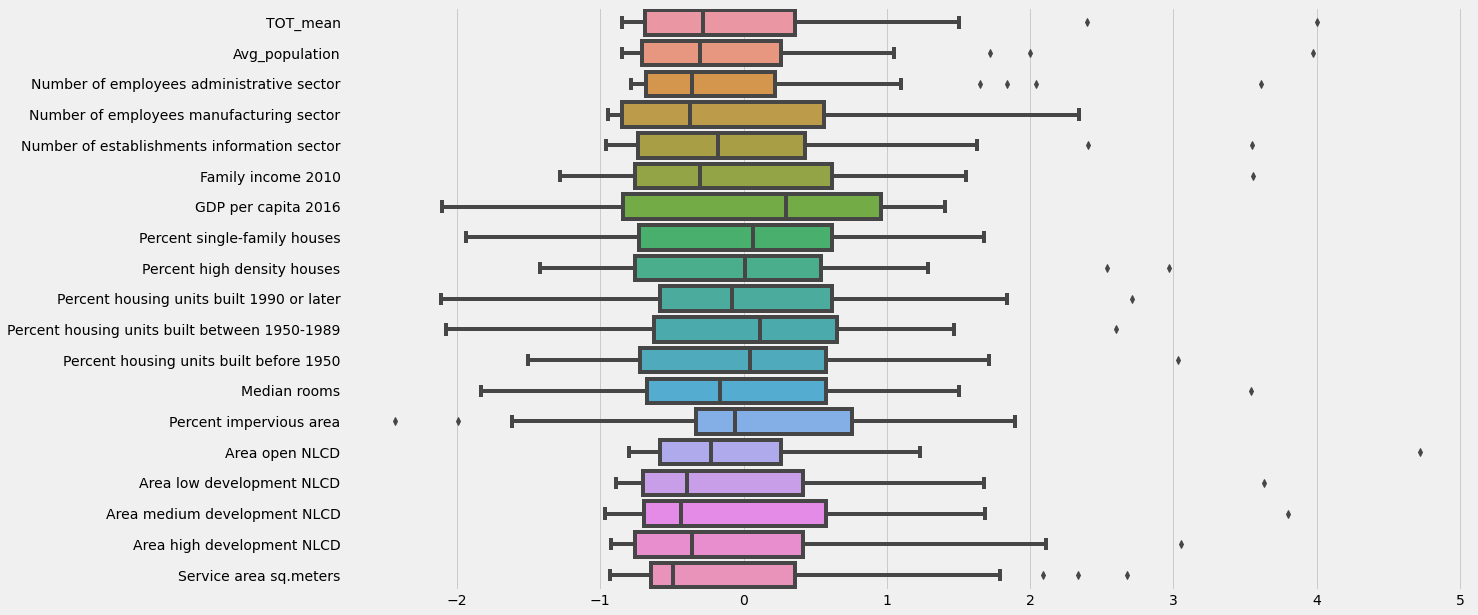

In [159]:
c_scaler = StandardScaler()
c_scaled_array = c_scaler.fit_transform(cluster1.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']))
c_scaled_dataframe = pd.DataFrame(c_scaled_array,columns=(cluster1.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']).columns))
plt.figure(figsize = (18,10))
sns.boxplot(data = c_scaled_dataframe, orient = "h")

In [160]:
c_scaled_dataframe.index=cluster1.index

In [161]:
X_dist_1 = kmeans_model._transform(c_scaled_dataframe)
#X_dist_1

In [162]:
dist11=[]
for i in range (len(X_dist_1)):
    #print(X_dist_1[i][0])
    dist11=np.append(dist11,X_dist_1[i][0])
c_scaled_dataframe['dist_centroide']=dist11
c_scaled_dataframe

TOT_mean  Avg_population  \
city                                                  
Albuquerque, New Mexico    3.998724        3.974225   
Annapolis, Maryland       -0.701626       -0.608186   
Arlington, Texas           2.395570        2.000604   
Aurora, Colorado           1.501529        1.717138   
Belgrade, Montana         -0.847680       -0.848092   
Bend, Oregon              -0.169835       -0.453348   
Bloomington, Indiana      -0.345831        0.017443   
Bloomington, Minnesota    -0.205749       -0.231114   
Boulder City, Nevada      -0.299271       -0.746114   
Bowie, Maryland           -0.823399       -0.738100   
Bozeman, Montana          -0.597645       -0.600211   
Clovis, California         0.378415       -0.100708   
Durham, North Carolina     0.602222        1.050016   
Flagstaff, Arizona        -0.505426       -0.376024   
Fort Collins, Colorado     0.311881        0.223838   
Green River, Wyoming      -0.785114       -0.810594   
Madison, Wisconsin         0.670697        1.004861   
Marietta, Georgia         -0.448031       -0.453713   
Minot, North Dakota       -0.648552       -0.401266   
Montrose, Colorado        -0.710425       -0.763930   
Peoria, Arizona            0.601098        0.271511   
Pierre, South Dakota      -0.811336       -0.800872   
Pikeville, Kentucky       -0.759297       -0.512728   
Rochester, Minnesota      -0.145693       -0.062947   
Rock Springs, Wyoming     -0.642795       -0.755359   
Santa Barbara, California -0.264688       -0.180359   
Santa Rosa, California     0.178851        0.420480   
Sioux Falls, South Dakota  0.292402        0.350178   
Spearfish, South Dakota   -0.851369       -0.826234   
St. Peters, Missouri      -0.579059       -0.550505   
Tyler, Texas               0.383490       -0.147309   
Vacaville, California     -0.003547       -0.180661   
Vancouver, Washington      0.622903        0.951080   
Vernal, Utah              -0.791415       -0.833001   

                           Number of employees administrative sector  \
city                                                                   
Albuquerque, New Mexico                                     3.609175   
Annapolis, Maryland                                        -0.659810   
Arlington, Texas                                            1.650681   
Aurora, Colorado                                            1.099953   
Belgrade, Montana                                          -0.774367   
Bend, Oregon                                               -0.270227   
Bloomington, Indiana                                        0.252818   
Bloomington, Minnesota                                      2.040039   
Boulder City, Nevada                                       -0.776393   
Bowie, Maryland                                            -0.665212   
Bozeman, Montana                                           -0.645632   
Clovis, California                                         -0.571586   
Durham, North Carolina                                      0.807147   
Flagstaff, Arizona                                         -0.594092   
Fort Collins, Colorado                                     -0.018607   
Green River, Wyoming                                       -0.784495   
Madison, Wisconsin                                          1.839059   
Marietta, Georgia                                          -0.030311   
Minot, North Dakota                                        -0.611422   
Montrose, Colorado                                         -0.758613   
Peoria, Arizona                                            -0.505193   
Pierre, South Dakota                                       -0.758613   
Pikeville, Kentucky                                        -0.726429   
Rochester, Minnesota                                       -0.277654   
Rock Springs, Wyoming                                      -0.685693   
Santa Barbara, California                                  -0.133389   
Santa Rosa, California        

In [163]:
c_scaled_dataframe.sort_values(by=['dist_centroide'],inplace=True)
#c_scaled_dataframe

<AxesSubplot:ylabel='city'>

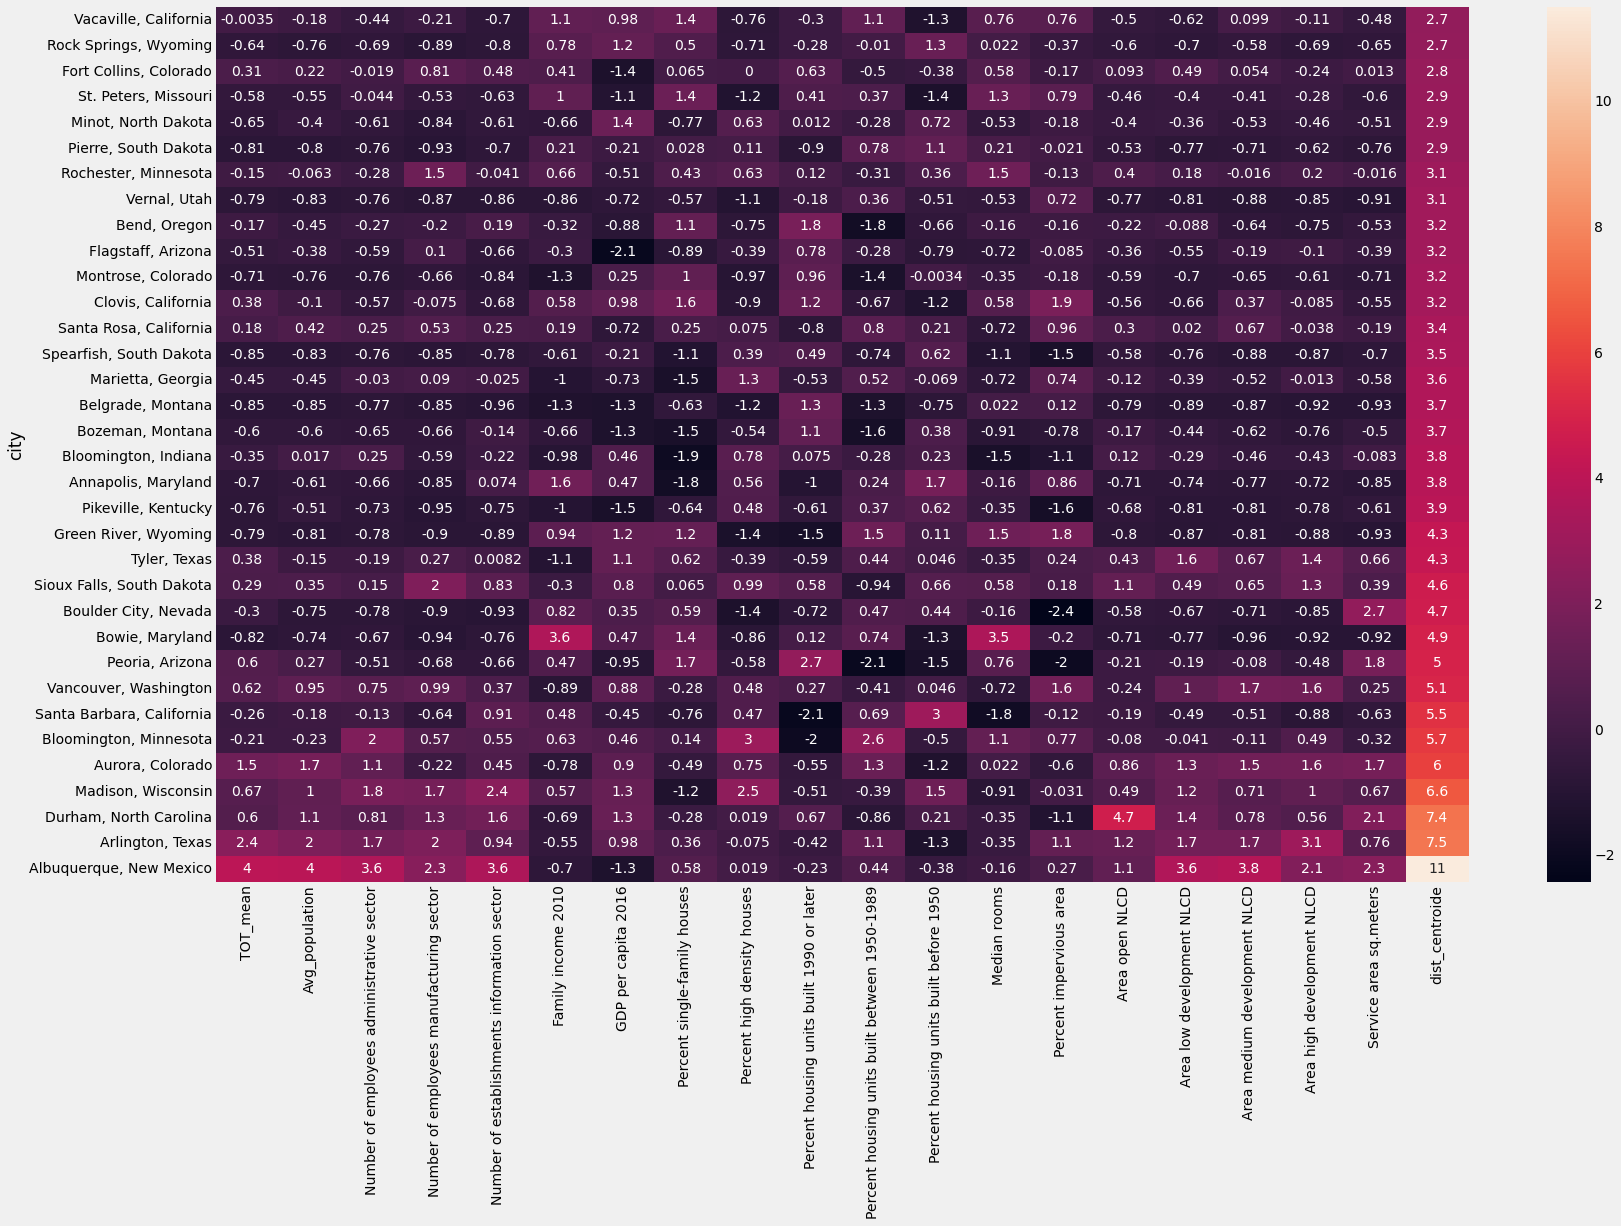

In [164]:
plt.figure(figsize = (25,15))
sns.heatmap(c_scaled_dataframe,annot=True)

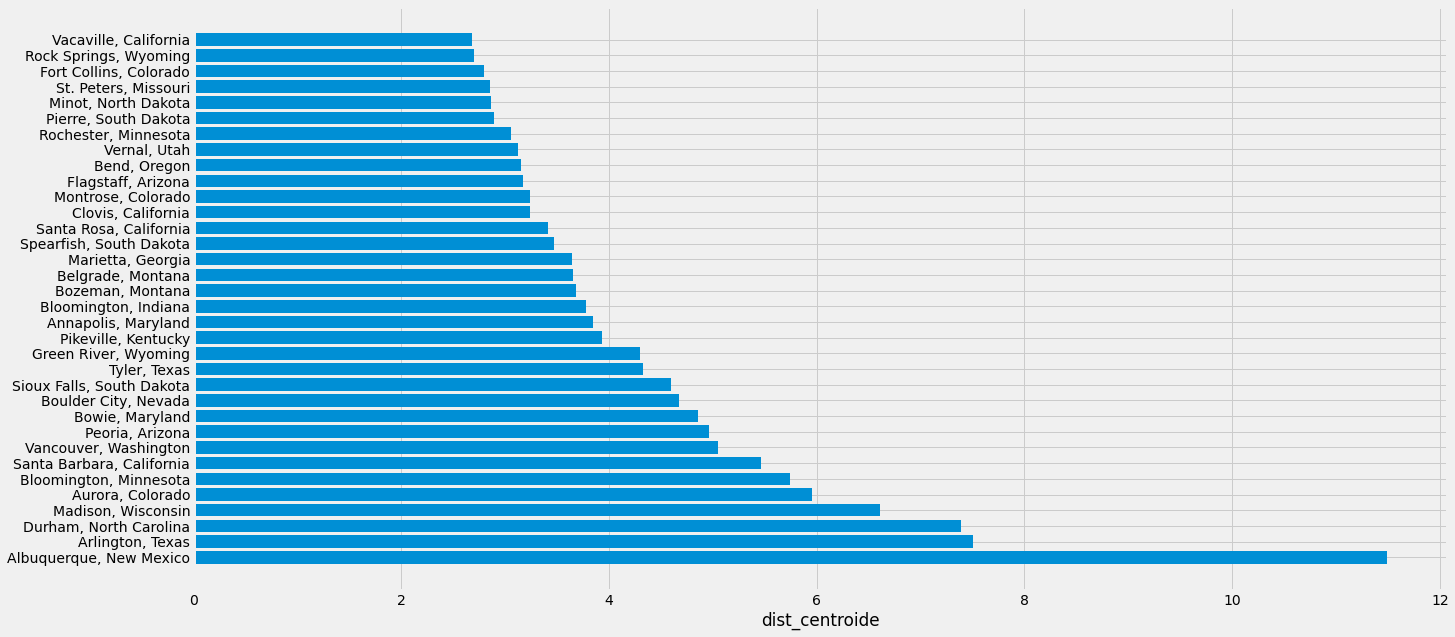

In [165]:
fig, ax = plt.subplots(figsize = (20,10))
ax.barh(c_scaled_dataframe.index,c_scaled_dataframe['dist_centroide'],align='center')
ax.set_yticks(c_scaled_dataframe.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('dist_centroide')
#ax.set_title('How fast do you want to go today?')
plt.show()


In [166]:
c_scaled_dataframe

TOT_mean  Avg_population  \
city                                                  
Vacaville, California     -0.003547       -0.180661   
Rock Springs, Wyoming     -0.642795       -0.755359   
Fort Collins, Colorado     0.311881        0.223838   
St. Peters, Missouri      -0.579059       -0.550505   
Minot, North Dakota       -0.648552       -0.401266   
Pierre, South Dakota      -0.811336       -0.800872   
Rochester, Minnesota      -0.145693       -0.062947   
Vernal, Utah              -0.791415       -0.833001   
Bend, Oregon              -0.169835       -0.453348   
Flagstaff, Arizona        -0.505426       -0.376024   
Montrose, Colorado        -0.710425       -0.763930   
Clovis, California         0.378415       -0.100708   
Santa Rosa, California     0.178851        0.420480   
Spearfish, South Dakota   -0.851369       -0.826234   
Marietta, Georgia         -0.448031       -0.453713   
Belgrade, Montana         -0.847680       -0.848092   
Bozeman, Montana          -0.597645       -0.600211   
Bloomington, Indiana      -0.345831        0.017443   
Annapolis, Maryland       -0.701626       -0.608186   
Pikeville, Kentucky       -0.759297       -0.512728   
Green River, Wyoming      -0.785114       -0.810594   
Tyler, Texas               0.383490       -0.147309   
Sioux Falls, South Dakota  0.292402        0.350178   
Boulder City, Nevada      -0.299271       -0.746114   
Bowie, Maryland           -0.823399       -0.738100   
Peoria, Arizona            0.601098        0.271511   
Vancouver, Washington      0.622903        0.951080   
Santa Barbara, California -0.264688       -0.180359   
Bloomington, Minnesota    -0.205749       -0.231114   
Aurora, Colorado           1.501529        1.717138   
Madison, Wisconsin         0.670697        1.004861   
Durham, North Carolina     0.602222        1.050016   
Arlington, Texas           2.395570        2.000604   
Albuquerque, New Mexico    3.998724        3.974225   

                           Number of employees administrative sector  \
city                                                                   
Vacaville, California                                      -0.436323   
Rock Springs, Wyoming                                      -0.685693   
Fort Collins, Colorado                                     -0.018607   
St. Peters, Missouri                                       -0.043589   
Minot, North Dakota                                        -0.611422   
Pierre, South Dakota                                       -0.758613   
Rochester, Minnesota                                       -0.277654   
Vernal, Utah                                               -0.763564   
Bend, Oregon                                               -0.270227   
Flagstaff, Arizona                                         -0.594092   
Montrose, Colorado                                         -0.758613   
Clovis, California                                         -0.571586   
Santa Rosa, California                                      0.246516   
Spearfish, South Dakota                                    -0.761764   
Marietta, Georgia                                          -0.030311   
Belgrade, Montana                                          -0.774367   
Bozeman, Montana                                           -0.645632   
Bloomington, Indiana                                        0.252818   
Annapolis, Maryland                                        -0.659810   
Pikeville, Kentucky                                        -0.726429   
Green River, Wyoming                                       -0.784495   
Tyler, Texas                                               -0.193706   
Sioux Falls, South Dakota                                   0.150190   
Boulder City, Nevada                                       -0.776393   
Bowie, Maryland                                            -0.665212   
Peoria, Arizona                                            -0.505193   
Vancouver, Washington         

In [167]:
c1=pd.DataFrame(c_scaled_dataframe.iloc[:,:-1])

In [168]:
cc=c_scaled_dataframe.reset_index()

In [169]:
for i in range(len(cc)):
    distance=[]
    for j in range(len(cc)):
        d1=cc.loc[i,'dist_centroide']
        d2=cc.loc[j,'dist_centroide']
        d=d1-d2
        dm=abs(d)
        distance=np.append(distance,dm)
    c1['d_from_',cc.loc[i,'city']]=distance
    #print(distance,"end\n")

In [170]:
c1

TOT_mean  Avg_population  \
city                                                  
Vacaville, California     -0.003547       -0.180661   
Rock Springs, Wyoming     -0.642795       -0.755359   
Fort Collins, Colorado     0.311881        0.223838   
St. Peters, Missouri      -0.579059       -0.550505   
Minot, North Dakota       -0.648552       -0.401266   
Pierre, South Dakota      -0.811336       -0.800872   
Rochester, Minnesota      -0.145693       -0.062947   
Vernal, Utah              -0.791415       -0.833001   
Bend, Oregon              -0.169835       -0.453348   
Flagstaff, Arizona        -0.505426       -0.376024   
Montrose, Colorado        -0.710425       -0.763930   
Clovis, California         0.378415       -0.100708   
Santa Rosa, California     0.178851        0.420480   
Spearfish, South Dakota   -0.851369       -0.826234   
Marietta, Georgia         -0.448031       -0.453713   
Belgrade, Montana         -0.847680       -0.848092   
Bozeman, Montana          -0.597645       -0.600211   
Bloomington, Indiana      -0.345831        0.017443   
Annapolis, Maryland       -0.701626       -0.608186   
Pikeville, Kentucky       -0.759297       -0.512728   
Green River, Wyoming      -0.785114       -0.810594   
Tyler, Texas               0.383490       -0.147309   
Sioux Falls, South Dakota  0.292402        0.350178   
Boulder City, Nevada      -0.299271       -0.746114   
Bowie, Maryland           -0.823399       -0.738100   
Peoria, Arizona            0.601098        0.271511   
Vancouver, Washington      0.622903        0.951080   
Santa Barbara, California -0.264688       -0.180359   
Bloomington, Minnesota    -0.205749       -0.231114   
Aurora, Colorado           1.501529        1.717138   
Madison, Wisconsin         0.670697        1.004861   
Durham, North Carolina     0.602222        1.050016   
Arlington, Texas           2.395570        2.000604   
Albuquerque, New Mexico    3.998724        3.974225   

                           Number of employees administrative sector  \
city                                                                   
Vacaville, California                                      -0.436323   
Rock Springs, Wyoming                                      -0.685693   
Fort Collins, Colorado                                     -0.018607   
St. Peters, Missouri                                       -0.043589   
Minot, North Dakota                                        -0.611422   
Pierre, South Dakota                                       -0.758613   
Rochester, Minnesota                                       -0.277654   
Vernal, Utah                                               -0.763564   
Bend, Oregon                                               -0.270227   
Flagstaff, Arizona                                         -0.594092   
Montrose, Colorado                                         -0.758613   
Clovis, California                                         -0.571586   
Santa Rosa, California                                      0.246516   
Spearfish, South Dakota                                    -0.761764   
Marietta, Georgia                                          -0.030311   
Belgrade, Montana                                          -0.774367   
Bozeman, Montana                                           -0.645632   
Bloomington, Indiana                                        0.252818   
Annapolis, Maryland                                        -0.659810   
Pikeville, Kentucky                                        -0.726429   
Green River, Wyoming                                       -0.784495   
Tyler, Texas                                               -0.193706   
Sioux Falls, South Dakota                                   0.150190   
Boulder City, Nevada                                       -0.776393   
Bowie, Maryland                                            -0.665212   
Peoria, Arizona                                            -0.505193   
Vancouver, Washington         

## CLUSTER 2

In [171]:
cluster2=pd.DataFrame(scaled_dataframe[label==1])
#cluster2.drop(columns='cluster', inplace=True)
#len(cluster2)
cluster2.drop(columns='cluster',inplace=True)
cluster2

RES_mean  \
city                                                               
Austin, Texas                                       2.121759e+09   
Charlotte, North Carolina                           1.719203e+09   
Cincinnati, Ohio                                    1.296556e+09   
Dallas, Texas                                       2.228160e+09   
El Paso, Texas                                      1.788006e+09   
Fort Worth, Texas                                   1.529482e+09   
Greensboro, North Carolina                          4.961468e+08   
Kansas City, Missouri                               6.835466e+08   
Las Vegas, Nevada                                   7.584351e+09   
Louisville/Jefferson County metro government (b...  1.257362e+09   
Memphis, Tennessee                                  1.600709e+09   
Orlando, Florida                                    1.007084e+09   
Phoenix, Arizona                                    4.872278e+09   
Tucson, Arizona                                     2.138384e+09   
Wichita, Kansas                                     7.663446e+08   
Winston-Salem, North Carolina                       4.471524e+08   

                                                        CII_mean  \
city                                                               
Austin, Texas                                       1.209789e+09   
Charlotte, North Carolina                           9.049904e+08   
Cincinnati, Ohio                                    2.451068e+09   
Dallas, Texas                                       2.956133e+09   
El Paso, Texas                                      8.356487e+08   
Fort Worth, Texas                                   1.518064e+09   
Greensboro, North Carolina                          3.864855e+08   
Kansas City, Missouri                               9.767875e+08   
Las Vegas, Nevada                                   5.147544e+09   
Louisville/Jefferson County metro government (b...  1.612690e+09   
Memphis, Tennessee                                  1.850284e+09   
Orlando, Florida                                    6.444159e+08   
Phoenix, Arizona                                    2.295360e+09   
Tucson, Arizona                                     8.668371e+08   
Wichita, Kansas                                     5.958780e+08   
Winston-Salem, North Carolina                       4.904380e+08   

                                                        TOT_mean  \
city                                                               
Austin, Texas                                       3.331547e+09   
Charlotte, North Carolina                           2.624194e+09   
Cincinnati, Ohio                                    3.747624e+09   
Dallas, Texas                                       5.184293e+09   
El Paso, Texas                                      2.623655e+09   
Fort Worth, Texas                                   3.047546e+09   
Greensboro, North Carolina                          8.826323e+08   
Kansas City, Missouri                               1.660334e+09   
Las Vegas, Nevada                                   1.273189e+10   
Louisville/Jefferson County metro government (b...  2.870053e+09   
Memphis, Tennessee                                  3.450992e+09   
Orlando, Florida                                    1.651500e+09   
Phoenix, Arizona                                    7.167638e+09   
Tucson, Arizona                                     3.005221e+09   
Wichita, Kansas                                     1.362223e+09   
Winston-Salem, North Carolina                       9.375904e+08   

                                                    uwd_category  \
city                                                               
Austin, Texas                                                  3   
Charlotte, North Carolina                                      3   
Cincinnati, Ohio                                               3   
Dallas, Texas                            

<AxesSubplot:>

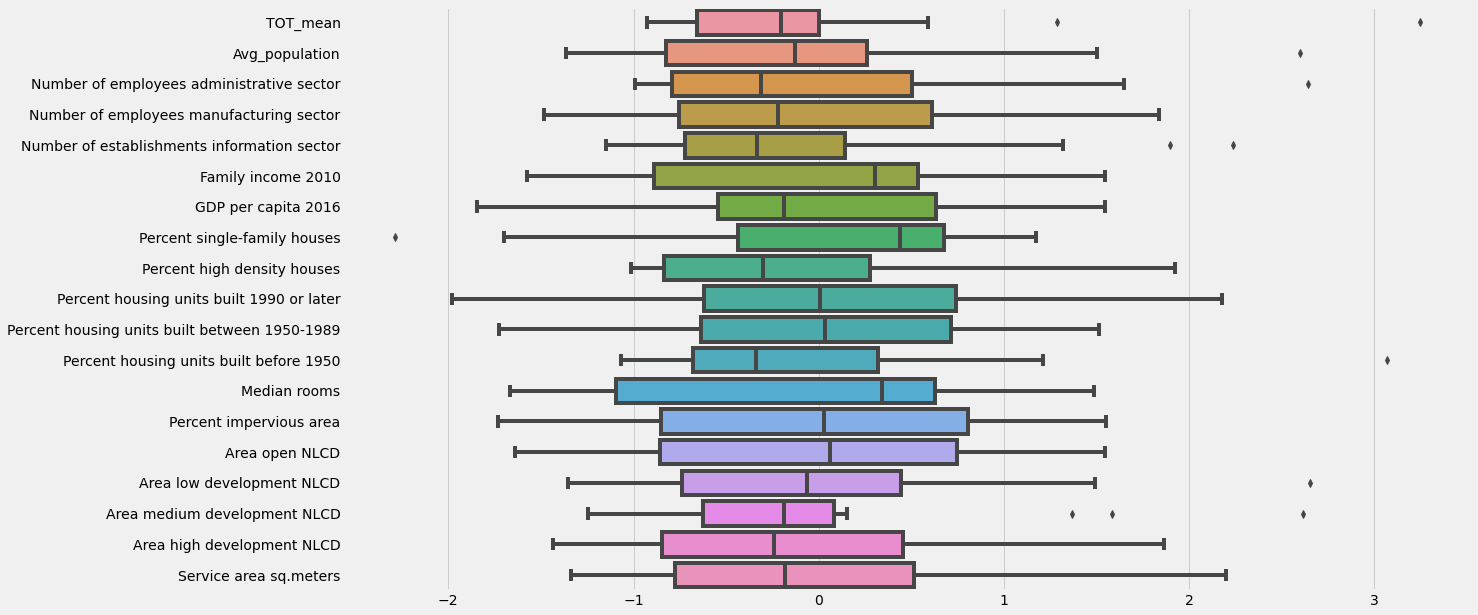

In [172]:
c_scaler2 = StandardScaler()
c_scaled_array2 = c_scaler2.fit_transform(cluster2.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']))
c_scaled_dataframe2 = pd.DataFrame(c_scaled_array2,columns=(cluster2.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']).columns))
plt.figure(figsize = (18,10))
sns.boxplot(data = c_scaled_dataframe2, orient = "h")

In [173]:
X_dist_2 = kmeans_model._transform(c_scaled_dataframe2)

#len(X_dist_2)
dist22=[]
for i in range (len(X_dist_2)):
    #print(X_dist_2[i][1])
    dist22=np.append(dist22,X_dist_2[i][1])
c_scaled_dataframe2['d_centr']=dist22


In [174]:
c_scaled_dataframe2.index=cluster2.index

In [175]:
c_scaled_dataframe2.sort_values(by=['d_centr'],inplace=True)

In [176]:
c_scaled_dataframe2

TOT_mean  Avg_population  \
city                                                                           
Fort Worth, Texas                                  -0.165631       -0.148714   
Louisville/Jefferson County metro government (b... -0.228196        0.160199   
Phoenix, Arizona                                    1.286664        1.500587   
Charlotte, North Carolina                          -0.314859        0.088878   
Memphis, Tennessee                                 -0.023420       -0.103242   
Austin, Texas                                      -0.065523        0.178101   
Tucson, Arizona                                    -0.180550       -0.374074   
Kansas City, Missouri                              -0.654611       -0.817708   
Dallas, Texas                                       0.587553        0.931239   
Wichita, Kansas                                    -0.759692       -0.841498   
Cincinnati, Ohio                                    0.081140        0.503860   
Greensboro, North Carolina                         -0.928743       -1.252529   
Orlando, Florida                                   -0.657724       -0.906113   
El Paso, Texas                                     -0.315049       -0.150825   
Winston-Salem, North Carolina                      -0.909371       -1.364115   
Las Vegas, Nevada                                   3.248013        2.595954   

                                                    Number of employees administrative sector  \
city                                                                                            
Fort Worth, Texas                                                                   -0.008793   
Louisville/Jefferson County metro government (b...                                  -0.629881   
Phoenix, Arizona                                                                     1.650245   
Charlotte, North Carolina                                                            0.944596   
Memphis, Tennessee                                                                   0.477276   
Austin, Texas                                                                        0.581356   
Tucson, Arizona                                                                     -0.483790   
Kansas City, Missouri                                                               -0.785886   
Dallas, Texas                                                                        2.640475   
Wichita, Kansas                                                                     -0.932980   
Cincinnati, Ohio                                                                    -0.945170   
Greensboro, North Carolina                                                          -0.340593   
Orlando, Florida                                                                    -0.089573   
El Paso, Texas                                                                      -0.281339   
Winston-Salem, North Carolina                                                       -0.993816   
Las Vegas, Nevada                                                                   -0.802127   

                                                    Number of employees manufacturing sector  \
city                                                                                           
Fort Worth, Texas                                                                   1.583277   
Louisville/Jefferson County metro government (b...                                  1.161723   
Phoenix, Arizona                                                                    1.491922   
Charlotte, North Carolina                                                           0.045956   
Memphis, Tennessee                                                                 -0.144607   
Austin, Texas                                                                       0.022312   
Tucson, Arizona                                                                    -1.153146   


<AxesSubplot:ylabel='city'>

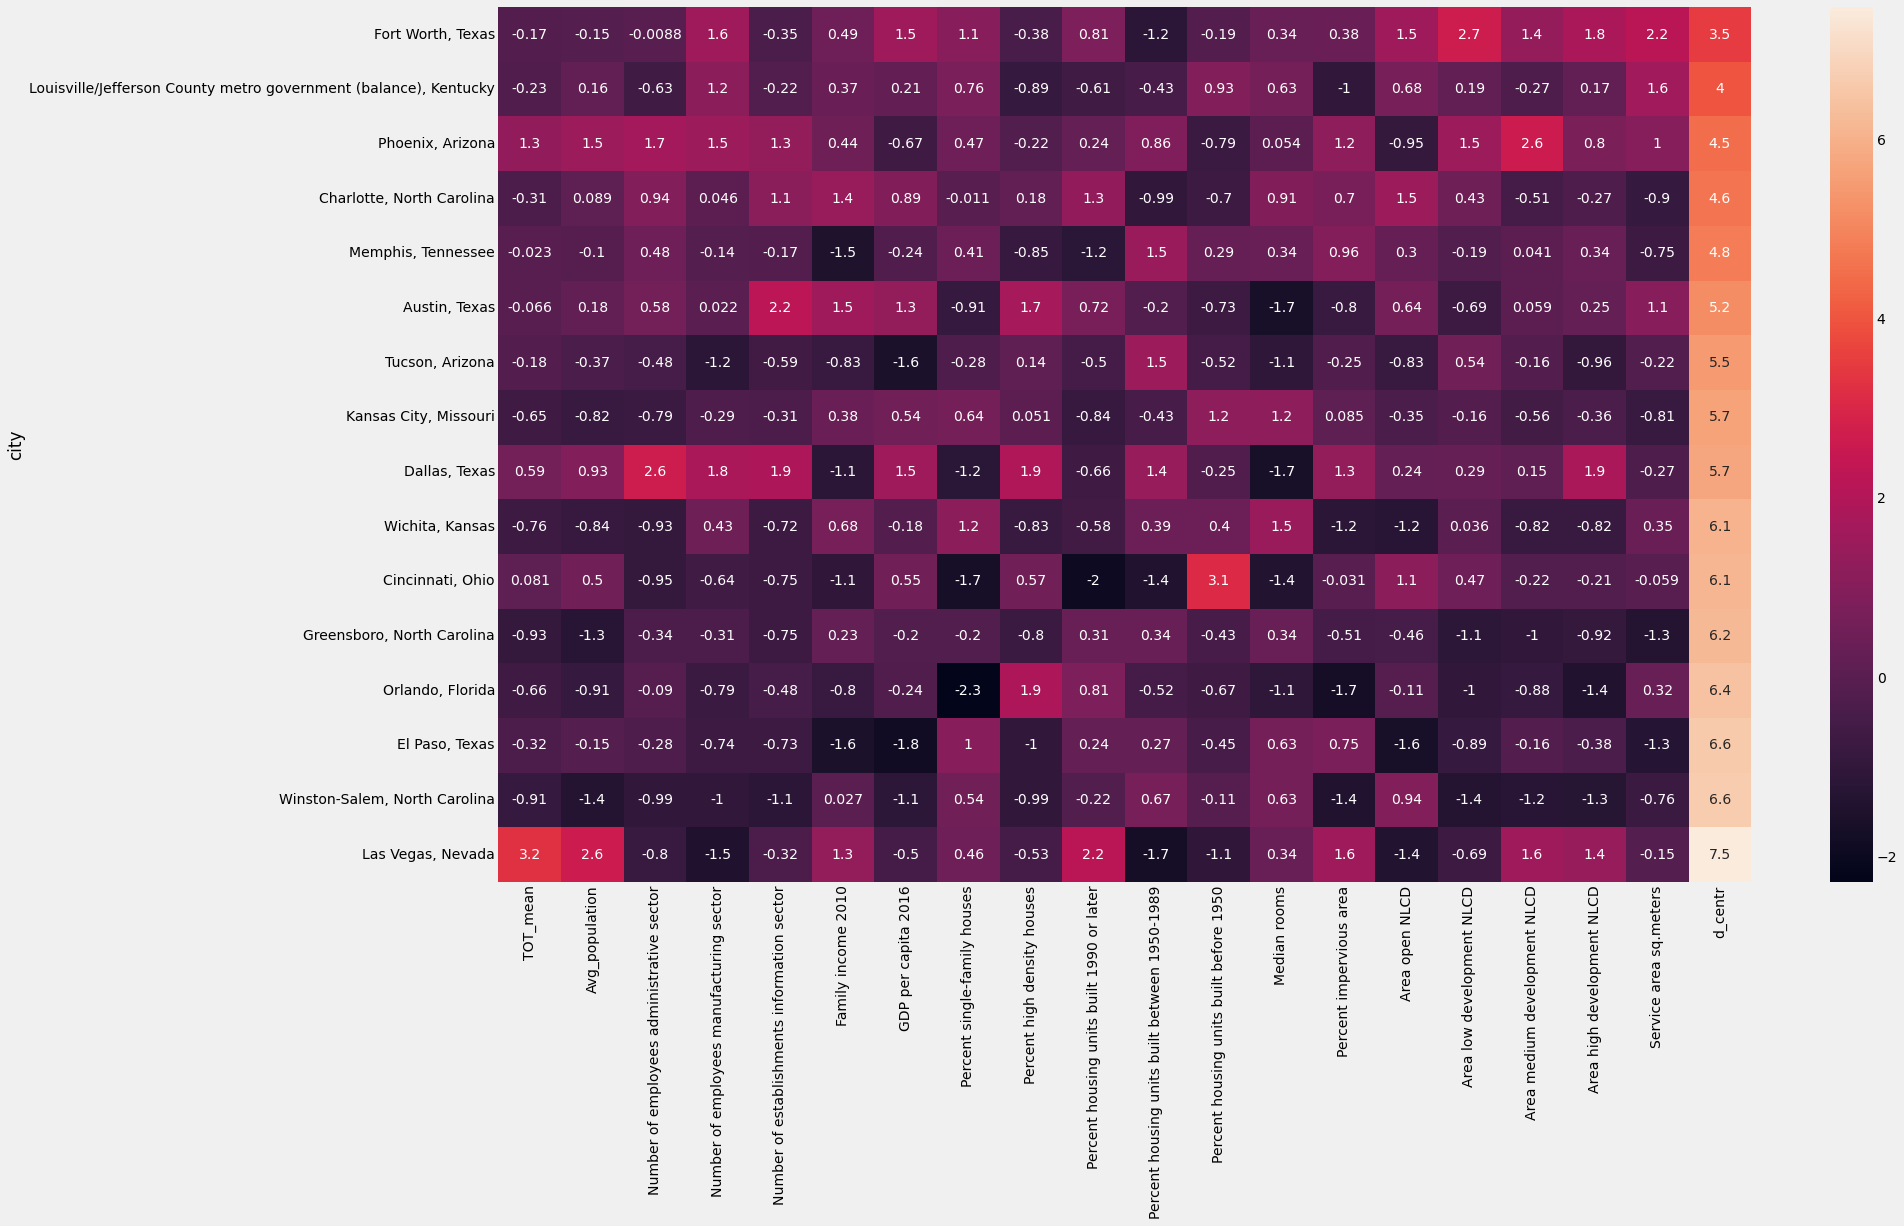

In [177]:
plt.figure(figsize = (25,15))
sns.heatmap(c_scaled_dataframe2,annot=True)

Text(0.5, 0, 'dist_centroide')

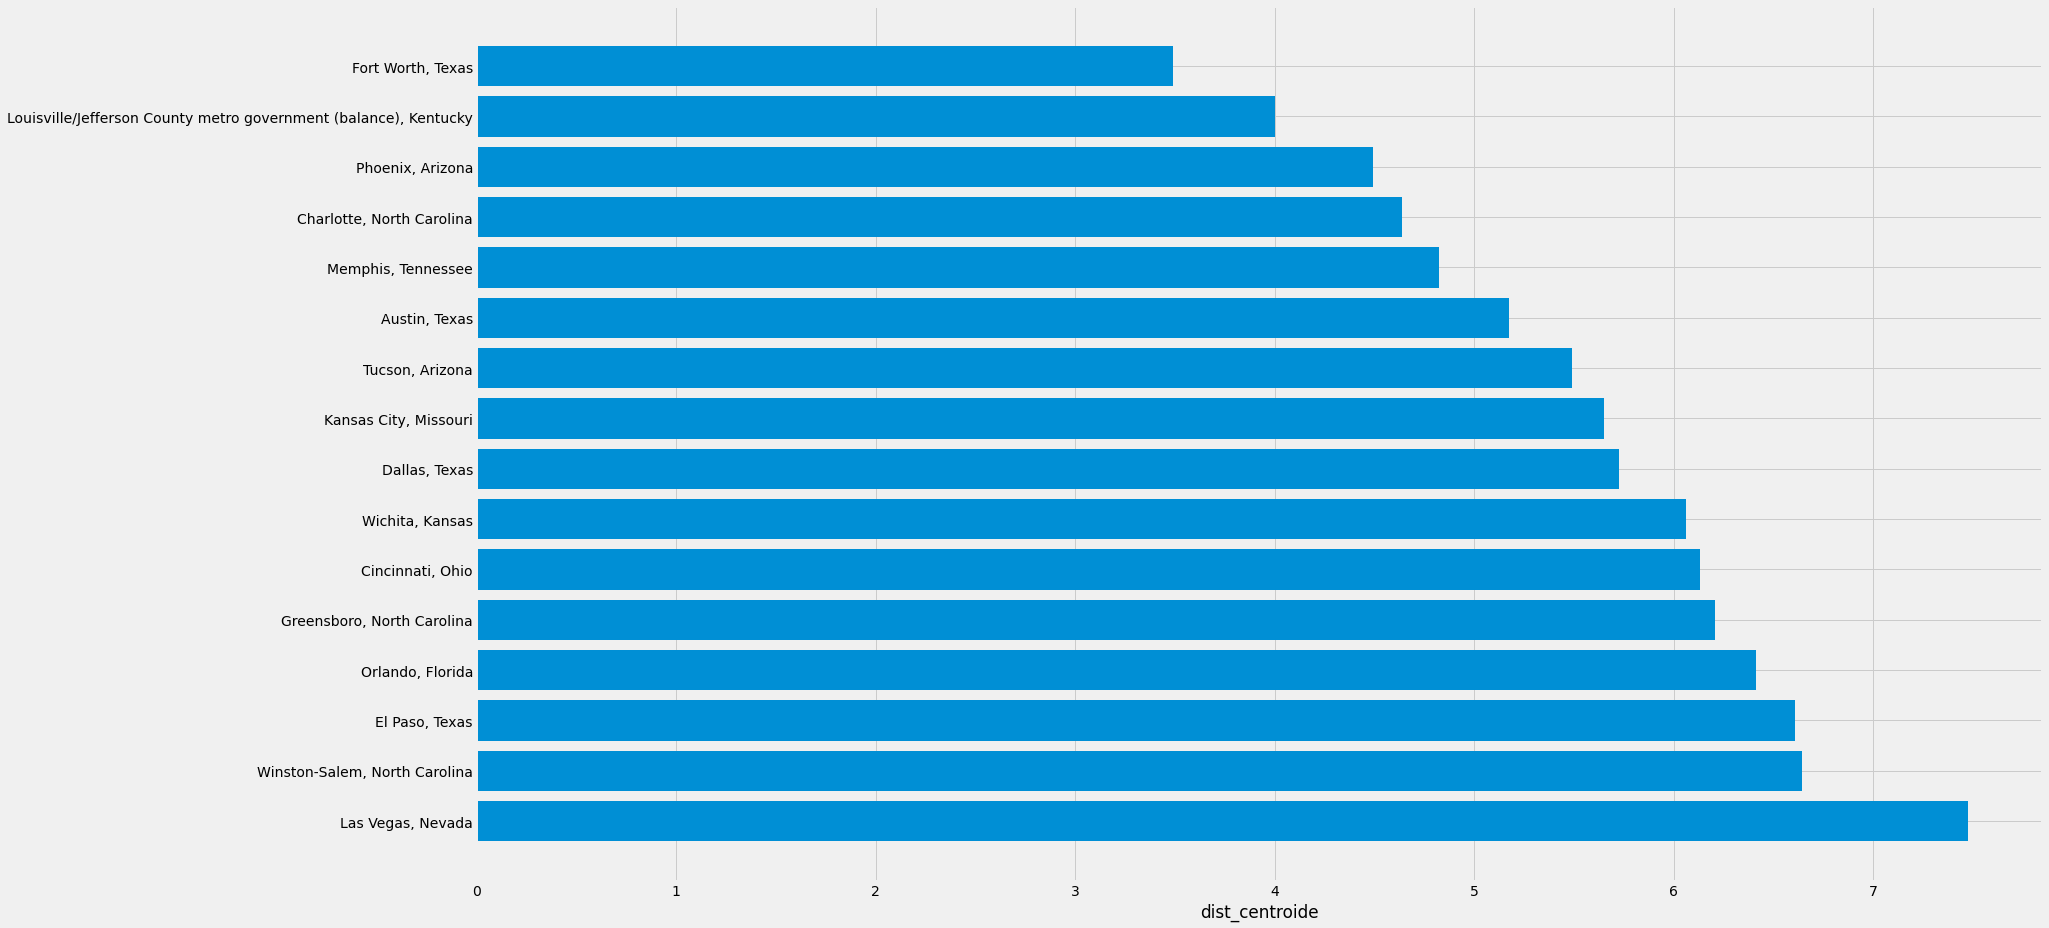

In [178]:
fig, ax = plt.subplots(figsize = (25,15))
ax.barh(c_scaled_dataframe2.index, c_scaled_dataframe2['d_centr'],align='center')
ax.set_yticks(c_scaled_dataframe2.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('dist_centroide')

In [179]:
c2=pd.DataFrame(c_scaled_dataframe2.iloc[:,:-1])
cc2=c_scaled_dataframe2.reset_index()


In [180]:
for i in range(len(cc2)):
    distance=[]
    for j in range(len(cc2)):
        d1=cc2.loc[i,'d_centr']
        d2=cc2.loc[j,'d_centr']
        d=d1-d2
        dm=abs(d)
        distance=np.append(distance,dm)
    c2['d_from_',cc.loc[i,'city']]=distance
    #print(distance,"end\n")

In [181]:
c2

TOT_mean  Avg_population  \
city                                                                           
Fort Worth, Texas                                  -0.165631       -0.148714   
Louisville/Jefferson County metro government (b... -0.228196        0.160199   
Phoenix, Arizona                                    1.286664        1.500587   
Charlotte, North Carolina                          -0.314859        0.088878   
Memphis, Tennessee                                 -0.023420       -0.103242   
Austin, Texas                                      -0.065523        0.178101   
Tucson, Arizona                                    -0.180550       -0.374074   
Kansas City, Missouri                              -0.654611       -0.817708   
Dallas, Texas                                       0.587553        0.931239   
Wichita, Kansas                                    -0.759692       -0.841498   
Cincinnati, Ohio                                    0.081140        0.503860   
Greensboro, North Carolina                         -0.928743       -1.252529   
Orlando, Florida                                   -0.657724       -0.906113   
El Paso, Texas                                     -0.315049       -0.150825   
Winston-Salem, North Carolina                      -0.909371       -1.364115   
Las Vegas, Nevada                                   3.248013        2.595954   

                                                    Number of employees administrative sector  \
city                                                                                            
Fort Worth, Texas                                                                   -0.008793   
Louisville/Jefferson County metro government (b...                                  -0.629881   
Phoenix, Arizona                                                                     1.650245   
Charlotte, North Carolina                                                            0.944596   
Memphis, Tennessee                                                                   0.477276   
Austin, Texas                                                                        0.581356   
Tucson, Arizona                                                                     -0.483790   
Kansas City, Missouri                                                               -0.785886   
Dallas, Texas                                                                        2.640475   
Wichita, Kansas                                                                     -0.932980   
Cincinnati, Ohio                                                                    -0.945170   
Greensboro, North Carolina                                                          -0.340593   
Orlando, Florida                                                                    -0.089573   
El Paso, Texas                                                                      -0.281339   
Winston-Salem, North Carolina                                                       -0.993816   
Las Vegas, Nevada                                                                   -0.802127   

                                                    Number of employees manufacturing sector  \
city                                                                                           
Fort Worth, Texas                                                                   1.583277   
Louisville/Jefferson County metro government (b...                                  1.161723   
Phoenix, Arizona                                                                    1.491922   
Charlotte, North Carolina                                                           0.045956   
Memphis, Tennessee                                                                 -0.144607   
Austin, Texas                                                                       0.022312   
Tucson, Arizona                                                                    -1.153146   


In [182]:
#file_name='/Users/mariaussano/Desktop/scaled_cluster2.txt'
file_object = open(file_name, 'r+')
c2.to_csv(file_name)

NameError: name 'file_name' is not defined

## GCNN for c2

In [184]:
c2.reset_index(inplace=True)

In [192]:
targets2,nodes2,x2,n2,f2,a2=build_graph(c2)

X shape:  (16, 34)

Number of nodes (N):  16

Number of features (F) of each node:  34

Categories:  [-0.9287432655190311, -0.9093710254455417, -0.7596920778723519, -0.6577243253464531, -0.6546105245838832, -0.3150488778099439, -0.31485886290833964, -0.22819578112274758, -0.18055035994130358, -0.16563116732026473, -0.06552314809340812, -0.02341986711486804, 0.0811401931011167, 0.5875526102590108, 1.2866635452399902, 3.2480129344780186]
labels: [-0.16563116732026473, -0.22819578112274758, 1.2866635452399902, -0.31485886290833964, -0.02341986711486804, -0.06552314809340812, -0.18055035994130358, -0.6546105245838832, 0.5875526102590108, -0.7596920778723519, 0.0811401931011167, -0.9287432655190311, -0.6577243253464531, -0.3150488778099439, -0.9093710254455417, 3.2480129344780186]

Number of classes:  16
Shape of A:  (16, 16)

Adjacency Matrix (a):
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)

In [198]:
encoder2 = preprocessing.LabelEncoder() 
labels2 = encoder2.fit_transform(targets2)
print(labels2)
#print(encoder.inverse_transform(labels))
print('targets',targets2)
labels_encoded2=to_categorical(labels2)
print('labels',labels_encoded2)

[ 9  7 14  6 11 10  8  4 13  2 12  0  3  5  1 15]
targets [-0.16563116732026473, -0.22819578112274758, 1.2866635452399902, -0.31485886290833964, -0.02341986711486804, -0.06552314809340812, -0.18055035994130358, -0.6546105245838832, 0.5875526102590108, -0.7596920778723519, 0.0811401931011167, -0.9287432655190311, -0.6577243253464531, -0.3150488778099439, -0.9093710254455417, 3.2480129344780186]
labels [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [200]:
#LOO funzionante
from sklearn.model_selection import LeaveOneOut
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
'''x_train, a_train, x_test, a_test = train_test_split([x,a], train_size=0.8, shuffle=True, random_state=1)
target_train,target_test=train_test_split(labels_encoded, train_size=0.8, shuffle=True, random_state=1)
print('x_train:',x_train)
print('a_train:',a_train)
print('x_test:',x_test)
print('a_test:',a_test)'''
loo=LeaveOneOut()
loo.get_n_splits(c2)
#print('np.random.randint(0,10):',np.random.randint(0,10,size=10))
predictions=[]
for idx_tr, idx_va in loo.split(c2):
    print("idx_tr:", idx_tr)
    print("idx_va:", idx_va)
    #set the mask
    train_mask = np.zeros((n2,),dtype=bool)
    train_mask[idx_tr] = True
    print('train_mask:',train_mask)
    val_mask = np.zeros((n2,),dtype=bool)
    val_mask[idx_va] = True
    print('val_mask:',val_mask)
    # Train model
    validation_data = ([x2,a2],labels_encoded2,val_mask)
    #print('validation_data',validation_data)'''
    history=model.fit(x=[x2, a2], y=labels_encoded2,
                      epochs=epochs,
                      batch_size=n2,
                      validation_data=validation_data,
                      shuffle=False,
                      callbacks=[handmade_callbacks]).history 
    

#report = classification_report(np.argmax(labels_encoded,axis=1), np.argmax(predictions,axis=1))
    
    
#print('predictions',predictions)

idx_tr: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
idx_va: [0]
train_mask: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
val_mask: [ True False False False False False False False False False False False
 False False False False]
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0513 - mae: 0.1048 - root_mean_squared_error: 0.2217
Epoch 1: val_loss did not improve from 0.00370
1/1 [==============================] - 0s 118ms/step - loss: 0.0513 - mae: 0.1048 - root_mean_squared_error: 0.2217 - val_loss: 0.0055 - val_mae: 0.1060 - val_root_mean_squared_error: 0.2216 - lr: 1.0000e-05
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0551 - mae: 0.1097 - root_mean_squared_error: 0.2300
Epoch 2: val_loss did not improve from 0.00370
1/1 [==============================] - 0s 131ms/step - loss: 0.0551 - mae: 0.1097 - root_mean_squared_error: 0.2300 - val_loss: 0.0055 - val_mae: 0.1060 - val_root_mea

In [201]:
y_pred2 = model.predict([x2, a2],batch_size=n2)
print(y_pred2)


1/1 [==============================] - 18s 18s/step
[[0.02632767 0.02613545 0.03254073 0.06185269 0.02239965 0.03335159
  0.0711907  0.06446701 0.04213753 0.2616662  0.0733873  0.04004263
  0.03289175 0.06423145 0.10096666 0.04641107]
 [0.05114071 0.0506492  0.05841358 0.08316724 0.04159721 0.05423992
  0.0619476  0.06565151 0.0525115  0.12184091 0.06412765 0.05704728
  0.05855475 0.04367956 0.06300145 0.07242999]
 [0.01256146 0.01676249 0.0326659  0.02783934 0.01305605 0.03056556
  0.0526998  0.05120886 0.04406541 0.08685684 0.07613768 0.06864845
  0.02319319 0.15944275 0.26818052 0.03611571]
 [0.04137203 0.04710588 0.04802933 0.07306325 0.04279155 0.03628265
  0.10383825 0.05158402 0.04737738 0.08524461 0.09629712 0.04891879
  0.05714072 0.06889503 0.07380202 0.07825734]
 [0.03882065 0.05666184 0.0547589  0.0437131  0.03786134 0.07652292
  0.0434338  0.05540996 0.06576739 0.07099178 0.04583298 0.10845713
  0.05131408 0.1096865  0.08974972 0.0510179 ]
 [0.02911877 0.03615445 0.0382460

In [202]:
pred_lab2=np.argmax(y_pred2, axis=1)
print(pred_lab2)

[ 9  9 14  6 13 10 11 15 13 15 12 15 15 15  1 15]


In [203]:
decoded_labels2=encoder2.inverse_transform(pred_lab2)
print(decoded_labels2)

[-0.16563117 -0.16563117  1.28666355 -0.31485886  0.58755261 -0.06552315
 -0.02341987  3.24801293  0.58755261  3.24801293  0.08114019  3.24801293
  3.24801293  3.24801293 -0.90937103  3.24801293]


In [208]:
predicted2=c_scaled_dataframe2.iloc[:,:-1]

In [209]:
predicted2['TOT_mean']=decoded_labels2

In [217]:
df2=pd.DataFrame(c_scaler2.inverse_transform(predicted2)[:,0])
df2['true_WC']=cluster2['TOT_mean'].values
df2

0       true_WC
0   3.047546e+09  3.331547e+09
1   3.047546e+09  2.624194e+09
2   7.167638e+09  3.747624e+09
3   2.624194e+09  5.184293e+09
4   5.184293e+09  2.623655e+09
5   3.331547e+09  3.047546e+09
6   3.450992e+09  8.826323e+08
7   1.273189e+10  1.660334e+09
8   5.184293e+09  1.273189e+10
9   1.273189e+10  2.870053e+09
10  3.747624e+09  3.450992e+09
11  1.273189e+10  1.651500e+09
12  1.273189e+10  7.167638e+09
13  1.273189e+10  3.005221e+09
14  9.375904e+08  1.362223e+09
15  1.273189e+10  9.375904e+08

In [228]:
p=np.array([-7.76188914e-03,  3.87904258e-03,  3.00872065e-02, -1.43095748e-02,
  -1.11269054e-03, -9.03092697e-03, -3.48511687e-03, -2.12295428e-02,
   1.46568790e-02, -2.84861377e-03,  2.57169213e-02, -2.51252539e-02,
  -4.72135320e-02, -1.79748833e-02, -4.98268269e-02,  1.42208230e+00])  # regresisone con 2 conv_layers

'''[ 7.94563219e-02, -4.59006839e-02,  4.33748849e-02,  1.51849147e-02,
  -3.93501520e-02,  1.12735676e-02, -2.72339005e-02,  6.57572746e-02,
   3.29578891e-02, -5.68392090e-02,  2.08514044e-03, -4.61410694e-02,
  -3.61875929e-02, -1.14711180e-01, -5.86156547e-02,  2.10952729e-01]''' # regressione con 2 conv_layers + dense

'[ 7.94563219e-02, -4.59006839e-02,  4.33748849e-02,  1.51849147e-02,\n  -3.93501520e-02,  1.12735676e-02, -2.72339005e-02,  6.57572746e-02,\n   3.29578891e-02, -5.68392090e-02,  2.08514044e-03, -4.61410694e-02,\n  -3.61875929e-02, -1.14711180e-01, -5.86156547e-02,  2.10952729e-01]'

In [229]:
predicted2['TOT_mean']=p
pp=c_scaler2.inverse_transform(predicted2)[:,0]

In [230]:
df2['regress_pred']=pp

In [231]:
df2

0       true_WC  regress_pred
0   3.047546e+09  3.331547e+09  3.495413e+09
1   3.047546e+09  2.624194e+09  3.528438e+09
2   7.167638e+09  3.747624e+09  3.602790e+09
3   2.624194e+09  5.184293e+09  3.476838e+09
4   5.184293e+09  2.623655e+09  3.514277e+09
5   3.331547e+09  3.047546e+09  3.491813e+09
6   3.450992e+09  8.826323e+08  3.507546e+09
7   1.273189e+10  1.660334e+09  3.457206e+09
8   5.184293e+09  1.273189e+10  3.559014e+09
9   1.273189e+10  2.870053e+09  3.509352e+09
10  3.747624e+09  3.450992e+09  3.590391e+09
11  1.273189e+10  1.651500e+09  3.446154e+09
12  1.273189e+10  7.167638e+09  3.383491e+09
13  1.273189e+10  3.005221e+09  3.466440e+09
14  9.375904e+08  1.362223e+09  3.376077e+09
15  1.273189e+10  9.375904e+08  7.551815e+09

## CLUSTER 3

In [ ]:
cluster3=pd.DataFrame(scaled_dataframe[label==2])
#cluster3.drop(columns='cluster', inplace=True)
cluster3.drop(columns='cluster',inplace=True)
cluster3


RES_mean      CII_mean      TOT_mean  \
city                                                                       
Abilene, Texas                  2.630369e+08  1.921995e+08  4.552364e+08   
Alamogordo, New Mexico          8.806434e+07  1.805562e+07  1.061200e+08   
Altoona, Pennsylvania           9.167244e+07  4.178493e+07  1.334574e+08   
Amarillo, Texas                 1.640924e+09  1.074557e+09  2.715480e+09   
Asheville, North Carolina       2.340519e+08  1.829876e+08  4.170396e+08   
Chillicothe, Missouri           1.326866e+07  1.667482e+07  2.994349e+07   
Dalton, Georgia                 1.939807e+08  4.202170e+08  6.141977e+08   
Farmington, New Mexico          1.328908e+08  1.798010e+08  3.126919e+08   
Fort Smith, Arkansas            1.569619e+08  2.437202e+08  4.006821e+08   
Gainesville, Florida            3.698476e+08  2.379260e+08  6.077736e+08   
Garland, Texas                  5.861440e+08  2.480438e+08  8.341878e+08   
Grand Island, Nebraska          1.545883e+08  1.772967e+08  3.318850e+08   
Hereford, Texas                 4.393900e+07  6.553992e+07  1.094789e+08   
International Falls, Minnesota  7.750809e+06  3.526327e+06  1.127714e+07   
Kenner, Louisiana               9.185665e+08  3.982210e+08  1.316787e+09   
Lafayette, Louisiana            2.357450e+08  2.593151e+08  4.950601e+08   
Lancaster, California           8.802663e+08  3.090283e+08  1.189295e+09   
Lansing, Michigan               1.911659e+08  2.349197e+08  4.260856e+08   
Laredo, Texas                   5.926593e+08  3.123151e+08  9.049744e+08   
Monahans, Texas                 3.210219e+07  7.210243e+06  3.931243e+07   
Plainview, Texas                5.570215e+07  4.090107e+07  9.660323e+07   
Pocatello, Idaho                2.064459e+08  8.411285e+07  2.905588e+08   
Ponca City, Oklahoma            5.788007e+07  1.107907e+08  1.686707e+08   
Poplar Bluff, Missouri          3.120756e+07  2.814772e+07  5.935528e+07   
Pueblo, Colorado                4.174737e+08  2.763762e+08  6.938499e+08   
Rockford, Illinois              3.254842e+08  1.838696e+08  5.093538e+08   
Safford, Arizona                6.490886e+07  3.136368e+07  9.627253e+07   
San Angelo, Texas               2.352999e+08  8.378499e+07  3.190849e+08   
Santa Maria, California         2.254045e+08  1.045405e+08  3.299449e+08   
Sherman, Texas                  9.315941e+07  1.328097e+08  2.259691e+08   
Spokane, Washington             9.801436e+08  4.474446e+08  1.427588e+09   
Springfield, Ohio               9.231814e+07  1.252742e+08  2.175924e+08   
Wichita Falls, Texas            2.112745e+08  2.146086e+08  4.258831e+08   

                                uwd_category        USCensusID  \
city                                                             
Abilene, Texas                             0  1600000US4801000   
Alamogordo, New Mexico                     0  1600000US3501780   
Altoona, Pennsylvania                      0  1600000US4202184   
Amarillo, Texas                            3  1600000US4803000   
Asheville, North Carolina                  0  1600000US3702140   
Chillicothe, Missouri                      2  1600000US2913690   
Dalton, Georgia                            2  1600000US1321380   
Farmington, New Mexico                     2  1600000US3525800   
Fort Smith, Arkansas                       2  1600000US0524550   
Gainesville, Florida                       0  1600000US1225175   
Garland, Texas                             0  1600000US4829000   
Grand Island, Nebraska                     2  1600000US3119595   
Hereford, Texas                            2  1600000US4833320   
International Falls, Minnesota             0  1600000US2731040   
Kenner, Louisiana                          0  1600000US2239475   
Lafayette, Louisiana                       2  1600000US2240735   
Lancaster, California                      0  1600000US0640130   
Lansing, Michigan                          2  1600000US2646000   
Laredo, Texas                              0  1600000US

<AxesSubplot:>

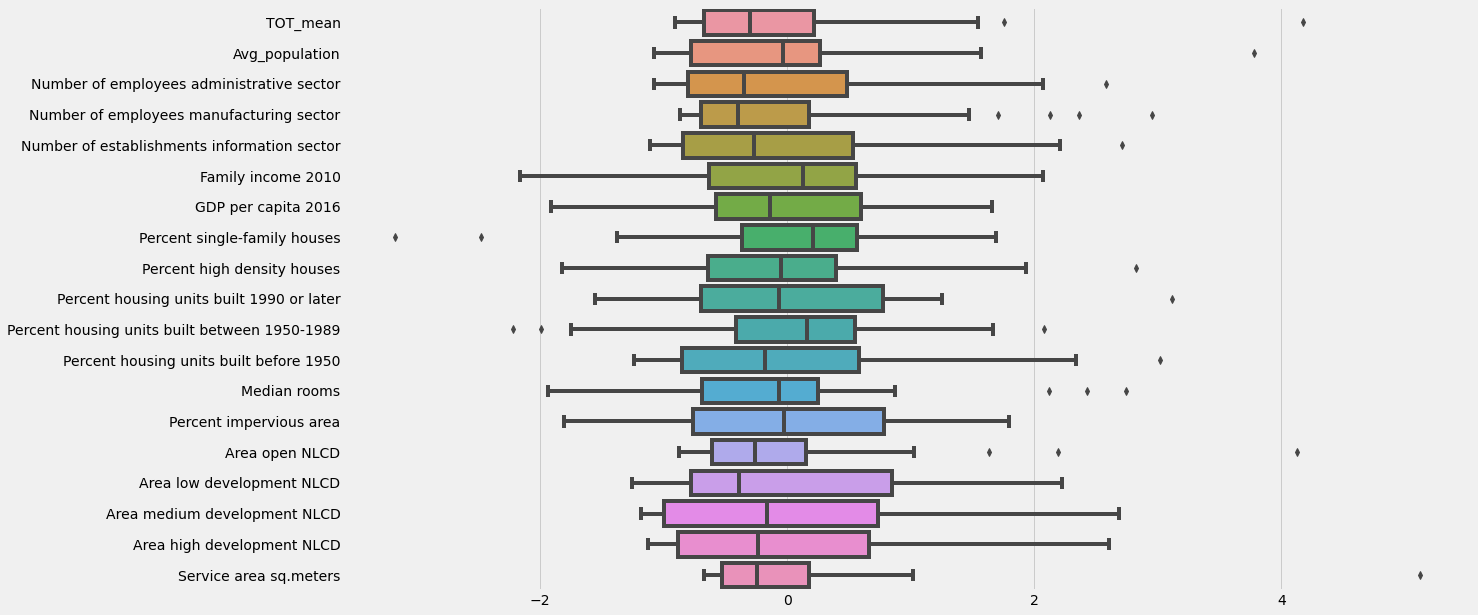

In [ ]:
c_scaler3 = StandardScaler()
c_scaled_array3 = c_scaler3.fit_transform(cluster3.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']))
c_scaled_dataframe3 = pd.DataFrame(c_scaled_array3,columns=(cluster3.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']).columns))
plt.figure(figsize = (18,10))
sns.boxplot(data = c_scaled_dataframe3, orient = "h")

In [ ]:
c_scaled_dataframe3.index=cluster3.index

In [ ]:
c_scaled_dataframe3

TOT_mean  Avg_population  \
city                                                       
Abilene, Texas                 -0.073395        0.246458   
Alamogordo, New Mexico         -0.729442       -0.776291   
Altoona, Pennsylvania          -0.678070       -0.535287   
Amarillo, Texas                 4.173971        1.069218   
Asheville, North Carolina      -0.145173        0.260784   
Chillicothe, Missouri          -0.872590       -1.043917   
Dalton, Georgia                 0.225319       -0.018936   
Farmington, New Mexico         -0.341259       -0.650588   
Fort Smith, Arkansas           -0.175912        0.247045   
Gainesville, Florida            0.213247        0.208848   
Garland, Texas                  0.638716        1.430877   
Grand Island, Nebraska         -0.305192       -0.610497   
Hereford, Texas                -0.723130       -0.976473   
International Falls, Minnesota -0.907667       -1.077121   
Kenner, Louisiana               1.545600        3.778672   
Lafayette, Louisiana            0.001440        0.227028   
Lancaster, California           1.306020        0.747943   
Lansing, Michigan              -0.128174        0.144232   
Laredo, Texas                   0.771736        1.569531   
Monahans, Texas                -0.854984       -1.068003   
Plainview, Texas               -0.747325       -0.903911   
Pocatello, Idaho               -0.382851       -0.533484   
Ponca City, Oklahoma           -0.611899       -0.866627   
Poplar Bluff, Missouri         -0.817320       -0.954743   
Pueblo, Colorado                0.374999        0.065302   
Rockford, Illinois              0.028300        0.572287   
Safford, Arizona               -0.747947       -0.888887   
San Angelo, Texas              -0.329246       -0.075797   
Santa Maria, California        -0.308838       -0.032224   
Sherman, Texas                 -0.504226       -0.711101   
Spokane, Washington             1.753812        1.177182   
Springfield, Ohio              -0.519967       -0.451364   
Wichita Falls, Texas           -0.128555        0.429846   

                                Number of employees administrative sector  \
city                                                                        
Abilene, Texas                                                  -0.356133   
Alamogordo, New Mexico                                          -0.990043   
Altoona, Pennsylvania                                           -0.609276   
Amarillo, Texas                                                  2.065781   
Asheville, North Carolina                                        0.947488   
Chillicothe, Missouri                                           -1.050696   
Dalton, Georgia                                                 -0.160274   
Farmington, New Mexico                                          -0.794605   
Fort Smith, Arkansas                                             2.065781   
Gainesville, Florida                                             0.468160   
Garland, Texas                                                   1.133239   
Grand Island, Nebraska                                          -0.469858   
Hereford, Texas                                                 -1.067965   
International Falls, Minnesota                                  -1.067965   
Kenner, Louisiana                                                0.096238   
Lafayette, Louisiana                                             1.059107   
Lancaster, California                                            0.178794   
Lansing, Michigan                                                0.486272   
Laredo, Texas                                                    1.092382   
Monahans, Texas                                                 -1.067965   
Plainview, Texas                                                -1.006048   
Pocatello, Idaho                                                -0.502290   
Ponca City, Oklahoma                                            -0.803871   
Poplar

In [ ]:
X_dist_3 = kmeans_model._transform(c_scaled_dataframe3)

dist33=[]
for i in range (len(X_dist_3)):
    #print(X_dist_2[i][1])
    dist33=np.append(dist33,X_dist_3[i][2])
c_scaled_dataframe3['d_centr']=dist33

In [ ]:
c_scaled_dataframe3.sort_values(by=['d_centr'],inplace=True)


In [ ]:
c_scaled_dataframe3

TOT_mean  Avg_population  \
city                                                       
Sherman, Texas                 -0.504226       -0.711101   
Poplar Bluff, Missouri         -0.817320       -0.954743   
Chillicothe, Missouri          -0.872590       -1.043917   
Ponca City, Oklahoma           -0.611899       -0.866627   
Abilene, Texas                 -0.073395        0.246458   
Grand Island, Nebraska         -0.305192       -0.610497   
San Angelo, Texas              -0.329246       -0.075797   
Pocatello, Idaho               -0.382851       -0.533484   
Safford, Arizona               -0.747947       -0.888887   
Pueblo, Colorado                0.374999        0.065302   
Plainview, Texas               -0.747325       -0.903911   
Hereford, Texas                -0.723130       -0.976473   
Santa Maria, California        -0.308838       -0.032224   
Alamogordo, New Mexico         -0.729442       -0.776291   
Farmington, New Mexico         -0.341259       -0.650588   
Springfield, Ohio              -0.519967       -0.451364   
Monahans, Texas                -0.854984       -1.068003   
Lansing, Michigan              -0.128174        0.144232   
International Falls, Minnesota -0.907667       -1.077121   
Fort Smith, Arkansas           -0.175912        0.247045   
Lancaster, California           1.306020        0.747943   
Dalton, Georgia                 0.225319       -0.018936   
Altoona, Pennsylvania          -0.678070       -0.535287   
Lafayette, Louisiana            0.001440        0.227028   
Garland, Texas                  0.638716        1.430877   
Rockford, Illinois              0.028300        0.572287   
Kenner, Louisiana               1.545600        3.778672   
Spokane, Washington             1.753812        1.177182   
Gainesville, Florida            0.213247        0.208848   
Asheville, North Carolina      -0.145173        0.260784   
Wichita Falls, Texas           -0.128555        0.429846   
Amarillo, Texas                 4.173971        1.069218   
Laredo, Texas                   0.771736        1.569531   

                                Number of employees administrative sector  \
city                                                                        
Sherman, Texas                                                  -0.193128   
Poplar Bluff, Missouri                                          -0.935286   
Chillicothe, Missouri                                           -1.050696   
Ponca City, Oklahoma                                            -0.803871   
Abilene, Texas                                                  -0.356133   
Grand Island, Nebraska                                          -0.469858   
San Angelo, Texas                                               -0.356133   
Pocatello, Idaho                                                -0.502290   
Safford, Arizona                                                -1.079337   
Pueblo, Colorado                                                 0.203224   
Plainview, Texas                                                -1.006048   
Hereford, Texas                                                 -1.067965   
Santa Maria, California                                         -0.352342   
Alamogordo, New Mexico                                          -0.990043   
Farmington, New Mexico                                          -0.794605   
Springfield, Ohio                                               -0.346024   
Monahans, Texas                                                 -1.067965   
Lansing, Michigan                                                0.486272   
International Falls, Minnesota                                  -1.067965   
Fort Smith, Arkansas                                             2.065781   
Lancaster, California                                            0.178794   
Dalton, Georgia                                                 -0.160274   
Altoona, Pennsylvania                                           -0.609276   
Lafaye

<AxesSubplot:ylabel='city'>

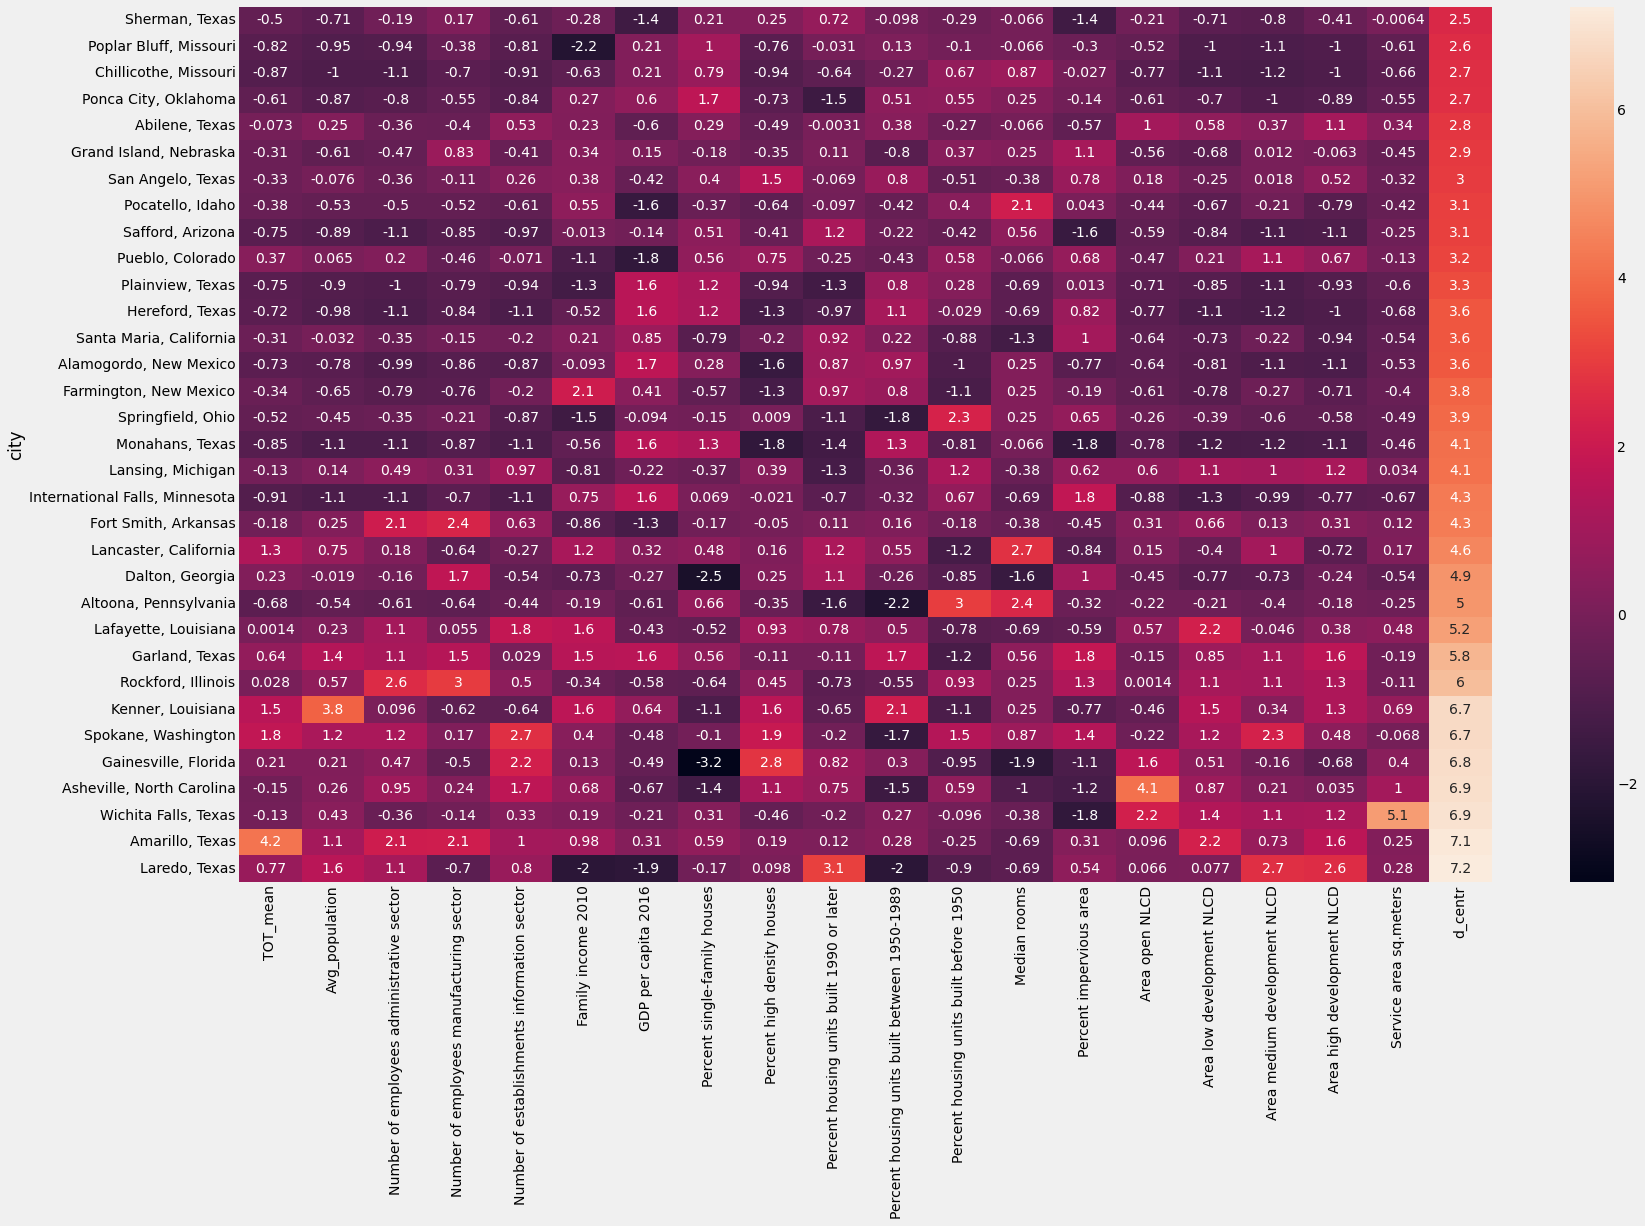

In [ ]:
plt.figure(figsize = (25,15))
sns.heatmap(c_scaled_dataframe3,annot=True)

Text(0.5, 0, 'dist_centroide')

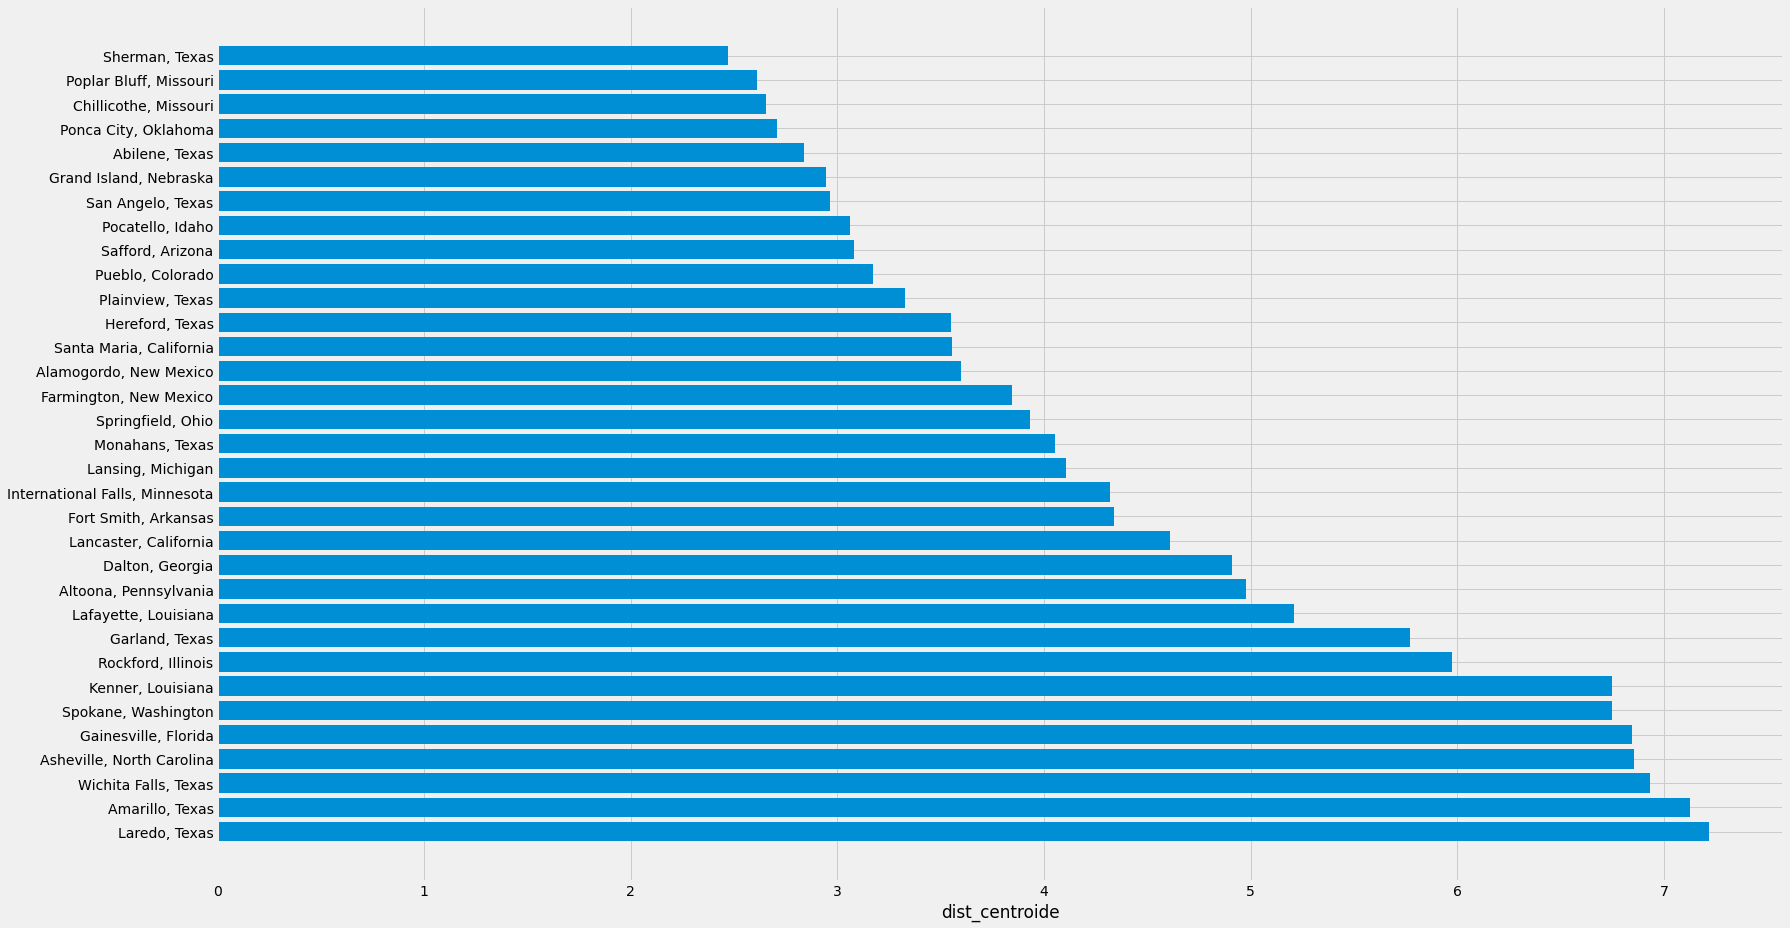

In [ ]:
fig, ax = plt.subplots(figsize = (25,15))
ax.barh(c_scaled_dataframe3.index, c_scaled_dataframe3['d_centr'],align='center')
ax.set_yticks(c_scaled_dataframe3.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('dist_centroide')

## CLUSTER 4

In [ ]:
cluster4=pd.DataFrame(scaled_dataframe[label==3])
cluster4.drop(columns='cluster', inplace=True)
#cluster4.drop(columns='cluster', inplace=True)
#Abilene è riga 0
#CII.RES è colonna 0

<AxesSubplot:>

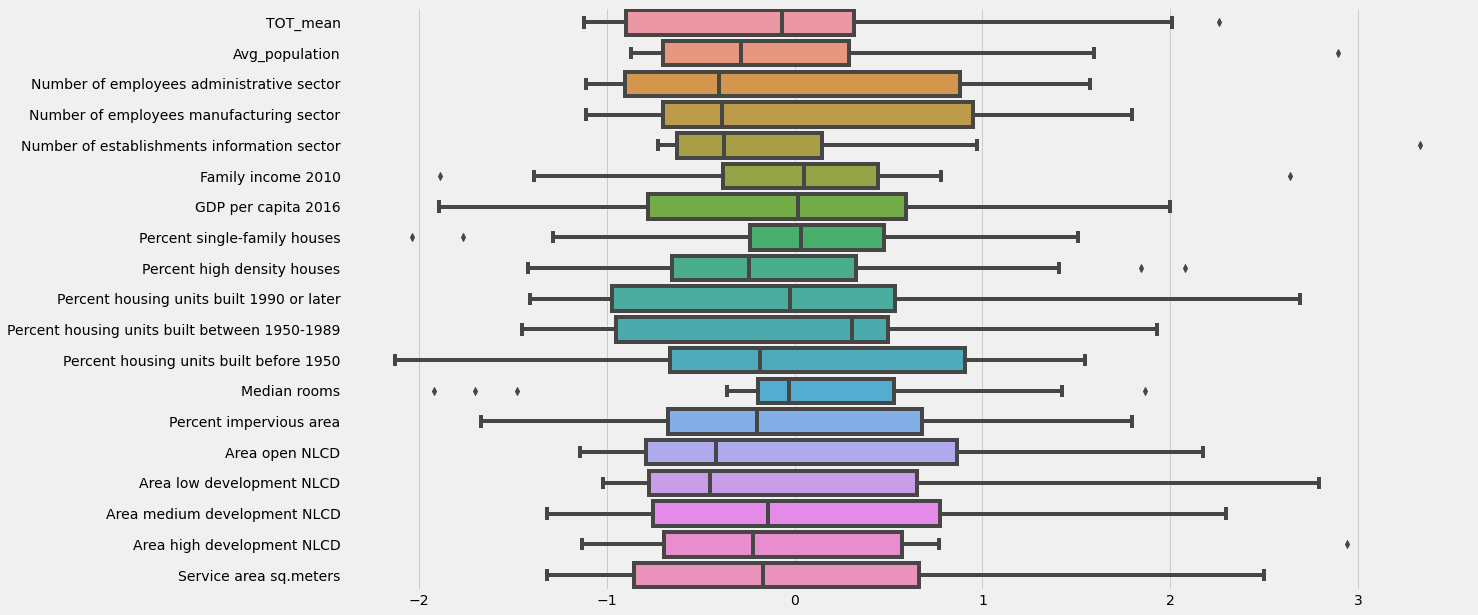

In [ ]:
c_scaler4 = StandardScaler()
c_scaled_array4 = c_scaler4.fit_transform(cluster4.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']))
c_scaled_dataframe4 = pd.DataFrame(c_scaled_array4,columns=(cluster4.drop(columns=['RES_mean','CII_mean','uwd_category','USCensusID','US_census_region','CII.RES']).columns))
plt.figure(figsize = (18,10))
sns.boxplot(data = c_scaled_dataframe4, orient = "h")

In [ ]:
c_scaled_dataframe4.index=cluster4.index

In [ ]:
c_scaled_dataframe4

TOT_mean  Avg_population  \
city                                                   
Bangor, Maine              -1.109890       -0.864931   
Boston, Massachusetts       0.264430        0.795511   
Des Moines, Iowa           -0.154956       -0.163754   
Grand Forks, North Dakota  -1.016375       -0.830152   
La Crosse, Wisconsin       -0.967951       -0.833198   
Long Beach, California      0.061147       -0.148216   
Manchester, New Hampshire  -0.875688       -0.659578   
Milwaukee, Wisconsin        0.222025        0.495016   
Omaha, Nebraska             0.832670       -0.193768   
Philadelphia, Pennsylvania  2.260045        1.593251   
Portland, Maine            -0.745319       -0.658986   
Rochester, New York        -0.113194        0.222612   
Salt Lake City, Utah        0.479794       -0.376712   
San Francisco, California   2.007159        2.895176   
Tacoma, Washington         -0.023405       -0.397697   
Watertown, New York        -1.120492       -0.874575   

                            Number of employees administrative sector  \
city                                                                    
Bangor, Maine                                               -1.068812   
Boston, Massachusetts                                        1.496522   
Des Moines, Iowa                                            -0.586519   
Grand Forks, North Dakota                                   -1.089575   
La Crosse, Wisconsin                                        -1.005668   
Long Beach, California                                      -0.254608   
Manchester, New Hampshire                                    0.362959   
Milwaukee, Wisconsin                                         1.018258   
Omaha, Nebraska                                              1.512173   
Philadelphia, Pennsylvania                                   0.835103   
Portland, Maine                                             -0.870781   
Rochester, New York                                         -0.554986   
Salt Lake City, Utah                                         0.592136   
San Francisco, California                                    1.575394   
Tacoma, Washington                                          -0.847848   
Watertown, New York                                         -1.113748   

                            Number of employees manufacturing sector  \
city                                                                   
Bangor, Maine                                              -1.113654   
Boston, Massachusetts                                      -0.348658   
Des Moines, Iowa                                           -0.454200   
Grand Forks, North Dakota                                  -0.960407   
La Crosse, Wisconsin                                       -0.632782   
Long Beach, California                                     -0.217410   
Manchester, New Hampshire                                  -0.569877   
Milwaukee, Wisconsin                                        1.605725   
Omaha, Nebraska                                             0.876570   
Philadelphia, Pennsylvania                                  1.578413   
Portland, Maine                                            -0.909737   
Rochester, New York                                         1.165513   
Salt Lake City, Utah                                        1.795676   
San Francisco, California                                  -0.281798   
Tacoma, Washington                                         -0.425034   
Watertown, New York                                        -1.108339   

                            Number of establishments information sector  \
city                                                                      
Bangor, Maine                                                 -0.671356   
Boston, Massachusetts                                          0.973572   
Des Moines, Iowa                                              -0.401339   
Grand Forks, North Dakota       

In [ ]:
c_scaled_dataframe4.iloc[:,1:]

Avg_population  \
city                                         
Bangor, Maine                    -0.864931   
Boston, Massachusetts             0.795511   
Des Moines, Iowa                 -0.163754   
Grand Forks, North Dakota        -0.830152   
La Crosse, Wisconsin             -0.833198   
Long Beach, California           -0.148216   
Manchester, New Hampshire        -0.659578   
Milwaukee, Wisconsin              0.495016   
Omaha, Nebraska                  -0.193768   
Philadelphia, Pennsylvania        1.593251   
Portland, Maine                  -0.658986   
Rochester, New York               0.222612   
Salt Lake City, Utah             -0.376712   
San Francisco, California         2.895176   
Tacoma, Washington               -0.397697   
Watertown, New York              -0.874575   

                            Number of employees administrative sector  \
city                                                                    
Bangor, Maine                                               -1.068812   
Boston, Massachusetts                                        1.496522   
Des Moines, Iowa                                            -0.586519   
Grand Forks, North Dakota                                   -1.089575   
La Crosse, Wisconsin                                        -1.005668   
Long Beach, California                                      -0.254608   
Manchester, New Hampshire                                    0.362959   
Milwaukee, Wisconsin                                         1.018258   
Omaha, Nebraska                                              1.512173   
Philadelphia, Pennsylvania                                   0.835103   
Portland, Maine                                             -0.870781   
Rochester, New York                                         -0.554986   
Salt Lake City, Utah                                         0.592136   
San Francisco, California                                    1.575394   
Tacoma, Washington                                          -0.847848   
Watertown, New York                                         -1.113748   

                            Number of employees manufacturing sector  \
city                                                                   
Bangor, Maine                                              -1.113654   
Boston, Massachusetts                                      -0.348658   
Des Moines, Iowa                                           -0.454200   
Grand Forks, North Dakota                                  -0.960407   
La Crosse, Wisconsin                                       -0.632782   
Long Beach, California                                     -0.217410   
Manchester, New Hampshire                                  -0.569877   
Milwaukee, Wisconsin                                        1.605725   
Omaha, Nebraska                                             0.876570   
Philadelphia, Pennsylvania                                  1.578413   
Portland, Maine                                            -0.909737   
Rochester, New York                                         1.165513   
Salt Lake City, Utah                                        1.795676   
San Francisco, California                                  -0.281798   
Tacoma, Washington                                         -0.425034   
Watertown, New York                                        -1.108339   

                            Number of establishments information sector  \
city                                                                      
Bangor, Maine                                                 -0.671356   
Boston, Massachusetts                                          0.973572   
Des Moines, Iowa                                              -0.401339   
Grand Forks, North Dakota                                     -0.724118   
La Crosse, Wisconsin                                          -0.686874   
Long Beach, California                                        

In [ ]:
X_dist_4 = kmeans_model._transform(c_scaled_dataframe4)
#print(X_dist_4)

In [ ]:
dist44=[]
for i in range (len(X_dist_4)):
    #print(X_dist_4[i][3])
    dist44=np.append(dist44,X_dist_4[i][3])
c_scaled_dataframe4['d_centr']=dist44

In [ ]:
c_scaled_dataframe4

TOT_mean  Avg_population  \
city                                                   
Bangor, Maine              -1.109890       -0.864931   
Boston, Massachusetts       0.264430        0.795511   
Des Moines, Iowa           -0.154956       -0.163754   
Grand Forks, North Dakota  -1.016375       -0.830152   
La Crosse, Wisconsin       -0.967951       -0.833198   
Long Beach, California      0.061147       -0.148216   
Manchester, New Hampshire  -0.875688       -0.659578   
Milwaukee, Wisconsin        0.222025        0.495016   
Omaha, Nebraska             0.832670       -0.193768   
Philadelphia, Pennsylvania  2.260045        1.593251   
Portland, Maine            -0.745319       -0.658986   
Rochester, New York        -0.113194        0.222612   
Salt Lake City, Utah        0.479794       -0.376712   
San Francisco, California   2.007159        2.895176   
Tacoma, Washington         -0.023405       -0.397697   
Watertown, New York        -1.120492       -0.874575   

                            Number of employees administrative sector  \
city                                                                    
Bangor, Maine                                               -1.068812   
Boston, Massachusetts                                        1.496522   
Des Moines, Iowa                                            -0.586519   
Grand Forks, North Dakota                                   -1.089575   
La Crosse, Wisconsin                                        -1.005668   
Long Beach, California                                      -0.254608   
Manchester, New Hampshire                                    0.362959   
Milwaukee, Wisconsin                                         1.018258   
Omaha, Nebraska                                              1.512173   
Philadelphia, Pennsylvania                                   0.835103   
Portland, Maine                                             -0.870781   
Rochester, New York                                         -0.554986   
Salt Lake City, Utah                                         0.592136   
San Francisco, California                                    1.575394   
Tacoma, Washington                                          -0.847848   
Watertown, New York                                         -1.113748   

                            Number of employees manufacturing sector  \
city                                                                   
Bangor, Maine                                              -1.113654   
Boston, Massachusetts                                      -0.348658   
Des Moines, Iowa                                           -0.454200   
Grand Forks, North Dakota                                  -0.960407   
La Crosse, Wisconsin                                       -0.632782   
Long Beach, California                                     -0.217410   
Manchester, New Hampshire                                  -0.569877   
Milwaukee, Wisconsin                                        1.605725   
Omaha, Nebraska                                             0.876570   
Philadelphia, Pennsylvania                                  1.578413   
Portland, Maine                                            -0.909737   
Rochester, New York                                         1.165513   
Salt Lake City, Utah                                        1.795676   
San Francisco, California                                  -0.281798   
Tacoma, Washington                                         -0.425034   
Watertown, New York                                        -1.108339   

                            Number of establishments information sector  \
city                                                                      
Bangor, Maine                                                 -0.671356   
Boston, Massachusetts                                          0.973572   
Des Moines, Iowa                                              -0.401339   
Grand Forks, North Dakota       

<AxesSubplot:ylabel='city'>

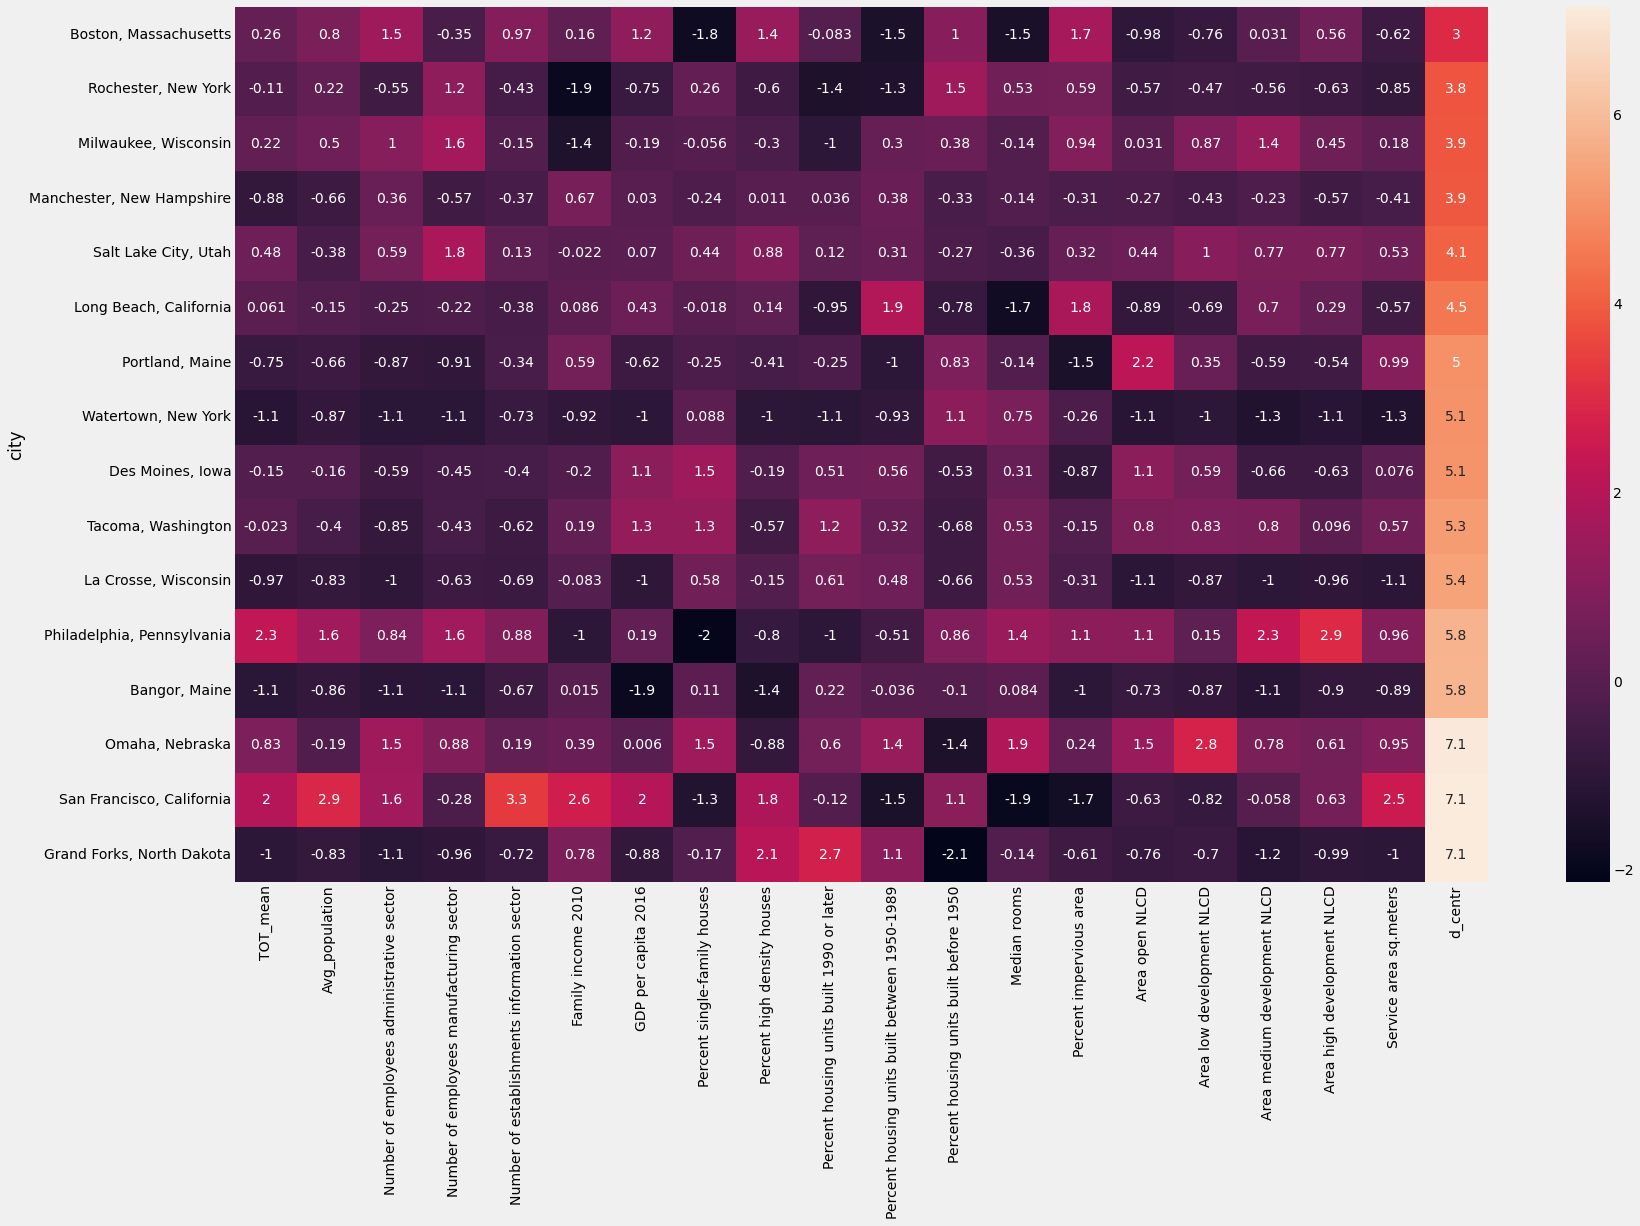

In [ ]:
c_scaled_dataframe4.sort_values(by=['d_centr'],inplace=True)

plt.figure(figsize = (25,15))
sns.heatmap(c_scaled_dataframe4,annot=True)

Text(0.5, 0, 'dist_centroide')

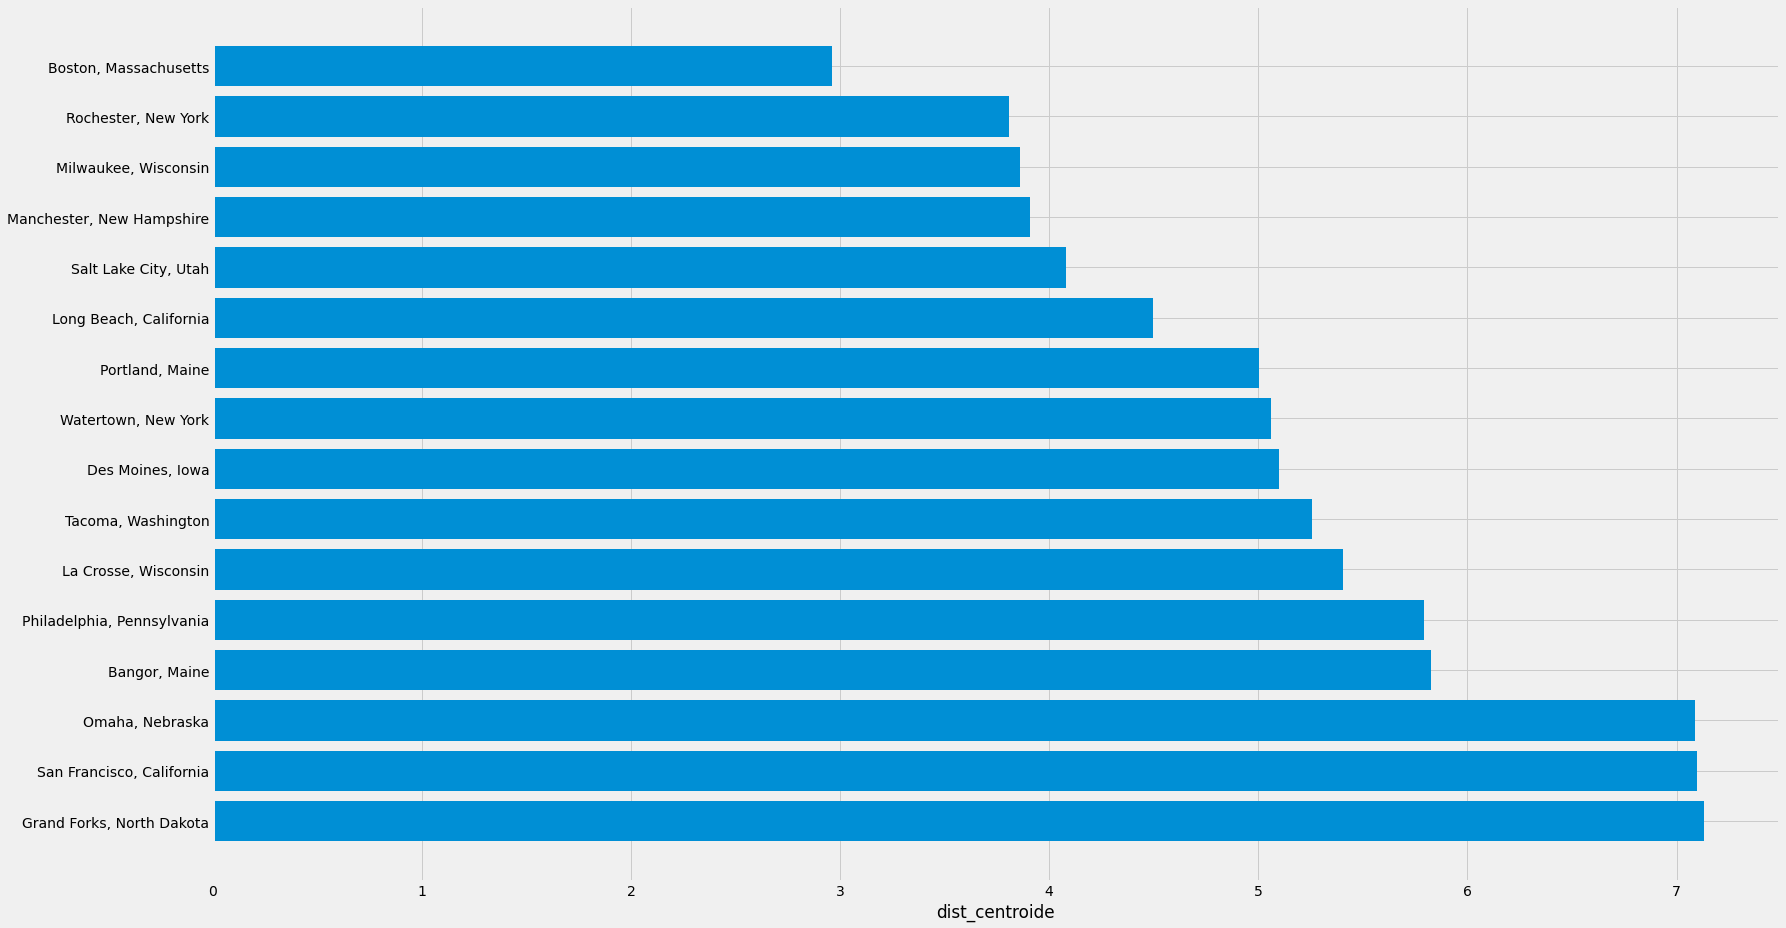

In [ ]:
fig, ax = plt.subplots(figsize = (25,15))
ax.barh(c_scaled_dataframe4.index, c_scaled_dataframe4['d_centr'],align='center')
ax.set_yticks(c_scaled_dataframe4.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('dist_centroide')

In [ ]:
c_scaled_dataframe4.iloc[:,:-1]

TOT_mean  Avg_population  \
city                                                   
Boston, Massachusetts       0.264430        0.795511   
Rochester, New York        -0.113194        0.222612   
Milwaukee, Wisconsin        0.222025        0.495016   
Manchester, New Hampshire  -0.875688       -0.659578   
Salt Lake City, Utah        0.479794       -0.376712   
Long Beach, California      0.061147       -0.148216   
Portland, Maine            -0.745319       -0.658986   
Watertown, New York        -1.120492       -0.874575   
Des Moines, Iowa           -0.154956       -0.163754   
Tacoma, Washington         -0.023405       -0.397697   
La Crosse, Wisconsin       -0.967951       -0.833198   
Philadelphia, Pennsylvania  2.260045        1.593251   
Bangor, Maine              -1.109890       -0.864931   
Omaha, Nebraska             0.832670       -0.193768   
San Francisco, California   2.007159        2.895176   
Grand Forks, North Dakota  -1.016375       -0.830152   

                            Number of employees administrative sector  \
city                                                                    
Boston, Massachusetts                                        1.496522   
Rochester, New York                                         -0.554986   
Milwaukee, Wisconsin                                         1.018258   
Manchester, New Hampshire                                    0.362959   
Salt Lake City, Utah                                         0.592136   
Long Beach, California                                      -0.254608   
Portland, Maine                                             -0.870781   
Watertown, New York                                         -1.113748   
Des Moines, Iowa                                            -0.586519   
Tacoma, Washington                                          -0.847848   
La Crosse, Wisconsin                                        -1.005668   
Philadelphia, Pennsylvania                                   0.835103   
Bangor, Maine                                               -1.068812   
Omaha, Nebraska                                              1.512173   
San Francisco, California                                    1.575394   
Grand Forks, North Dakota                                   -1.089575   

                            Number of employees manufacturing sector  \
city                                                                   
Boston, Massachusetts                                      -0.348658   
Rochester, New York                                         1.165513   
Milwaukee, Wisconsin                                        1.605725   
Manchester, New Hampshire                                  -0.569877   
Salt Lake City, Utah                                        1.795676   
Long Beach, California                                     -0.217410   
Portland, Maine                                            -0.909737   
Watertown, New York                                        -1.108339   
Des Moines, Iowa                                           -0.454200   
Tacoma, Washington                                         -0.425034   
La Crosse, Wisconsin                                       -0.632782   
Philadelphia, Pennsylvania                                  1.578413   
Bangor, Maine                                              -1.113654   
Omaha, Nebraska                                             0.876570   
San Francisco, California                                  -0.281798   
Grand Forks, North Dakota                                  -0.960407   

                            Number of establishments information sector  \
city                                                                      
Boston, Massachusetts                                          0.973572   
Rochester, New York                                           -0.432376   
Milwaukee, Wisconsin                                          -0.153048   
Manchester, New Hampshire       

In [ ]:
c4=pd.DataFrame(c_scaled_dataframe4.iloc[:,:-1])
cc4=c_scaled_dataframe4.reset_index()

for i in range(len(cc4)):
    distance=[]
    for j in range(len(cc4)):
        d1=cc4.loc[i,'d_centr']
        d2=cc4.loc[j,'d_centr']
        d=d1-d2
        dm=abs(d)
        distance=np.append(distance,dm)
    c4['d_from_',cc4.loc[i,'city']]=distance
    #print(distance,"end\n")

c4

TOT_mean  Avg_population  \
city                                                   
Boston, Massachusetts       0.264430        0.795511   
Rochester, New York        -0.113194        0.222612   
Milwaukee, Wisconsin        0.222025        0.495016   
Manchester, New Hampshire  -0.875688       -0.659578   
Salt Lake City, Utah        0.479794       -0.376712   
Long Beach, California      0.061147       -0.148216   
Portland, Maine            -0.745319       -0.658986   
Watertown, New York        -1.120492       -0.874575   
Des Moines, Iowa           -0.154956       -0.163754   
Tacoma, Washington         -0.023405       -0.397697   
La Crosse, Wisconsin       -0.967951       -0.833198   
Philadelphia, Pennsylvania  2.260045        1.593251   
Bangor, Maine              -1.109890       -0.864931   
Omaha, Nebraska             0.832670       -0.193768   
San Francisco, California   2.007159        2.895176   
Grand Forks, North Dakota  -1.016375       -0.830152   

                            Number of employees administrative sector  \
city                                                                    
Boston, Massachusetts                                        1.496522   
Rochester, New York                                         -0.554986   
Milwaukee, Wisconsin                                         1.018258   
Manchester, New Hampshire                                    0.362959   
Salt Lake City, Utah                                         0.592136   
Long Beach, California                                      -0.254608   
Portland, Maine                                             -0.870781   
Watertown, New York                                         -1.113748   
Des Moines, Iowa                                            -0.586519   
Tacoma, Washington                                          -0.847848   
La Crosse, Wisconsin                                        -1.005668   
Philadelphia, Pennsylvania                                   0.835103   
Bangor, Maine                                               -1.068812   
Omaha, Nebraska                                              1.512173   
San Francisco, California                                    1.575394   
Grand Forks, North Dakota                                   -1.089575   

                            Number of employees manufacturing sector  \
city                                                                   
Boston, Massachusetts                                      -0.348658   
Rochester, New York                                         1.165513   
Milwaukee, Wisconsin                                        1.605725   
Manchester, New Hampshire                                  -0.569877   
Salt Lake City, Utah                                        1.795676   
Long Beach, California                                     -0.217410   
Portland, Maine                                            -0.909737   
Watertown, New York                                        -1.108339   
Des Moines, Iowa                                           -0.454200   
Tacoma, Washington                                         -0.425034   
La Crosse, Wisconsin                                       -0.632782   
Philadelphia, Pennsylvania                                  1.578413   
Bangor, Maine                                              -1.113654   
Omaha, Nebraska                                             0.876570   
San Francisco, California                                  -0.281798   
Grand Forks, North Dakota                                  -0.960407   

                            Number of establishments information sector  \
city                                                                      
Boston, Massachusetts                                          0.973572   
Rochester, New York                                           -0.432376   
Milwaukee, Wisconsin                                          -0.153048   
Manchester, New Hampshire       

In [ ]:
#file_name='/Users/mariaussano/Desktop/scaled_cluster4.txt'
file_object = open(file_name, 'r+')
c4.to_csv(file_name)

NameError: name 'file_name' is not defined

## GCNN for cluster4

In [ ]:
c4.reset_index(inplace=True)

In [ ]:
targets,nodes,x,n,f,a=build_graph(c4)

X shape:  (16, 34)

Number of nodes (N):  16

Number of features (F) of each node:  34

Categories:  [-1.120491711783869, -1.109889920872829, -1.016375279781519, -0.9679507289298341, -0.8756880962435769, -0.745318909607009, -0.15495626689935132, -0.11319416500643384, -0.02340548097986462, 0.061146720214133456, 0.22202468640529888, 0.26442978406852835, 0.4797944079872109, 0.8326701739128662, 2.0071594618698563, 2.260045325646394]
labels: [0.26442978406852835, -0.11319416500643384, 0.22202468640529888, -0.8756880962435769, 0.4797944079872109, 0.061146720214133456, -0.745318909607009, -1.120491711783869, -0.15495626689935132, -0.02340548097986462, -0.9679507289298341, 2.260045325646394, -1.109889920872829, 0.8326701739128662, 2.0071594618698563, -1.016375279781519]

Number of classes:  16
Shape of A:  (16, 16)

Adjacency Matrix (a):
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1

In [ ]:
encoder = preprocessing.LabelEncoder()
labels = encoder.fit_transform(targets)
print(labels)
#print(encoder.inverse_transform(labels))
print('targets',targets)
labels_encoded=to_categorical(labels)
print('labels',labels_encoded)
#print('labels.shape',labels_encoded.shape) 

[11  7 10  4 12  9  5  0  6  8  3 15  1 13 14  2]
targets [0.26442978406852835, -0.11319416500643384, 0.22202468640529888, -0.8756880962435769, 0.4797944079872109, 0.061146720214133456, -0.745318909607009, -1.120491711783869, -0.15495626689935132, -0.02340548097986462, -0.9679507289298341, 2.260045325646394, -1.109889920872829, 0.8326701739128662, 2.0071594618698563, -1.016375279781519]
labels [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
G1 = Graph(x=x,a=a,y=labels_encoded)
print('Graph1 info: ', nx.info(G1))

Graph1 info:  Graph(n_nodes=16, n_node_features=34, n_edge_features=None, n_labels=16)


/var/folders/rj/j2rdzd094m342tyh8mxvz6vc0000gn/T/ipykernel_21263/3577357763.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('Graph1 info: ', nx.info(G1))


In [ ]:
#LOO funzionante
from sklearn.model_selection import LeaveOneOut
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
'''x_train, a_train, x_test, a_test = train_test_split([x,a], train_size=0.8, shuffle=True, random_state=1)
target_train,target_test=train_test_split(labels_encoded, train_size=0.8, shuffle=True, random_state=1)
print('x_train:',x_train)
print('a_train:',a_train)
print('x_test:',x_test)
print('a_test:',a_test)'''
loo=LeaveOneOut()
loo.get_n_splits(c4)
#print('np.random.randint(0,10):',np.random.randint(0,10,size=10))
predictions=[]
for idx_tr, idx_va in loo.split(c4):
    print("idx_tr:", idx_tr)
    print("idx_va:", idx_va)
    #set the mask
    train_mask = np.zeros((n,),dtype=bool)
    train_mask[idx_tr] = True
    print('train_mask:',train_mask)
    val_mask = np.zeros((n,),dtype=bool)
    val_mask[idx_va] = True
    print('val_mask:',val_mask)
    # Train model
    validation_data = ([x,a],labels_encoded,val_mask)
    #print('validation_data',validation_data)'''
    history=model.fit(x=[x, a], y=labels_encoded,
                      epochs=epochs,
                      batch_size=n,
                      validation_data=validation_data,
                      shuffle=False,
                      callbacks=[handmade_callbacks]).history 
    

#report = classification_report(np.argmax(labels_encoded,axis=1), np.argmax(predictions,axis=1))
    
    
#print('predictions',predictions)

idx_tr: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
idx_va: [0]
train_mask: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
val_mask: [ True False False False False False False False False False False False
 False False False False]
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0570 - mae: 0.1096 - root_mean_squared_error: 0.2334
Epoch 1: val_loss did not improve from 0.00270
1/1 [==============================] - 0s 122ms/step - loss: 0.0570 - mae: 0.1096 - root_mean_squared_error: 0.2334 - val_loss: 0.0059 - val_mae: 0.1014 - val_root_mean_squared_error: 0.2157 - lr: 1.0000e-05
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0548 - mae: 0.1080 - root_mean_squared_error: 0.2286
Epoch 2: val_loss did not improve from 0.00270
1/1 [==============================] - 0s 86ms/step - loss: 0.0548 - mae: 0.1080 - root_mean_squared_error: 0.2286 - val_loss: 0.0059 - val_mae: 0.1014 - val_root_mean

In [ ]:
y_pred = model.predict([x, a],batch_size=n)
print('y_pred =',y_pred)

1/1 [==============================] - 0s 112ms/step
y_pred = [[0.03625256 0.04088591 0.0379601  0.05224076 0.07637478 0.04197544
  0.03583101 0.07324573 0.05079708 0.1501208  0.08240344 0.10179613
  0.05058702 0.02897764 0.05166401 0.08888766]
 [0.10473067 0.04869795 0.02328354 0.07375495 0.07717668 0.05253218
  0.02707794 0.14558583 0.03291076 0.05546839 0.10520891 0.02518505
  0.07899369 0.04593425 0.02989931 0.07355984]
 [0.03901124 0.04980568 0.02914324 0.05738488 0.08540257 0.03457334
  0.02709968 0.11362888 0.0414889  0.08520021 0.11834776 0.03891232
  0.09454297 0.05834959 0.02919402 0.09791476]
 [0.05243016 0.06483692 0.0514297  0.06731451 0.08950035 0.07308687
  0.05516223 0.07048978 0.04801239 0.1009711  0.0880281  0.06773022
  0.05379366 0.03561139 0.03386318 0.04773951]
 [0.03375027 0.05509815 0.0454887  0.05707967 0.08734598 0.04549313
  0.0377639  0.0814842  0.04295272 0.08827699 0.10375457 0.04738689
  0.09034692 0.06652402 0.03365449 0.0835993 ]
 [0.03945243 0.0533862 

In [ ]:
pred_lab=np.argmax(y_pred, axis=1)
print(pred_lab)

[ 9  7 10  9 10  9  5  0  5  5  5 15  0 13 14  2]


In [ ]:
decoded_labels=encoder.inverse_transform(pred_lab)
print(decoded_labels)

[ 0.06114672 -0.11319417  0.22202469  0.06114672  0.22202469  0.06114672
 -0.74531891 -1.12049171 -0.74531891 -0.74531891 -0.74531891  2.26004533
 -1.12049171  0.83267017  2.00715946 -1.01637528]


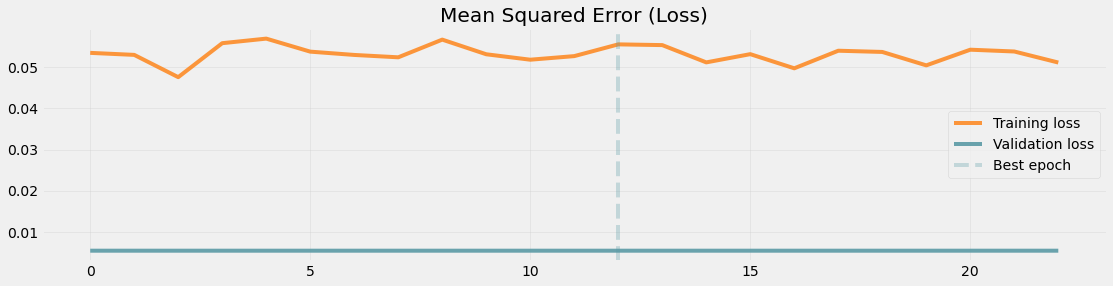

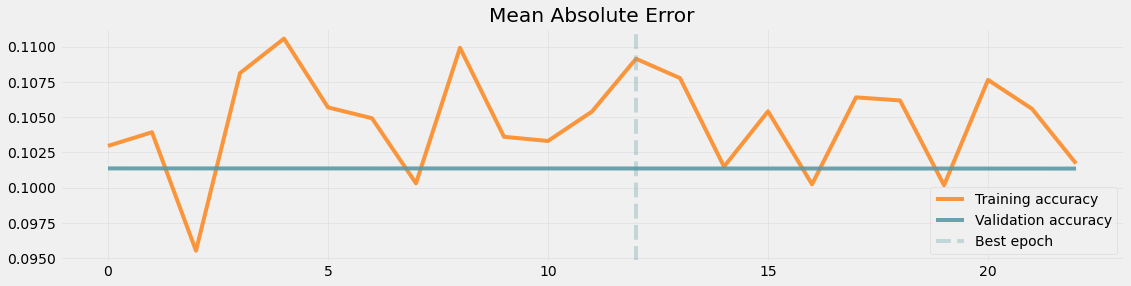

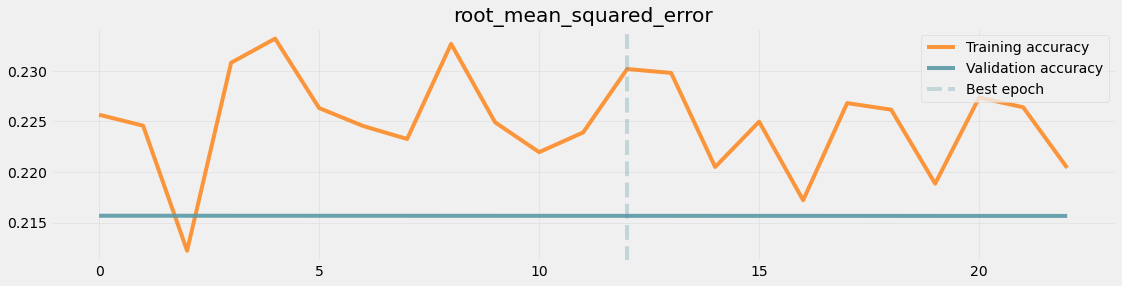

In [ ]:
# Plot the training
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['mae'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_mae'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['root_mean_squared_error'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_root_mean_squared_error'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('root_mean_squared_error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
y=targets
df=pd.DataFrame(y,columns=['y_true'])
pred=np.array(y_pred[15])
df['y_pred']=pred
print(df)

      y_true    y_pred
0   0.264430  0.049650
1  -0.113194  0.053588
2   0.222025  0.158815
3  -0.875688  0.052770
4   0.479794  0.076197
5   0.061147  0.065554
6  -0.745319  0.053928
7  -1.120492  0.030963
8  -0.154956  0.046574
9  -0.023405  0.066758
10 -0.967951  0.043809
11  2.260045  0.036376
12 -1.109890  0.025707
13  0.832670  0.073034
14  2.007159  0.112478
15 -1.016375  0.053797


## INVERTIRE LO SCALING

pred=[]
for i,data in enumerate(y_pred):
    pred.append(y_pred[i][i])
print(pred)  

In [ ]:
scaled_prediction=decoded_labels

In [ ]:
predicted_c4=c_scaled_dataframe4
predicted_c4

TOT_mean  Avg_population  \
city                                                   
Boston, Massachusetts       0.264430        0.795511   
Rochester, New York        -0.113194        0.222612   
Milwaukee, Wisconsin        0.222025        0.495016   
Manchester, New Hampshire  -0.875688       -0.659578   
Salt Lake City, Utah        0.479794       -0.376712   
Long Beach, California      0.061147       -0.148216   
Portland, Maine            -0.745319       -0.658986   
Watertown, New York        -1.120492       -0.874575   
Des Moines, Iowa           -0.154956       -0.163754   
Tacoma, Washington         -0.023405       -0.397697   
La Crosse, Wisconsin       -0.967951       -0.833198   
Philadelphia, Pennsylvania  2.260045        1.593251   
Bangor, Maine              -1.109890       -0.864931   
Omaha, Nebraska             0.832670       -0.193768   
San Francisco, California   2.007159        2.895176   
Grand Forks, North Dakota  -1.016375       -0.830152   

                            Number of employees administrative sector  \
city                                                                    
Boston, Massachusetts                                        1.496522   
Rochester, New York                                         -0.554986   
Milwaukee, Wisconsin                                         1.018258   
Manchester, New Hampshire                                    0.362959   
Salt Lake City, Utah                                         0.592136   
Long Beach, California                                      -0.254608   
Portland, Maine                                             -0.870781   
Watertown, New York                                         -1.113748   
Des Moines, Iowa                                            -0.586519   
Tacoma, Washington                                          -0.847848   
La Crosse, Wisconsin                                        -1.005668   
Philadelphia, Pennsylvania                                   0.835103   
Bangor, Maine                                               -1.068812   
Omaha, Nebraska                                              1.512173   
San Francisco, California                                    1.575394   
Grand Forks, North Dakota                                   -1.089575   

                            Number of employees manufacturing sector  \
city                                                                   
Boston, Massachusetts                                      -0.348658   
Rochester, New York                                         1.165513   
Milwaukee, Wisconsin                                        1.605725   
Manchester, New Hampshire                                  -0.569877   
Salt Lake City, Utah                                        1.795676   
Long Beach, California                                     -0.217410   
Portland, Maine                                            -0.909737   
Watertown, New York                                        -1.108339   
Des Moines, Iowa                                           -0.454200   
Tacoma, Washington                                         -0.425034   
La Crosse, Wisconsin                                       -0.632782   
Philadelphia, Pennsylvania                                  1.578413   
Bangor, Maine                                              -1.113654   
Omaha, Nebraska                                             0.876570   
San Francisco, California                                  -0.281798   
Grand Forks, North Dakota                                  -0.960407   

                            Number of establishments information sector  \
city                                                                      
Boston, Massachusetts                                          0.973572   
Rochester, New York                                           -0.432376   
Milwaukee, Wisconsin                                          -0.153048   
Manchester, New Hampshire       

In [ ]:
#predicted_c4.drop(columns=['d_centr'],inplace=True)

In [ ]:
predicted_c4['TOT_mean']=scaled_prediction

In [ ]:
predicted_c4

TOT_mean  Avg_population  \
city                                                   
Boston, Massachusetts       0.061147        0.795511   
Rochester, New York        -0.113194        0.222612   
Milwaukee, Wisconsin        0.222025        0.495016   
Manchester, New Hampshire   0.061147       -0.659578   
Salt Lake City, Utah        0.222025       -0.376712   
Long Beach, California      0.061147       -0.148216   
Portland, Maine            -0.745319       -0.658986   
Watertown, New York        -1.120492       -0.874575   
Des Moines, Iowa           -0.745319       -0.163754   
Tacoma, Washington         -0.745319       -0.397697   
La Crosse, Wisconsin       -0.745319       -0.833198   
Philadelphia, Pennsylvania  2.260045        1.593251   
Bangor, Maine              -1.120492       -0.864931   
Omaha, Nebraska             0.832670       -0.193768   
San Francisco, California   2.007159        2.895176   
Grand Forks, North Dakota  -1.016375       -0.830152   

                            Number of employees administrative sector  \
city                                                                    
Boston, Massachusetts                                        1.496522   
Rochester, New York                                         -0.554986   
Milwaukee, Wisconsin                                         1.018258   
Manchester, New Hampshire                                    0.362959   
Salt Lake City, Utah                                         0.592136   
Long Beach, California                                      -0.254608   
Portland, Maine                                             -0.870781   
Watertown, New York                                         -1.113748   
Des Moines, Iowa                                            -0.586519   
Tacoma, Washington                                          -0.847848   
La Crosse, Wisconsin                                        -1.005668   
Philadelphia, Pennsylvania                                   0.835103   
Bangor, Maine                                               -1.068812   
Omaha, Nebraska                                              1.512173   
San Francisco, California                                    1.575394   
Grand Forks, North Dakota                                   -1.089575   

                            Number of employees manufacturing sector  \
city                                                                   
Boston, Massachusetts                                      -0.348658   
Rochester, New York                                         1.165513   
Milwaukee, Wisconsin                                        1.605725   
Manchester, New Hampshire                                  -0.569877   
Salt Lake City, Utah                                        1.795676   
Long Beach, California                                     -0.217410   
Portland, Maine                                            -0.909737   
Watertown, New York                                        -1.108339   
Des Moines, Iowa                                           -0.454200   
Tacoma, Washington                                         -0.425034   
La Crosse, Wisconsin                                       -0.632782   
Philadelphia, Pennsylvania                                  1.578413   
Bangor, Maine                                              -1.113654   
Omaha, Nebraska                                             0.876570   
San Francisco, California                                  -0.281798   
Grand Forks, North Dakota                                  -0.960407   

                            Number of establishments information sector  \
city                                                                      
Boston, Massachusetts                                          0.973572   
Rochester, New York                                           -0.432376   
Milwaukee, Wisconsin                                          -0.153048   
Manchester, New Hampshire       

In [ ]:
unscale_pred=c_scaler4.inverse_transform(predicted_c4)[:,[0]]
unscale_pred

array([[1.54100470e+09],
       [1.32567872e+09],
       [1.73970282e+09],
       [1.54100470e+09],
       [1.73970282e+09],
       [1.54100470e+09],
       [5.44950327e+08],
       [8.15796663e+07],
       [5.44950327e+08],
       [5.44950327e+08],
       [5.44950327e+08],
       [4.25683350e+09],
       [8.15796663e+07],
       [2.49390249e+09],
       [3.94449772e+09],
       [2.10172410e+08]])

In [ ]:
data_to_print=pd.DataFrame(unscale_pred)
data_to_print['true_WC']=cluster4['TOT_mean'].values 
print(data_to_print)

               0       true_WC
0   1.541005e+09  9.467379e+07
1   1.325679e+09  1.792077e+09
2   1.739703e+09  1.274099e+09
3   1.541005e+09  2.101724e+08
4   1.739703e+09  2.699809e+08
5   1.541005e+09  1.541005e+09
6   5.449503e+08  3.839332e+08
7   8.157967e+07  1.739703e+09
8   5.449503e+08  2.493902e+09
9   5.449503e+08  4.256834e+09
10  5.449503e+08  5.449503e+08
11  4.256834e+09  1.325679e+09
12  8.157967e+07  2.058071e+09
13  2.493902e+09  3.944498e+09
14  3.944498e+09  1.436575e+09
15  2.101724e+08  8.157967e+07


## SCALE BACK LIN_ACTIVAITON FUCNTION

In [ ]:
regression_pred=np.array([0.01872245, -0.00585526,  0.01434248, -0.05203797,  0.0282431,   0.00227163,
  -0.04448944, -0.06630477, -0.00898851, -0.00114648, -0.05980939,  0.13463478,
  -0.06593469,  0.04848235,  0.11664695, -0.05865858])

In [ ]:
df=predicted_c4

In [ ]:
df['TOT_mean']=regression_pred

In [ ]:
df_unscaled=c_scaler4.inverse_transform(df)[:,0]
print(df_unscaled)

[1.48860708e+09 1.45825150e+09 1.48319744e+09 1.40121188e+09
 1.50036590e+09 1.46828891e+09 1.41053497e+09 1.38359116e+09
 1.45438167e+09 1.46406725e+09 1.39161351e+09 1.63176877e+09
 1.38404824e+09 1.52536312e+09 1.60955226e+09 1.39303486e+09]


In [ ]:
data_to_print['regression_pred']=df_unscaled

In [ ]:
data_to_print

0       true_WC  regression_pred
0   1.541005e+09  9.467379e+07     1.488607e+09
1   1.325679e+09  1.792077e+09     1.458251e+09
2   1.739703e+09  1.274099e+09     1.483197e+09
3   1.541005e+09  2.101724e+08     1.401212e+09
4   1.739703e+09  2.699809e+08     1.500366e+09
5   1.541005e+09  1.541005e+09     1.468289e+09
6   5.449503e+08  3.839332e+08     1.410535e+09
7   8.157967e+07  1.739703e+09     1.383591e+09
8   5.449503e+08  2.493902e+09     1.454382e+09
9   5.449503e+08  4.256834e+09     1.464067e+09
10  5.449503e+08  5.449503e+08     1.391614e+09
11  4.256834e+09  1.325679e+09     1.631769e+09
12  8.157967e+07  2.058071e+09     1.384048e+09
13  2.493902e+09  3.944498e+09     1.525363e+09
14  3.944498e+09  1.436575e+09     1.609552e+09
15  2.101724e+08  8.157967e+07     1.393035e+09